In [1]:
from tensorflow.keras.models import load_model
from pydub import AudioSegment
import numpy as np
from pytube import YouTube 
from moviepy.video.io.VideoFileClip import VideoFileClip
import librosa
import matplotlib.pyplot as plt
import math

In [2]:
from extract_audio_clip import extract_audio_clip
from scan_extract_specs import scan_extract_specs

In [3]:
extract_audio_clip('../uploaded_video/court_tmo_interview.mp4','../tmp_sliced_audio/', 'audio', 20, 21)

MoviePy - Writing audio in ../tmp_sliced_audio/audio.wav


MoviePy - Done.


In [4]:
model = load_model('../models/yt_cats_cnn_1')

In [6]:
specs, times = scan_extract_specs('../uploaded_video/court_tmo_interview.mp4')
specs.shape

(375, 87, 128)

In [10]:
times[1]

(0.2, 1.2)

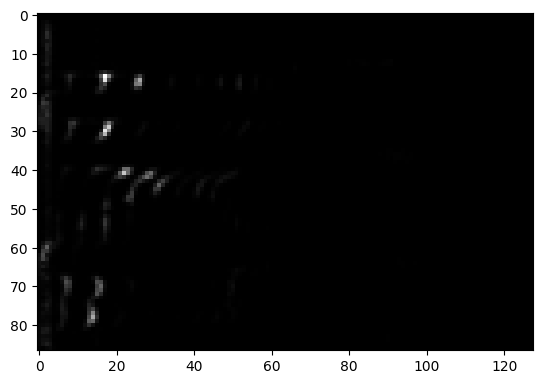

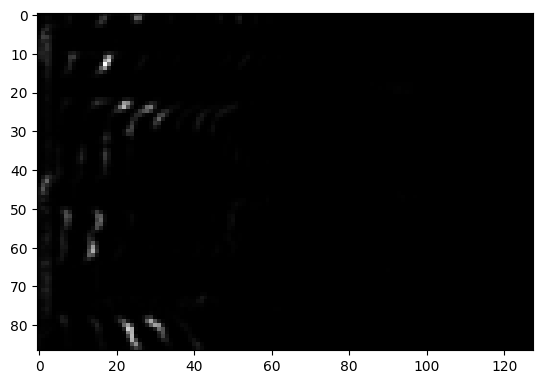

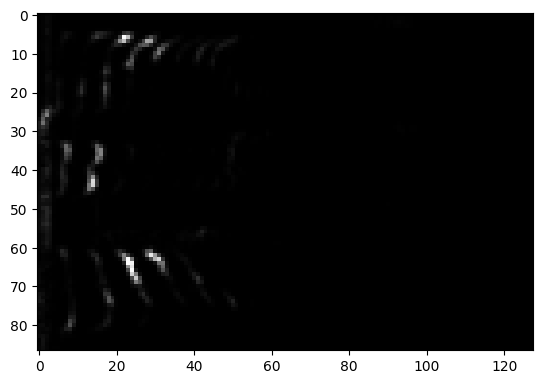

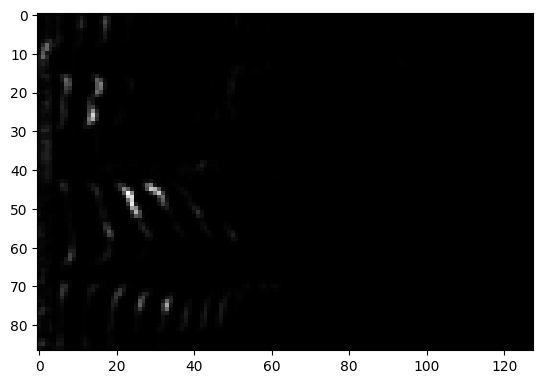

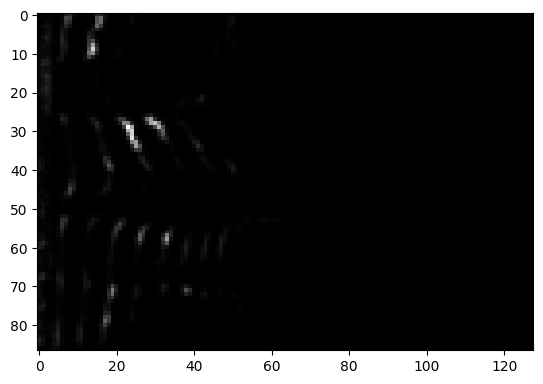

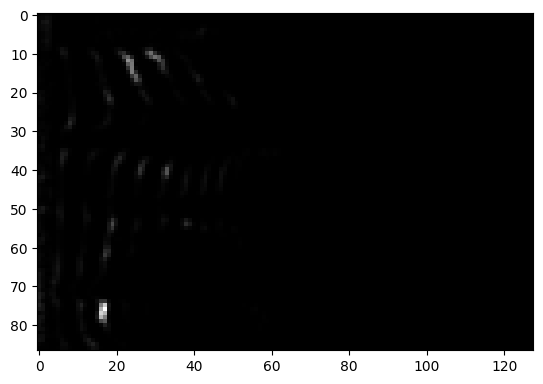

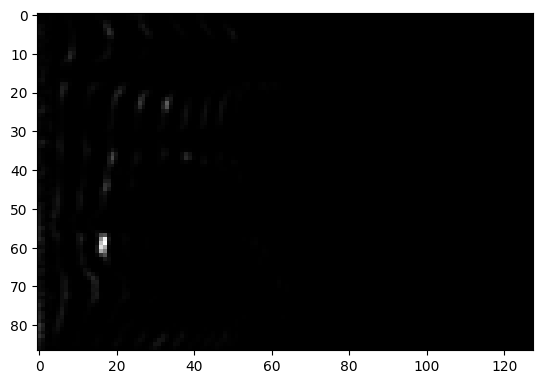

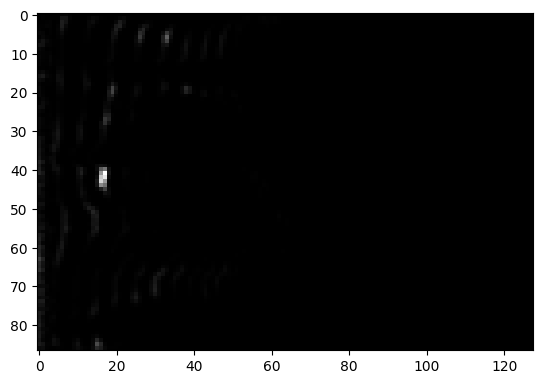

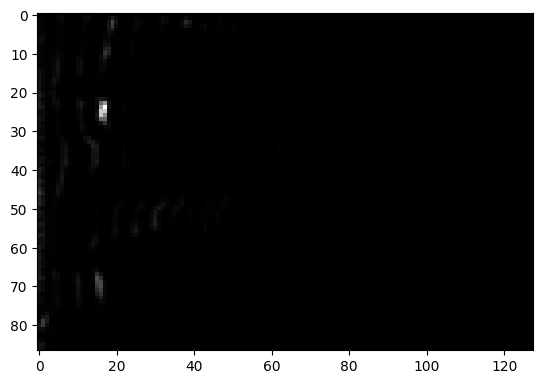

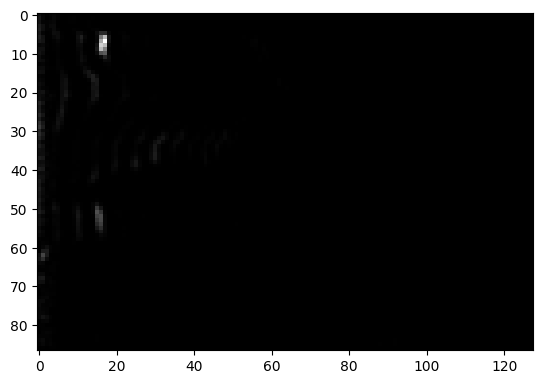

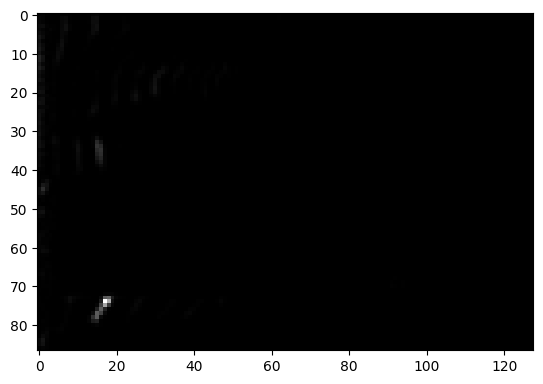

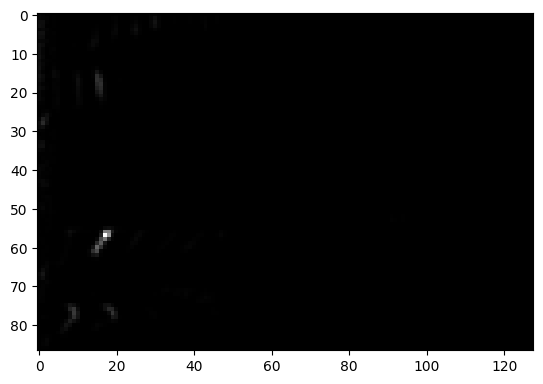

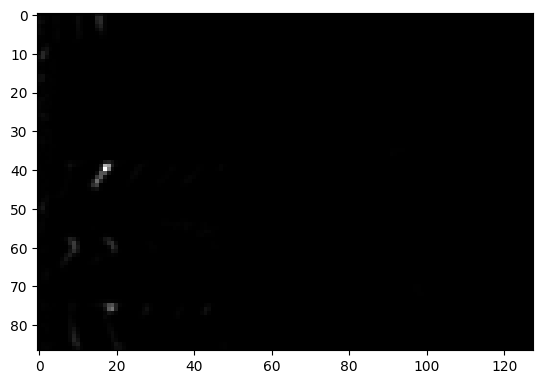

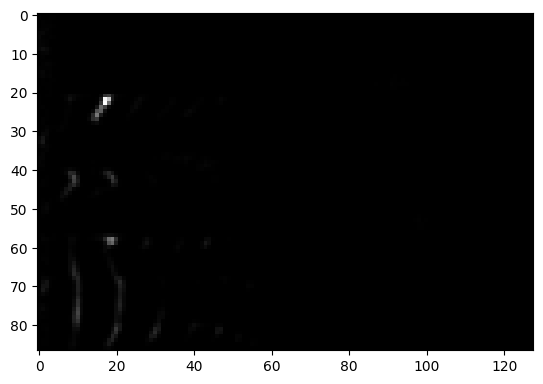

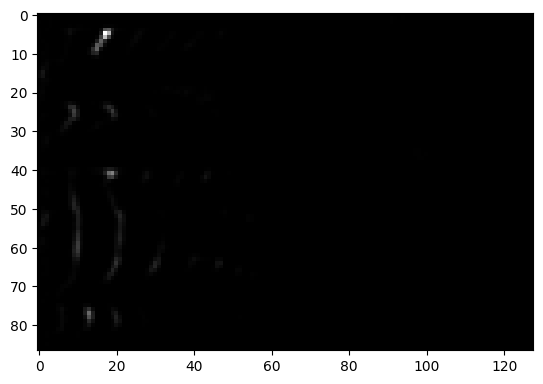

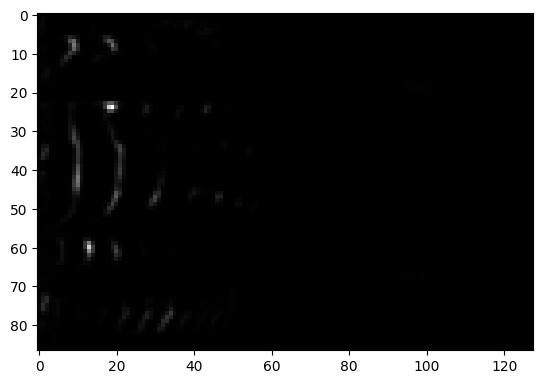

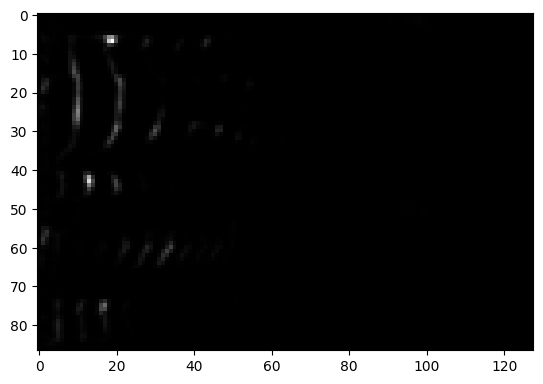

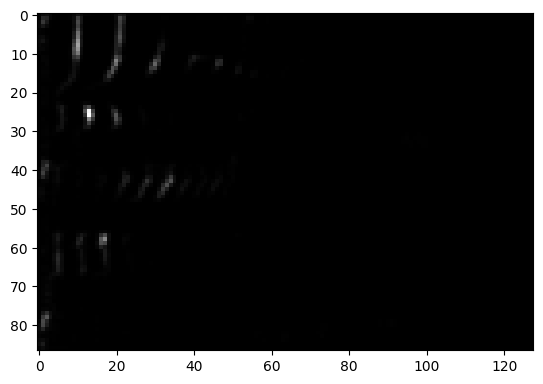

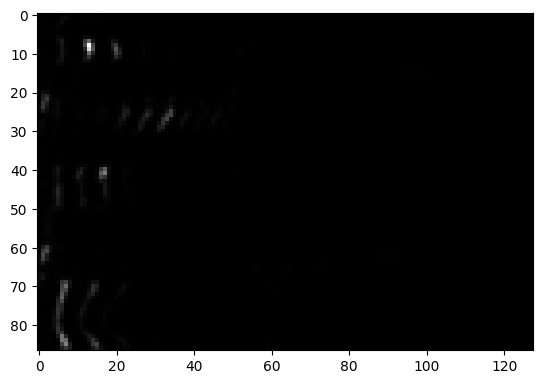

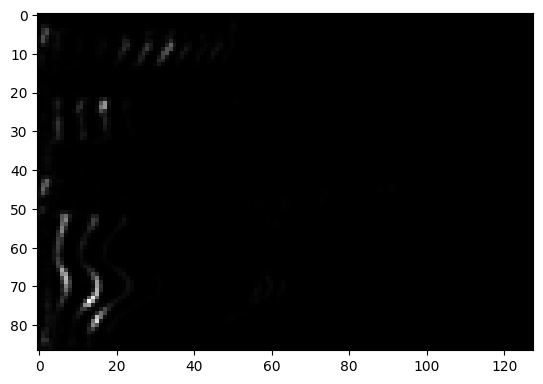

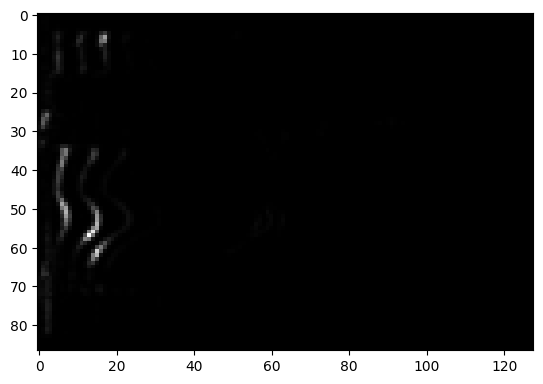

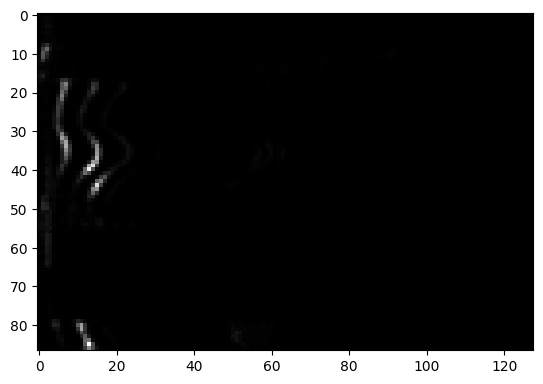

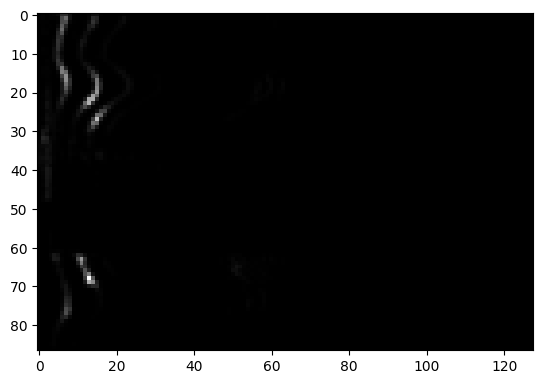

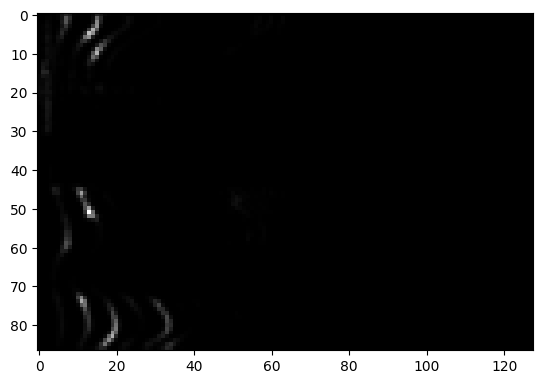

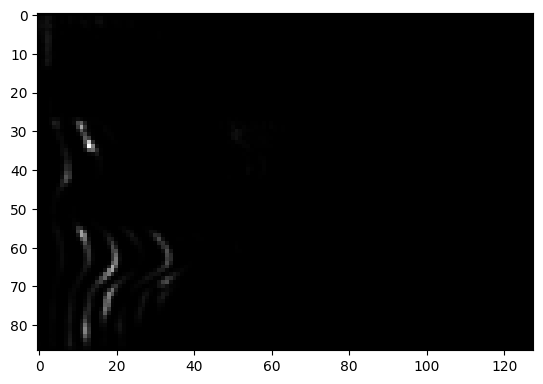

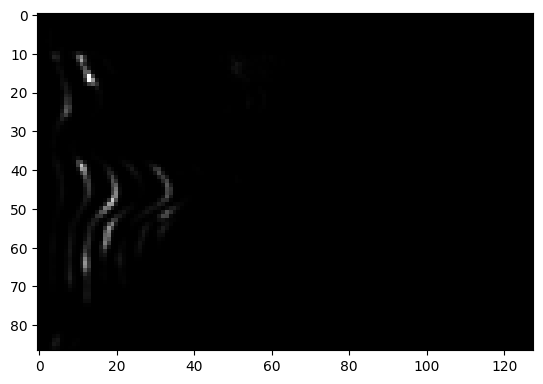

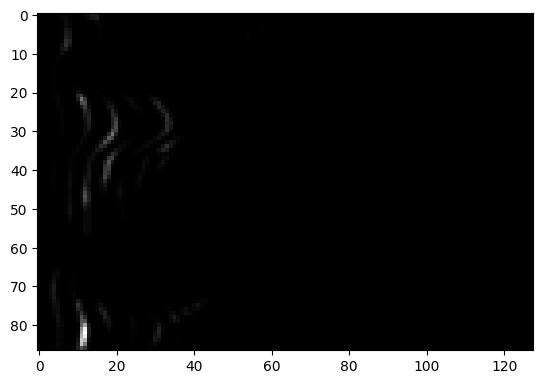

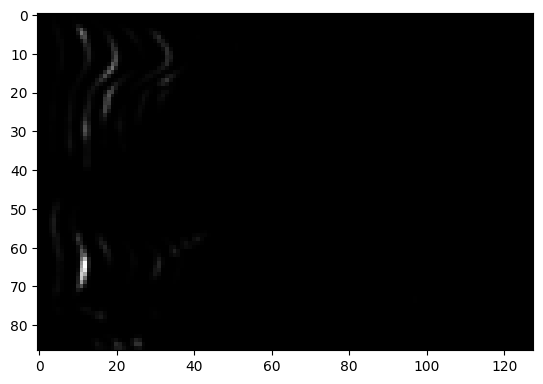

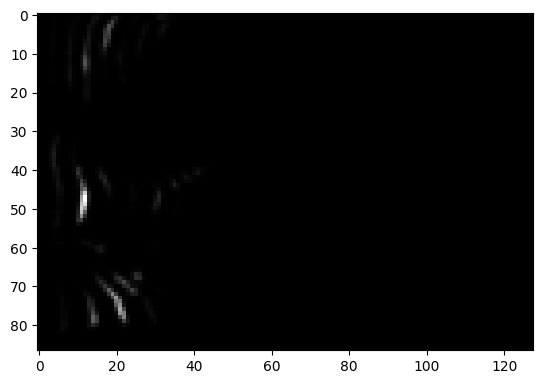

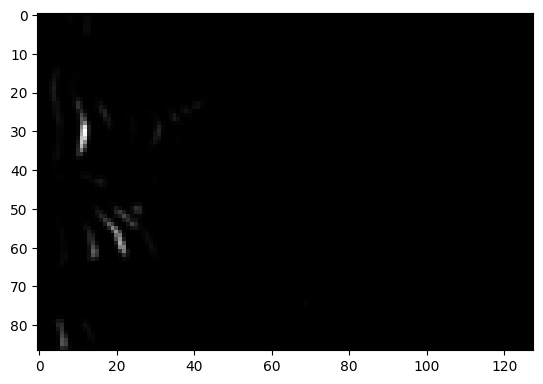

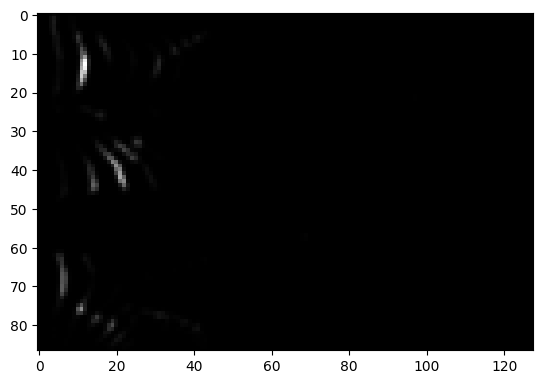

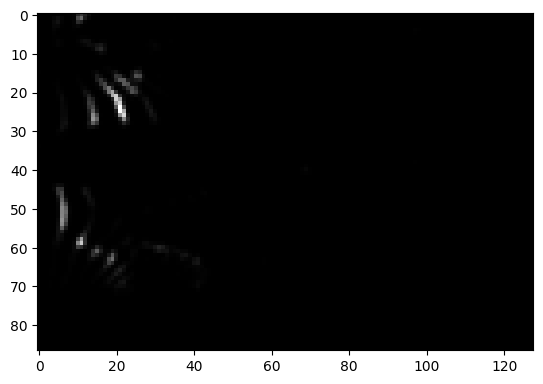

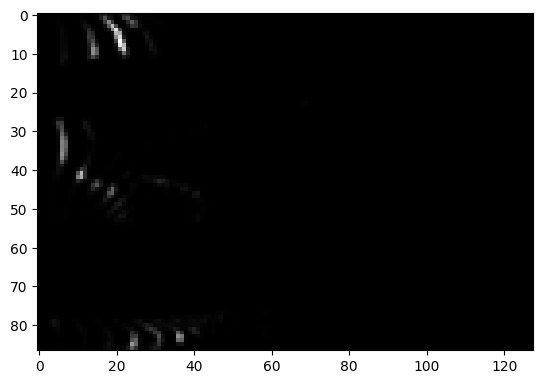

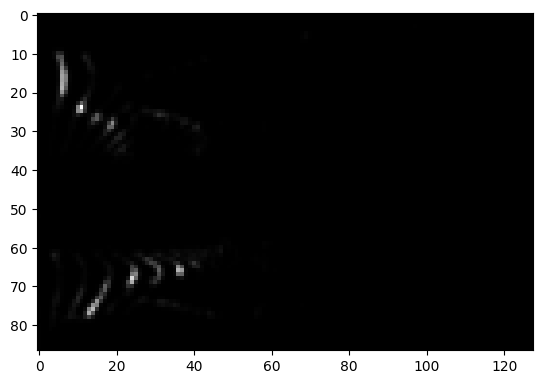

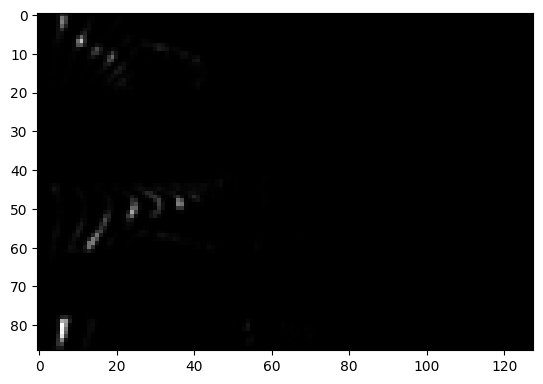

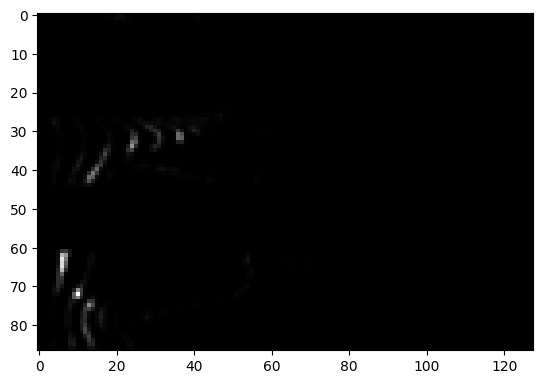

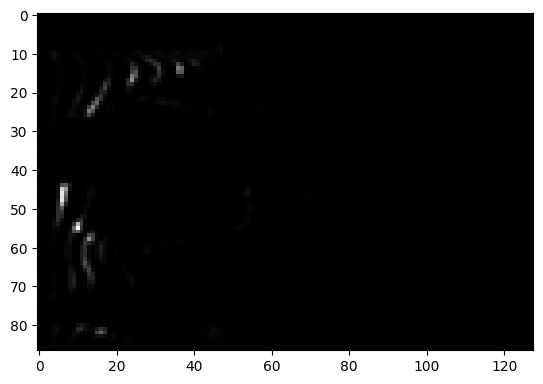

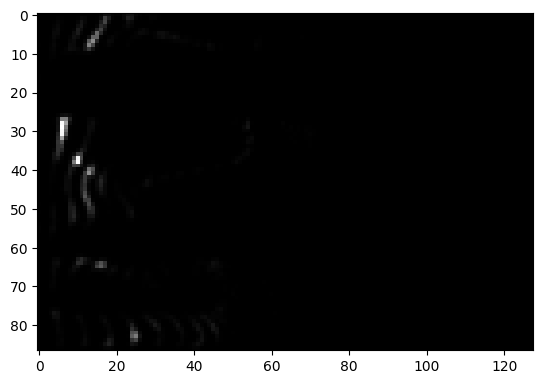

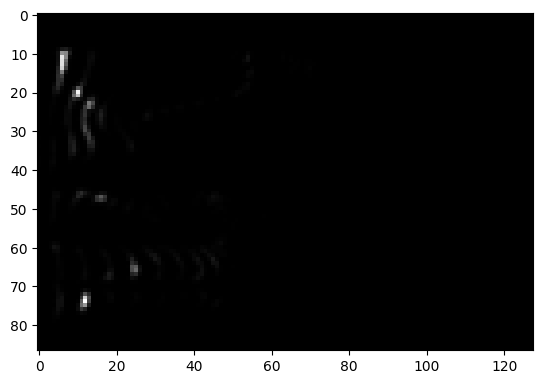

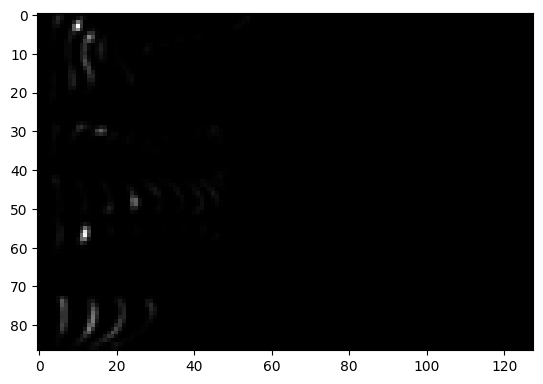

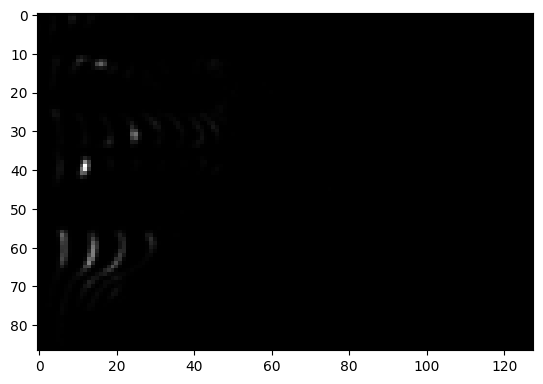

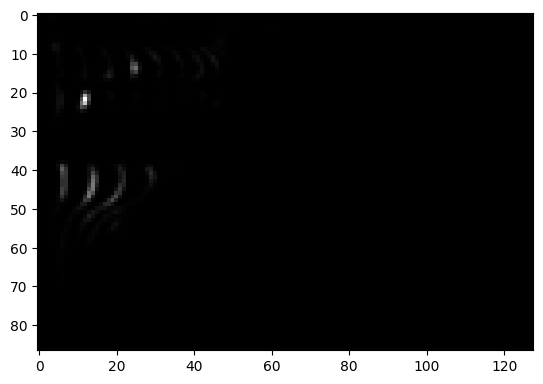

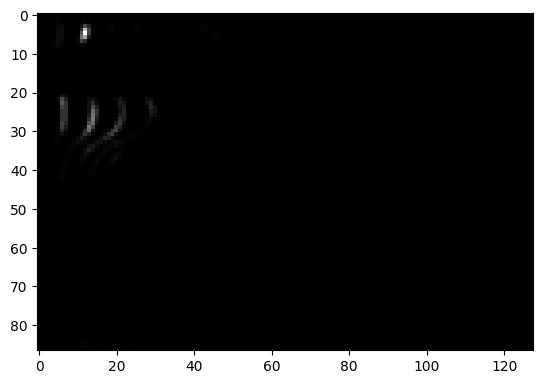

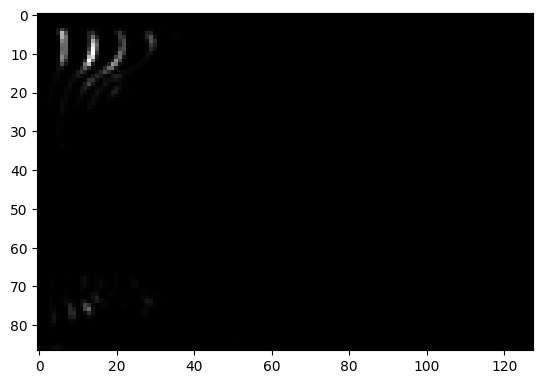

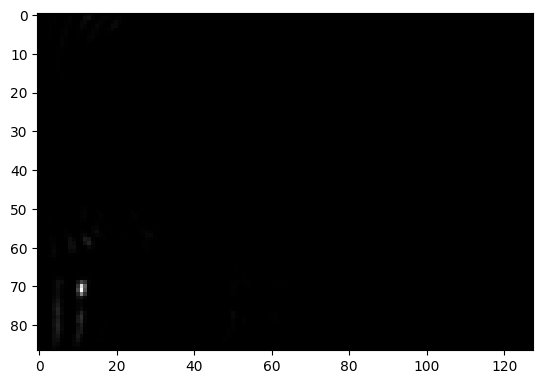

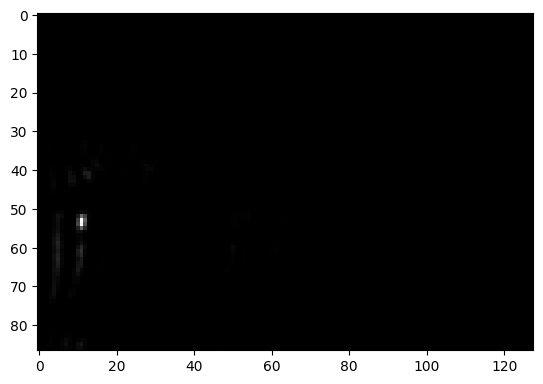

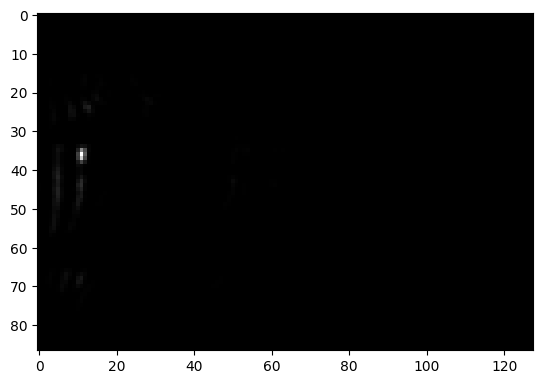

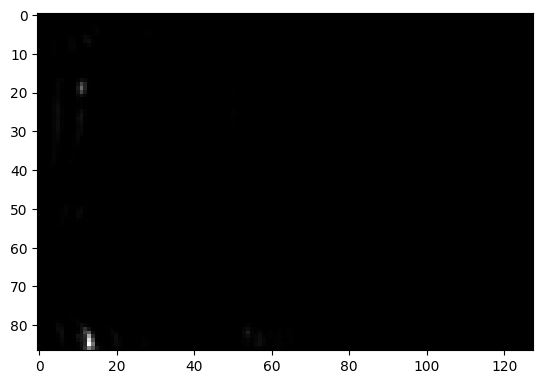

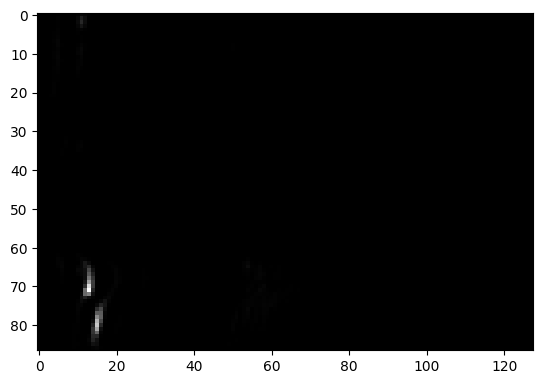

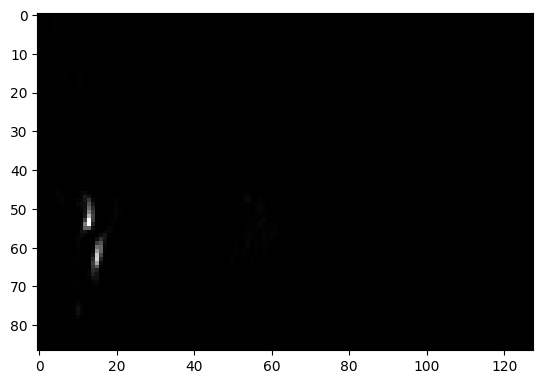

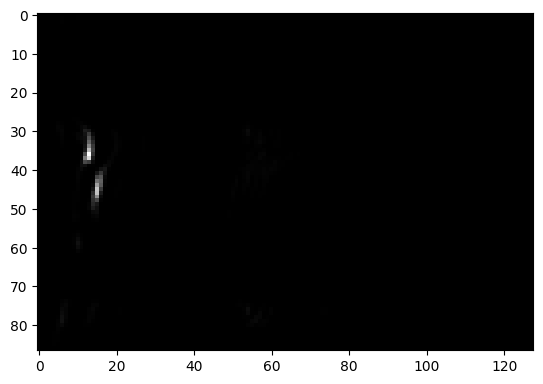

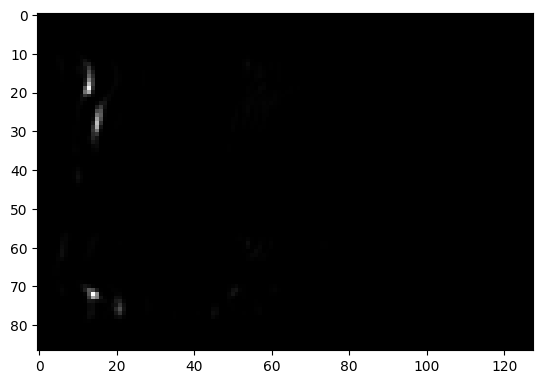

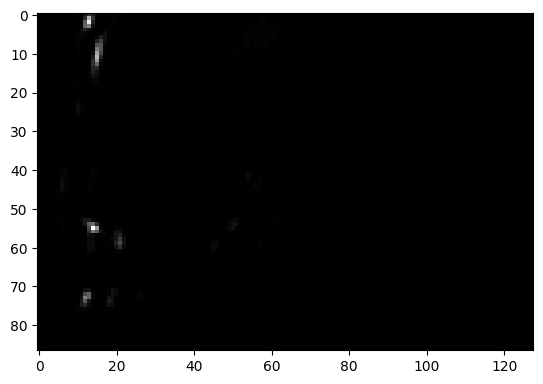

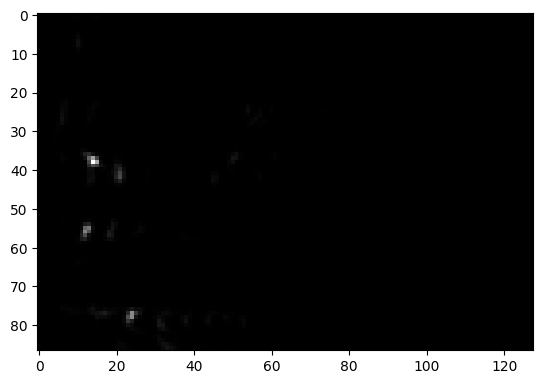

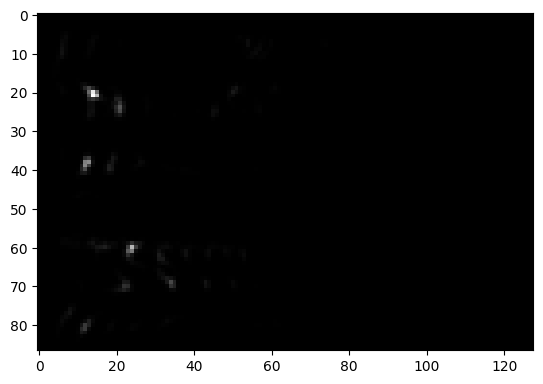

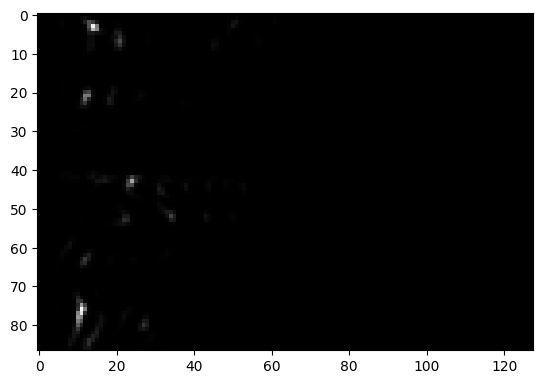

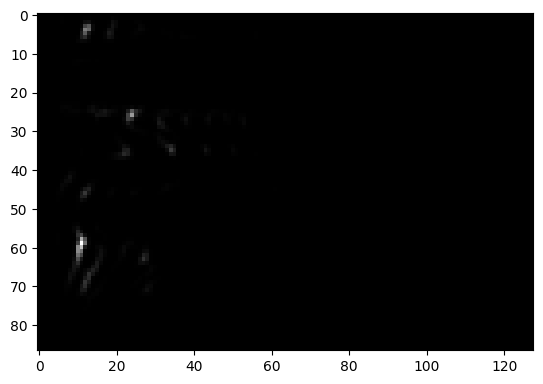

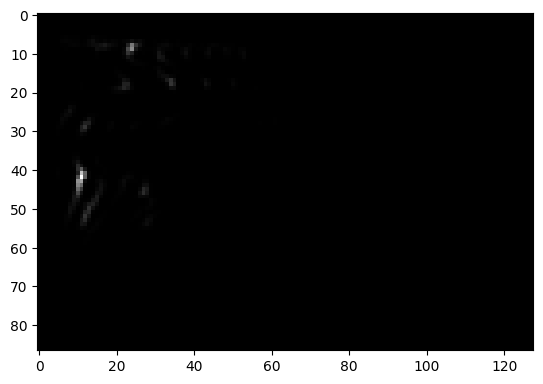

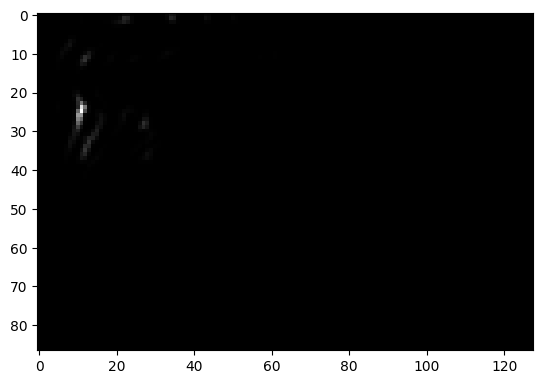

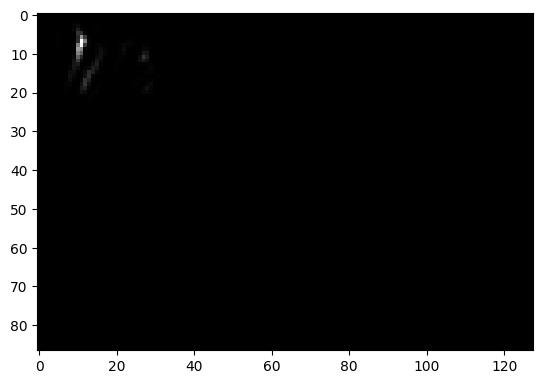

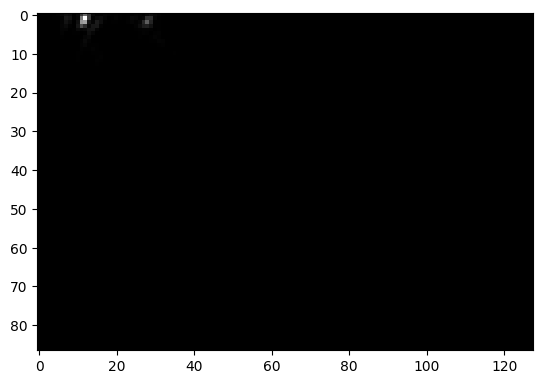

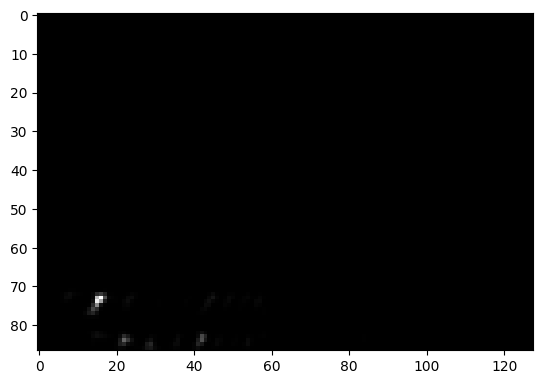

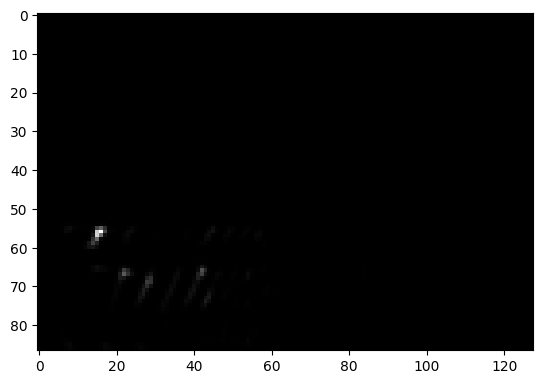

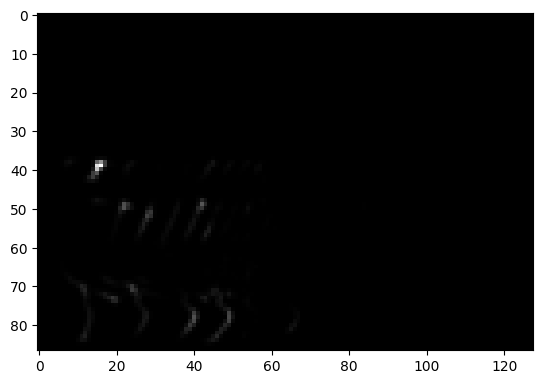

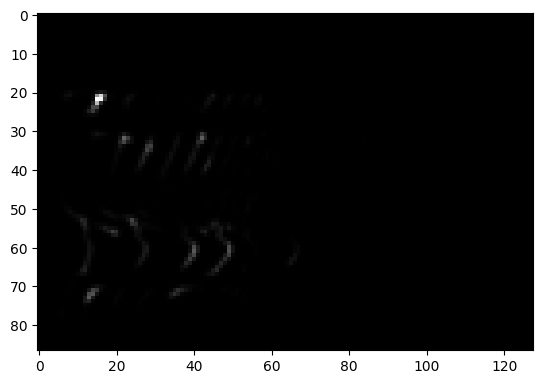

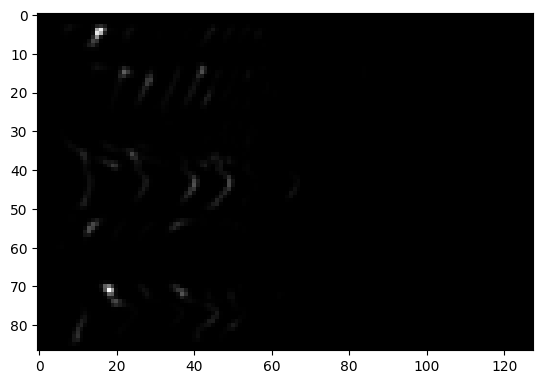

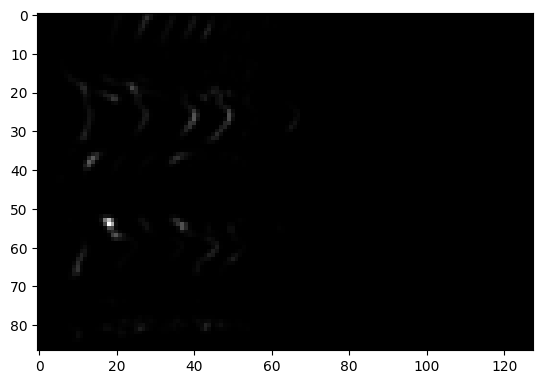

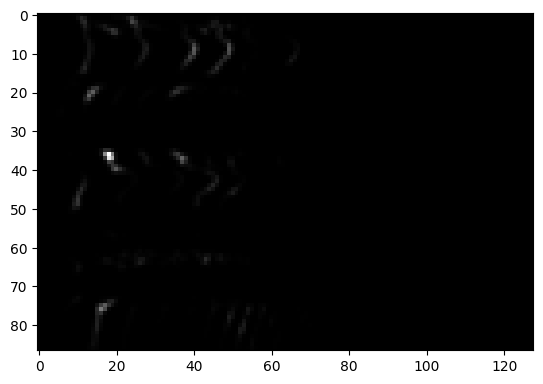

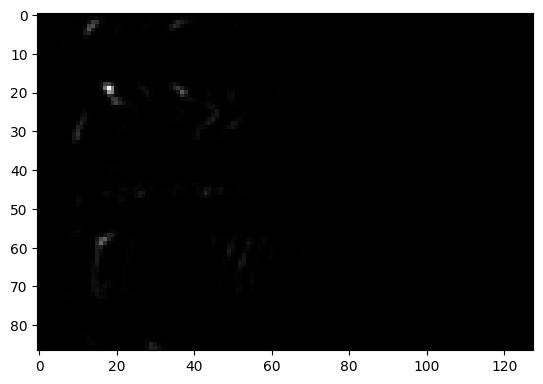

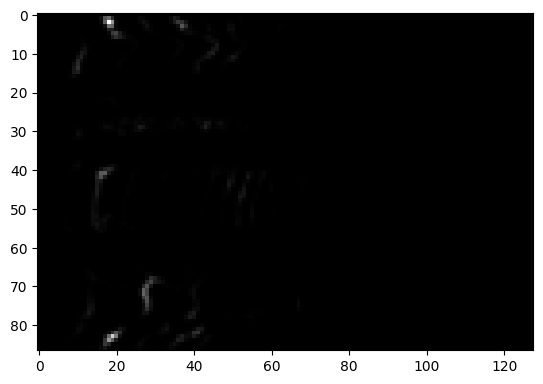

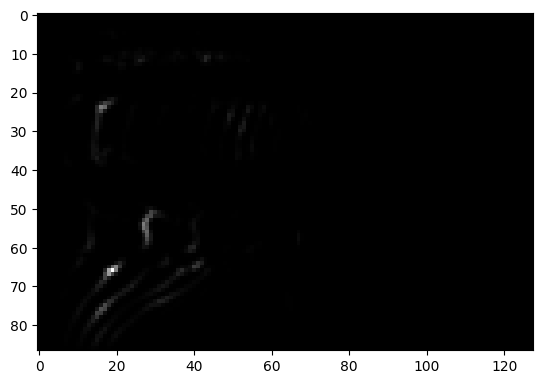

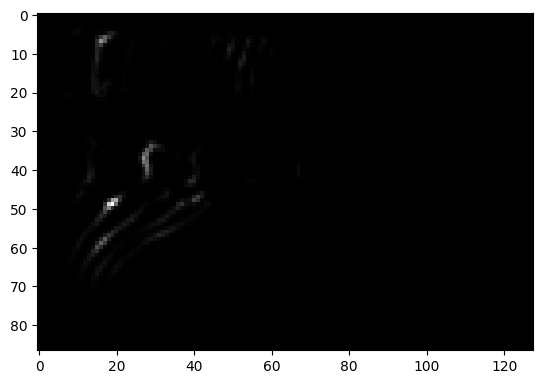

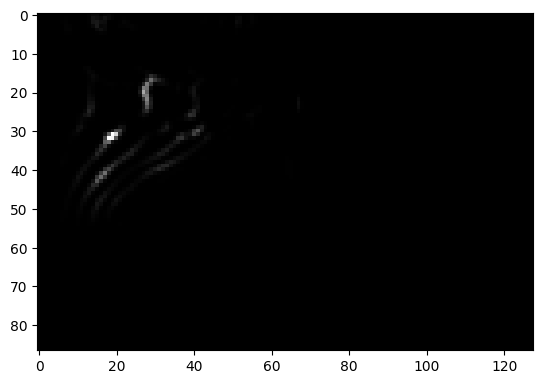

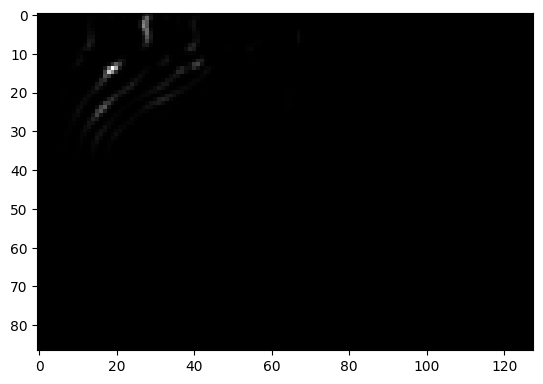

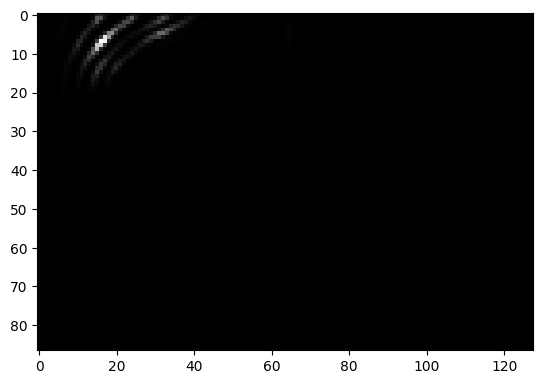

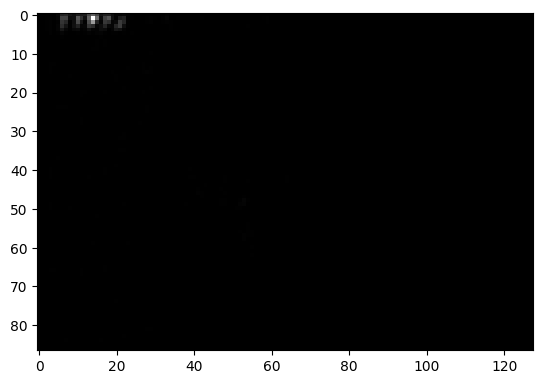

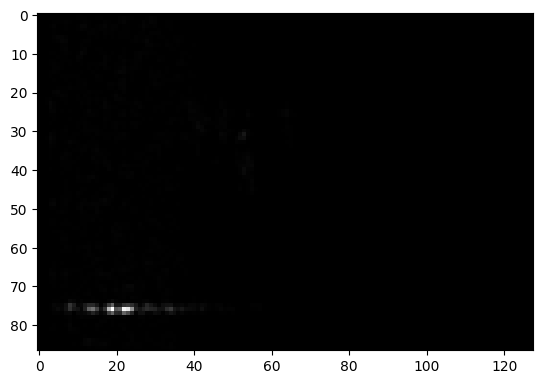

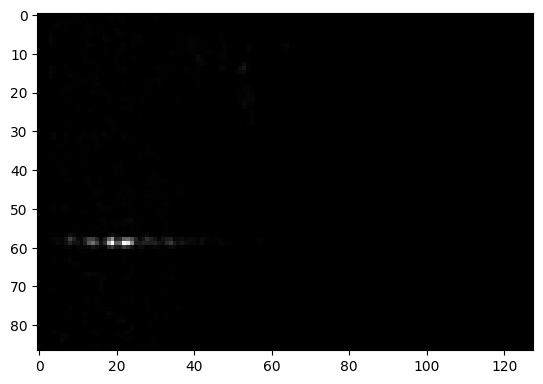

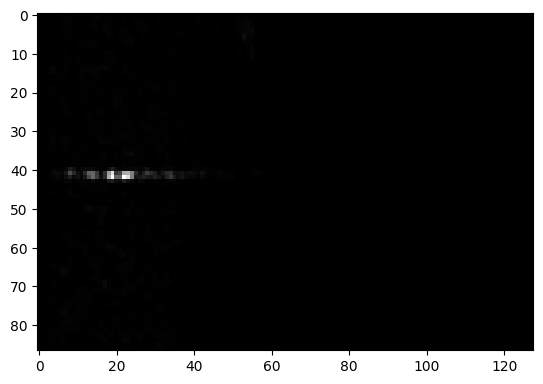

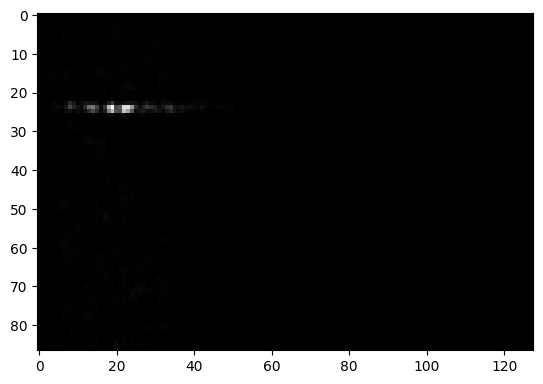

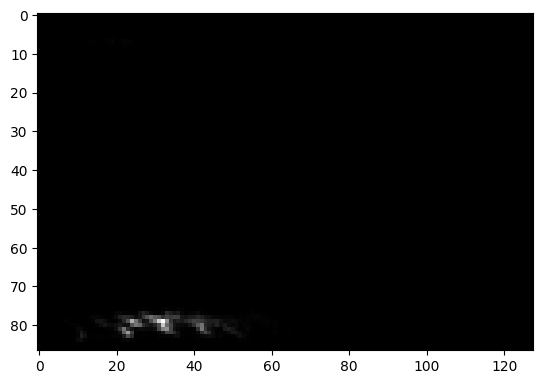

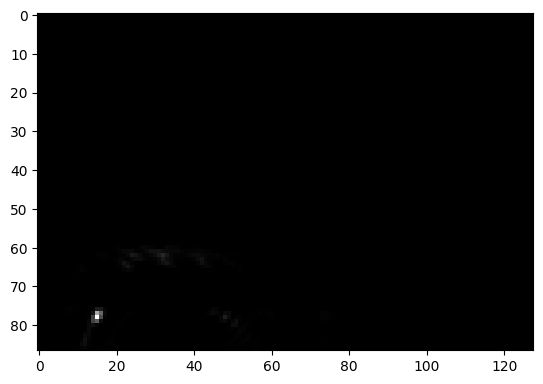

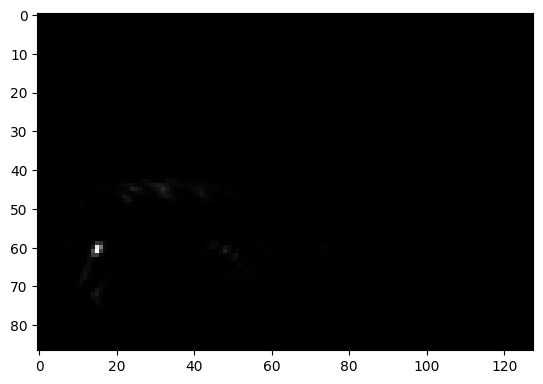

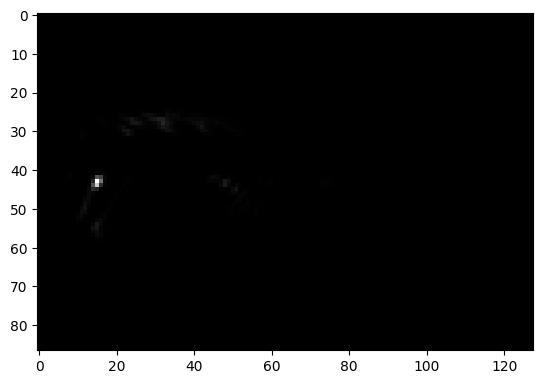

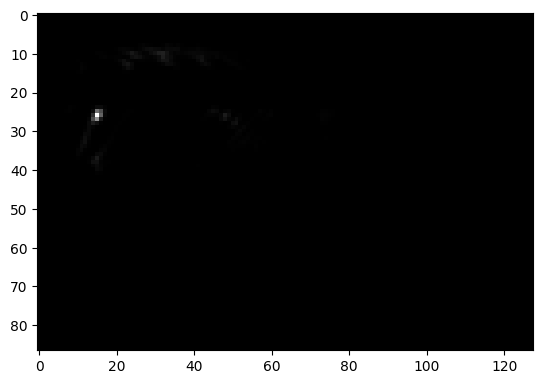

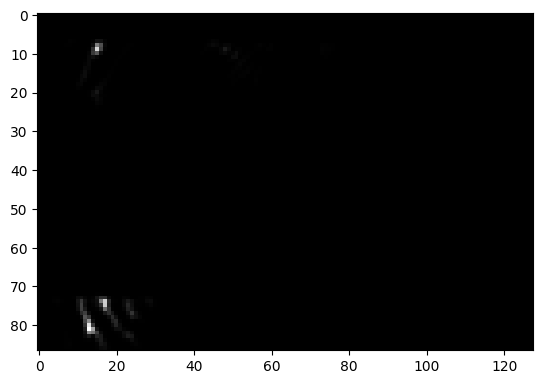

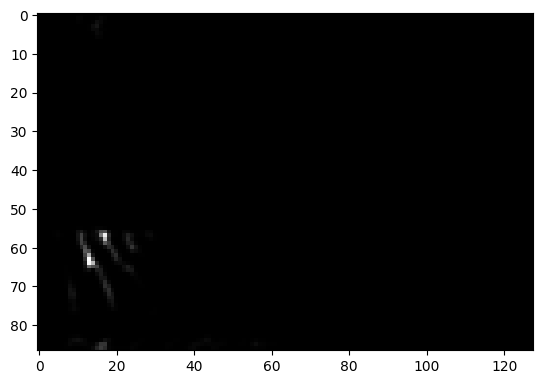

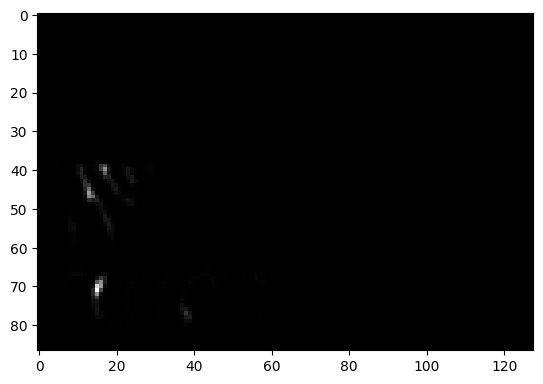

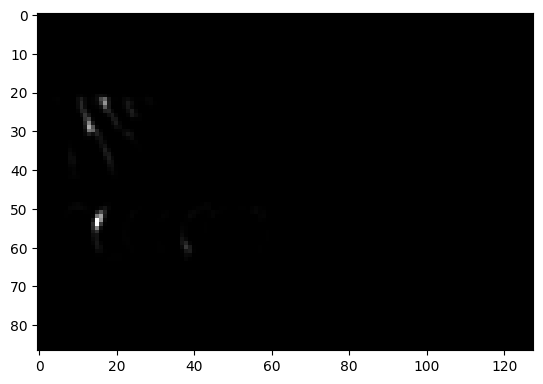

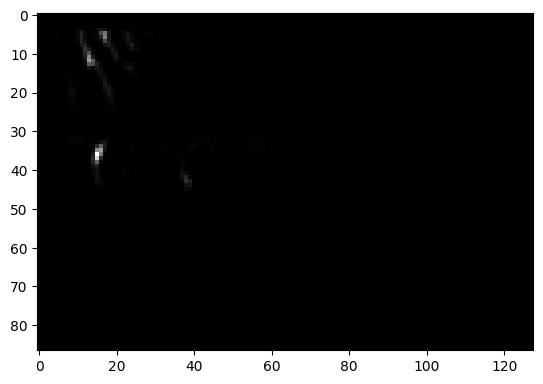

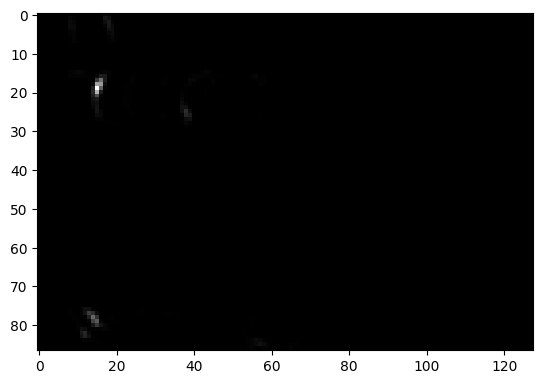

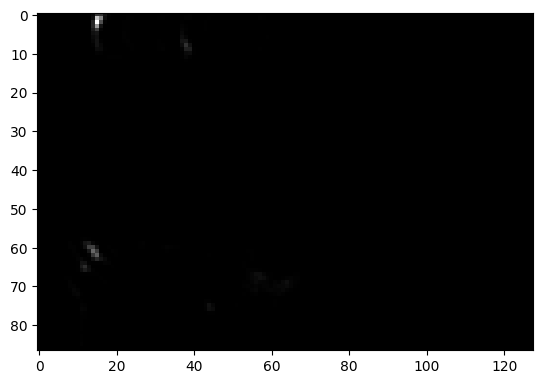

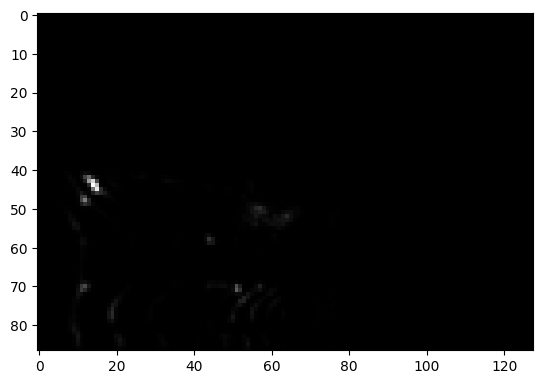

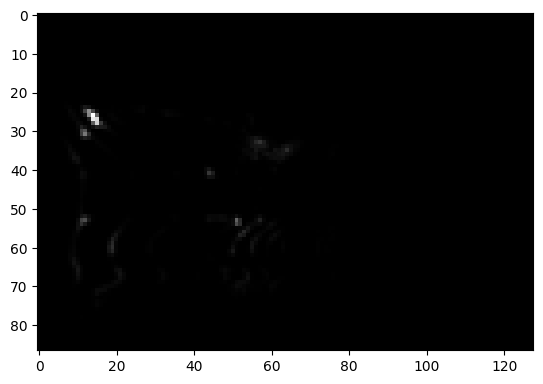

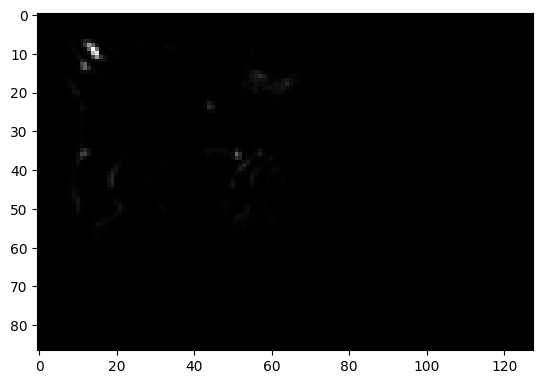

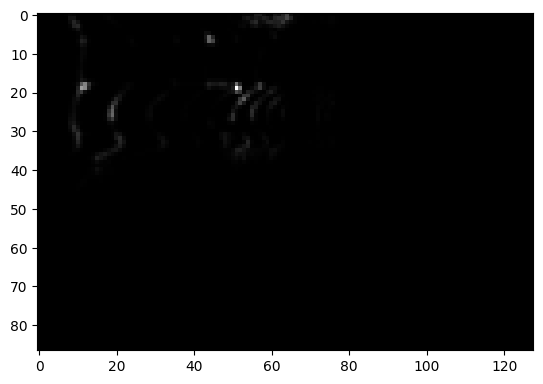

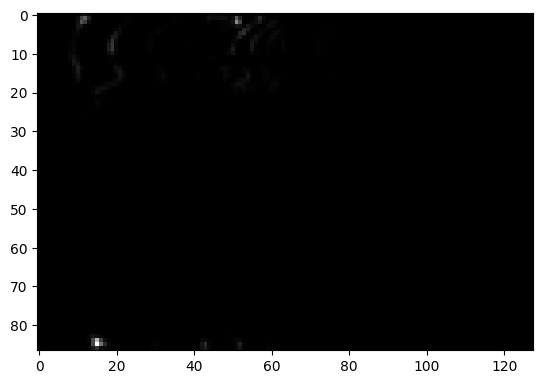

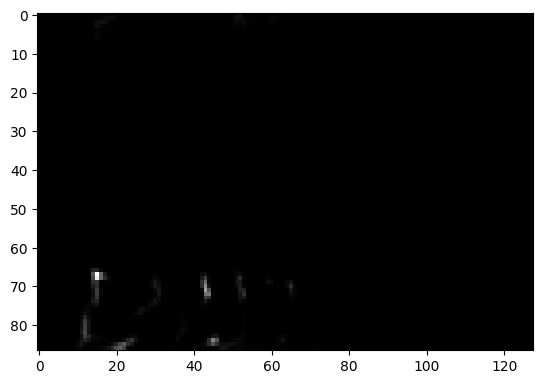

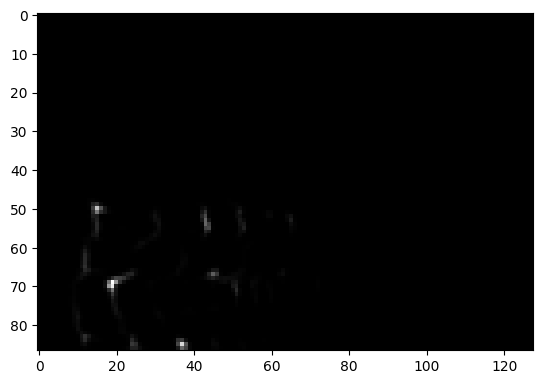

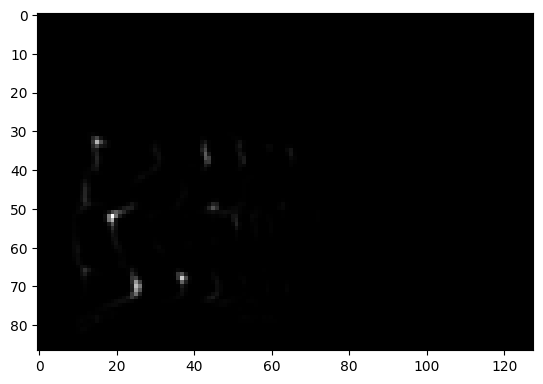

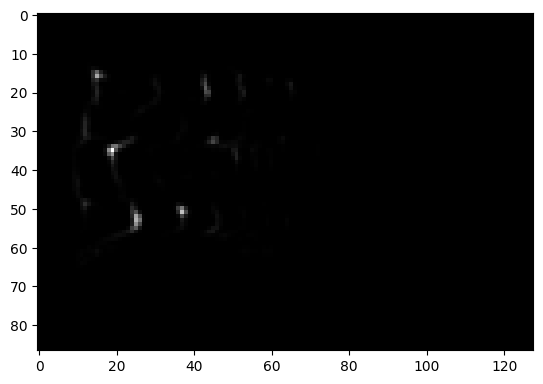

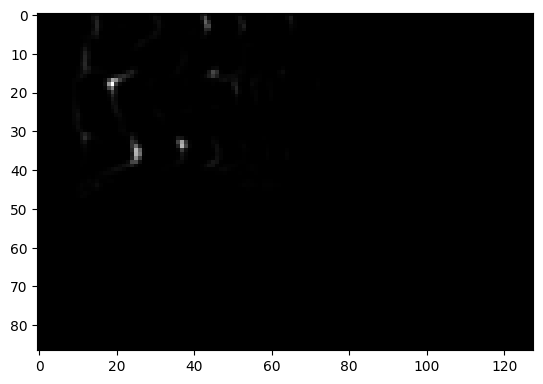

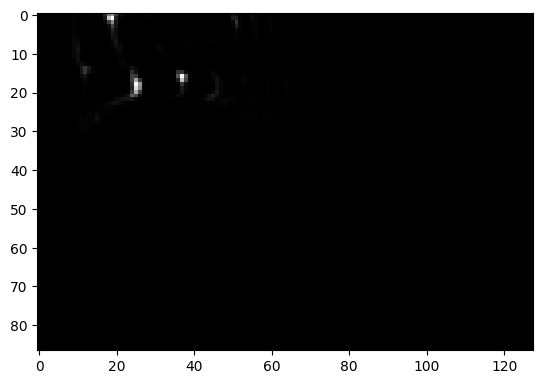

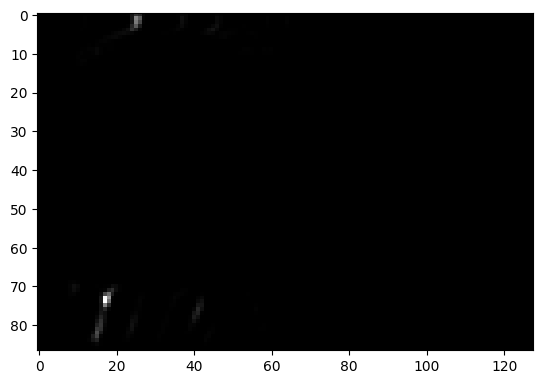

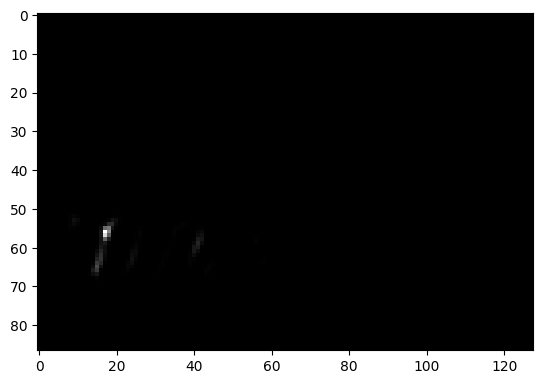

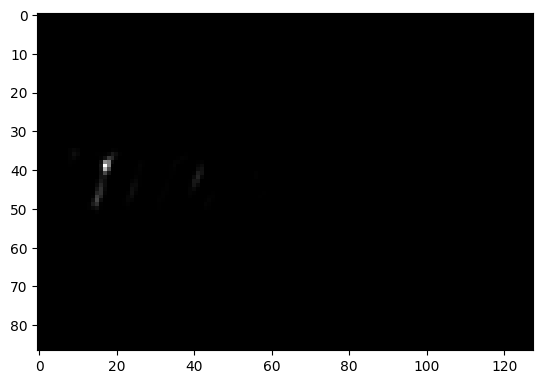

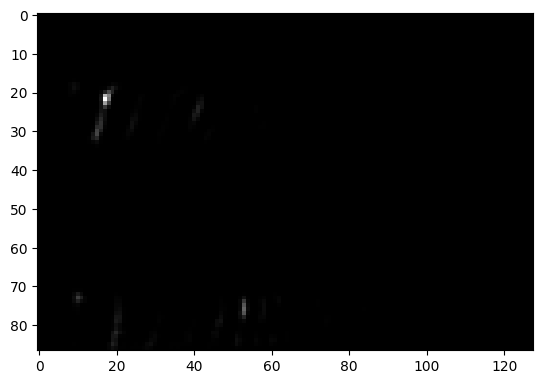

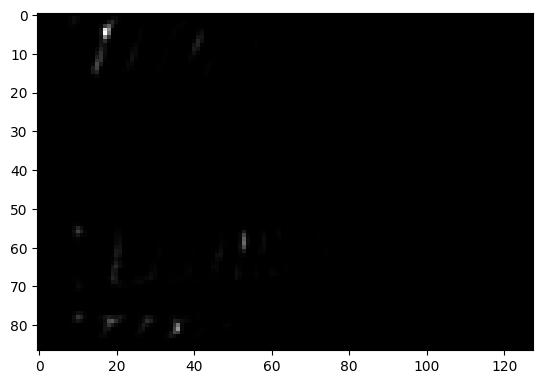

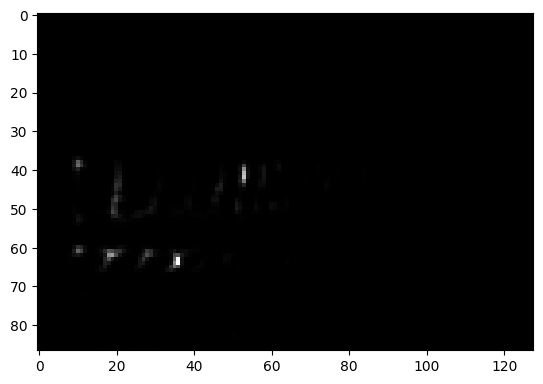

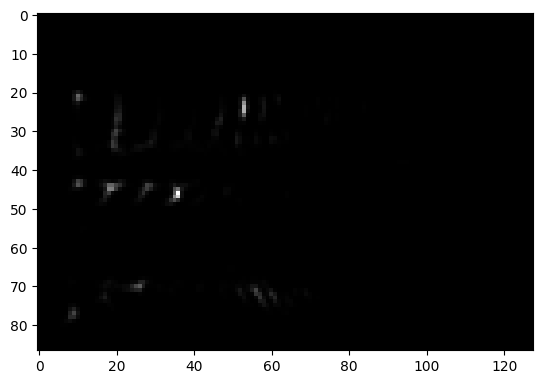

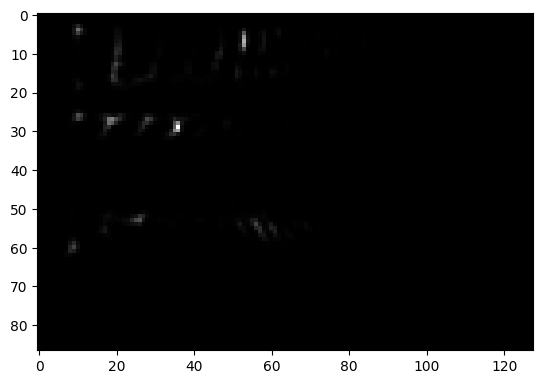

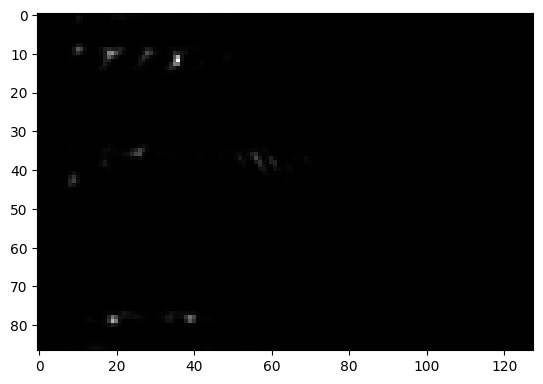

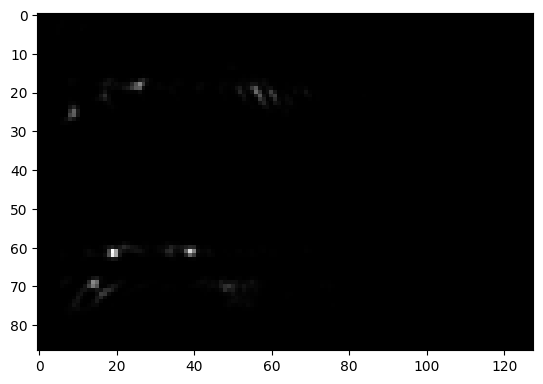

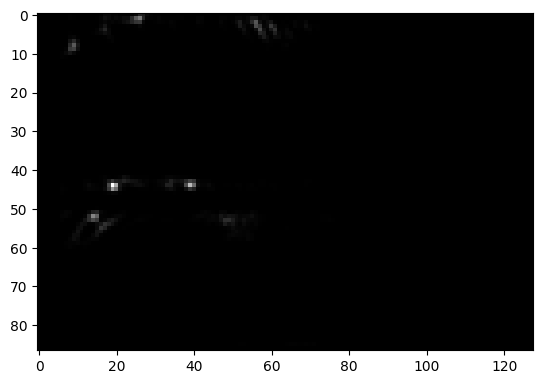

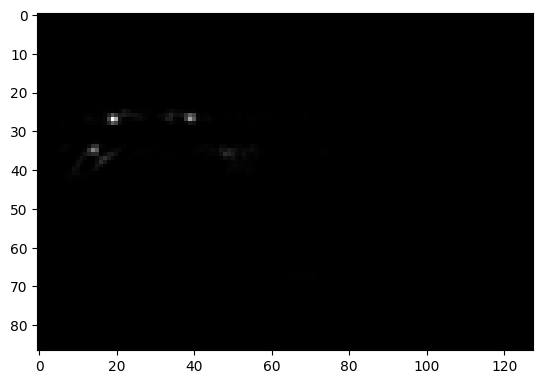

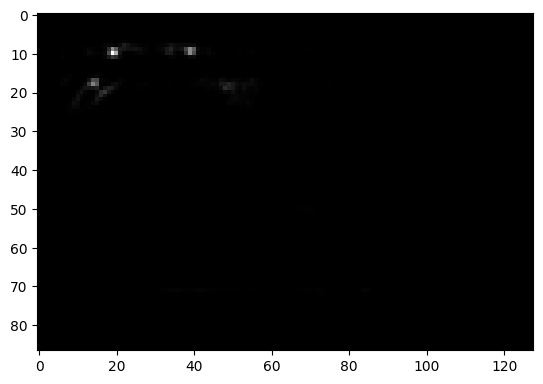

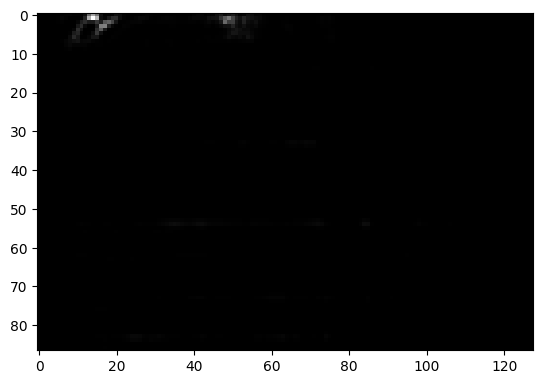

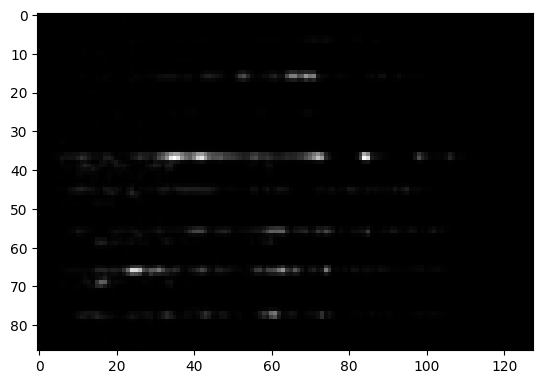

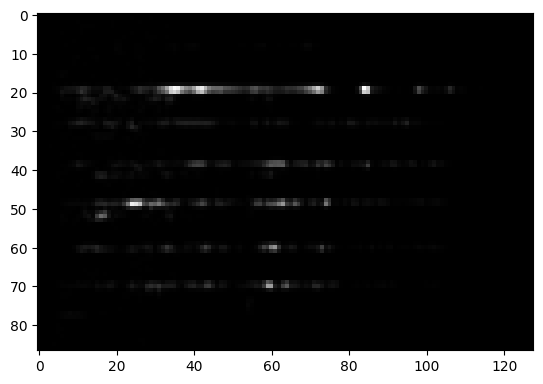

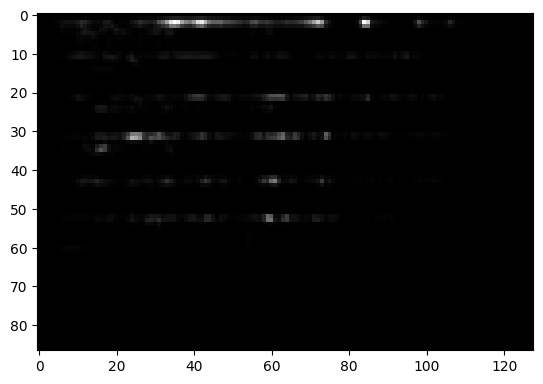

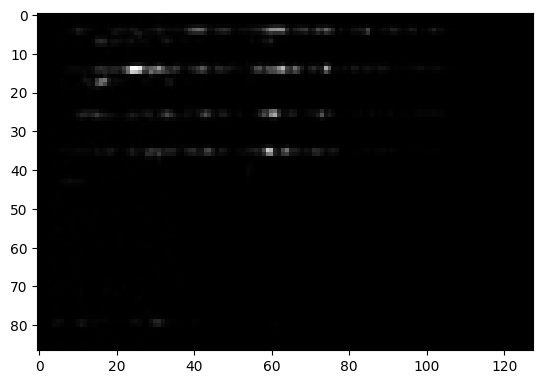

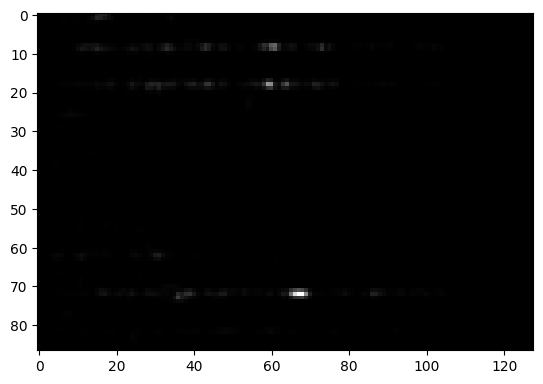

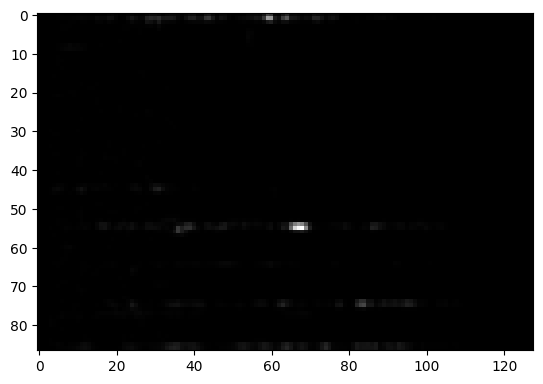

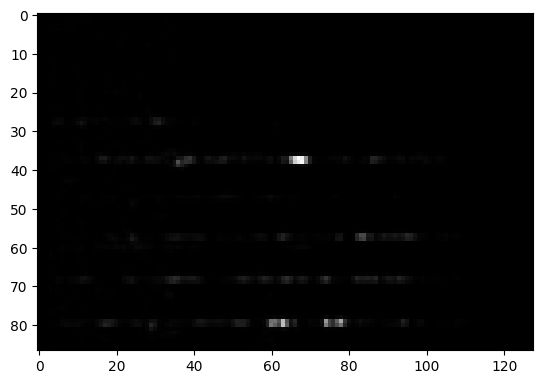

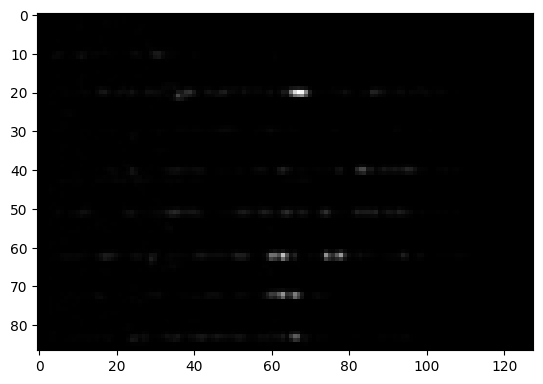

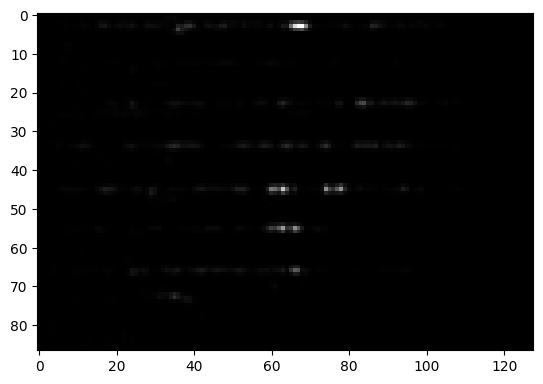

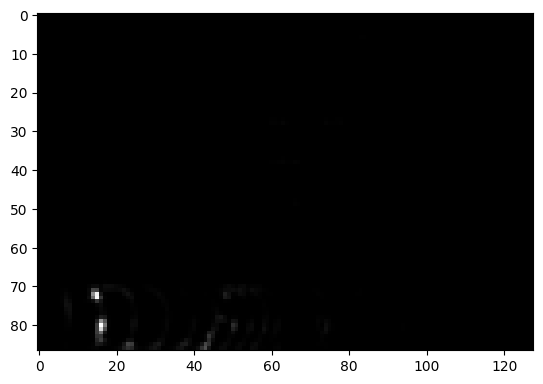

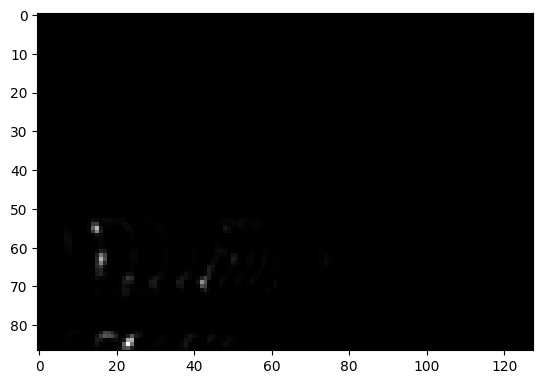

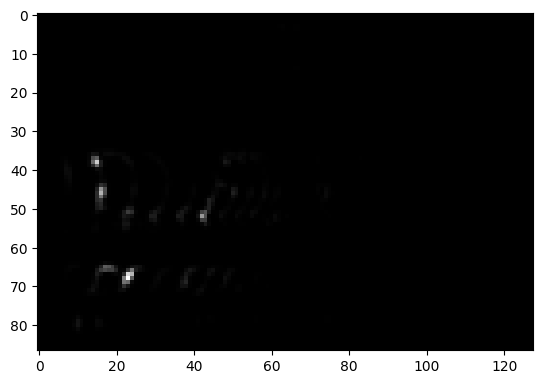

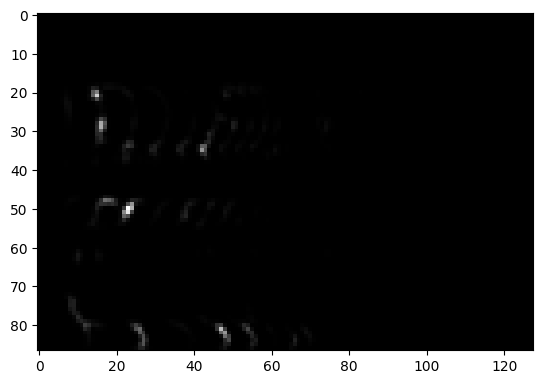

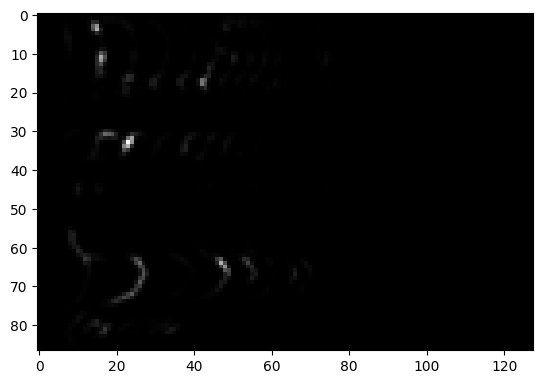

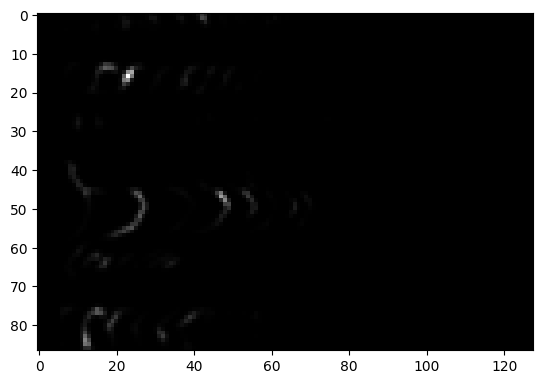

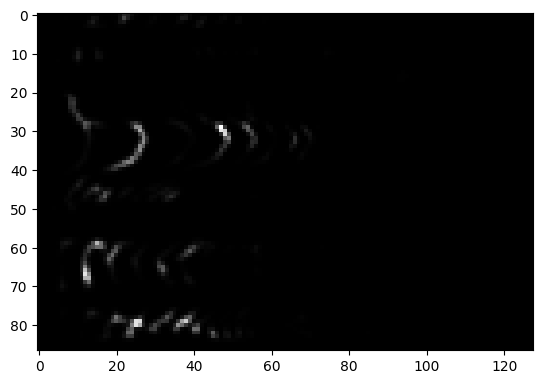

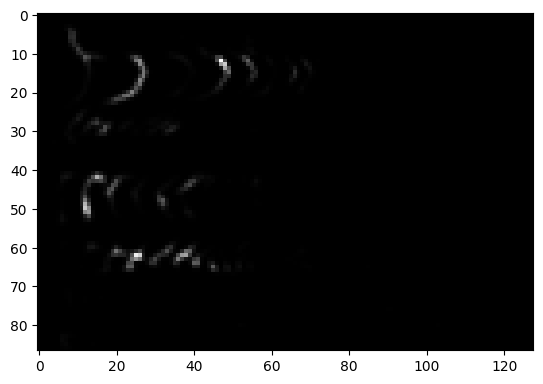

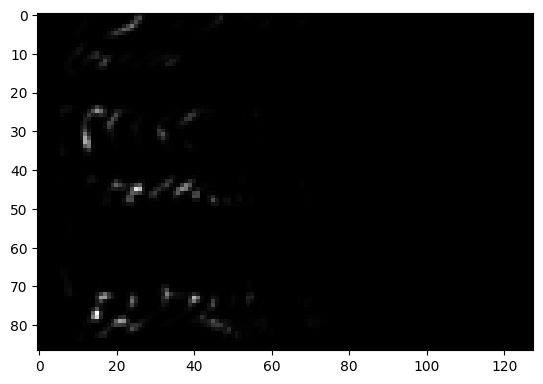

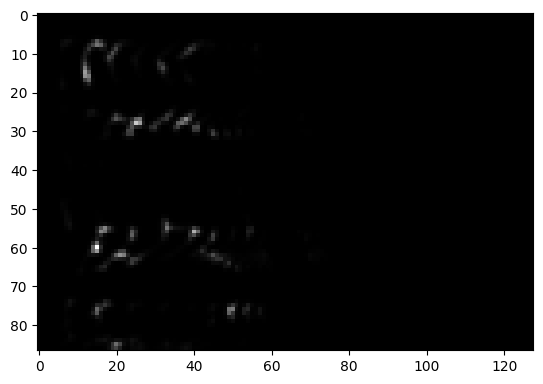

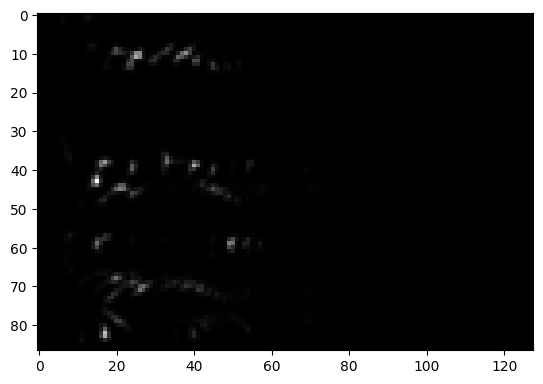

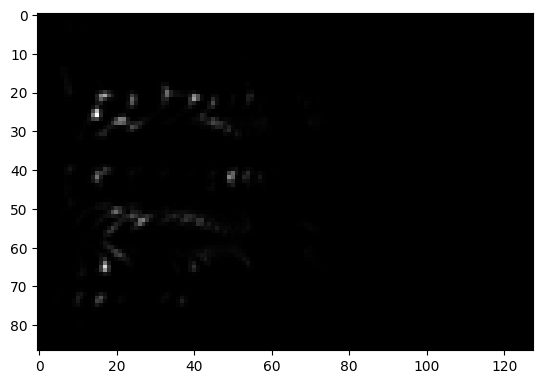

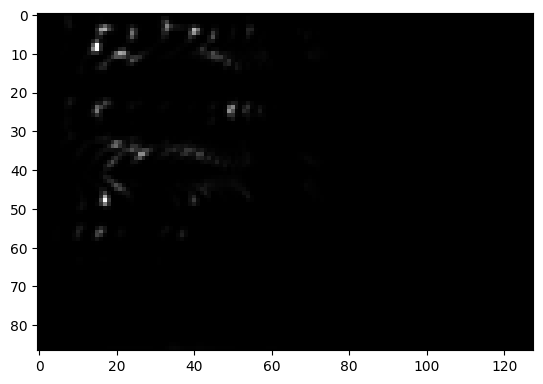

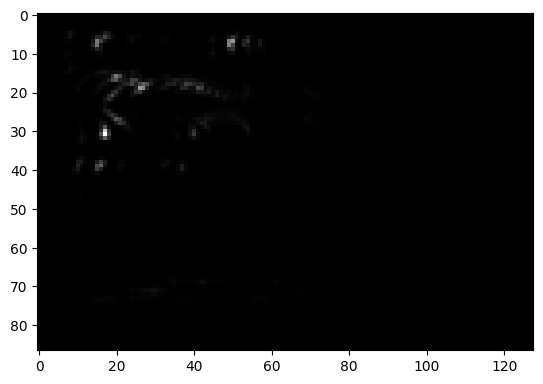

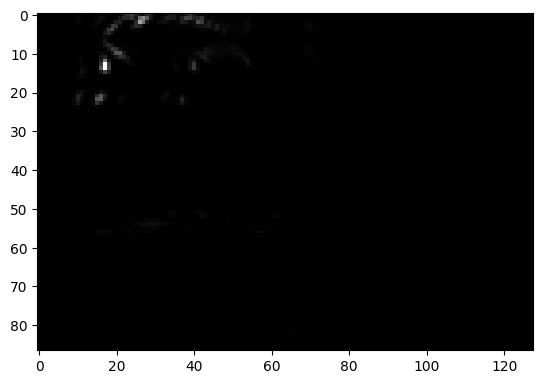

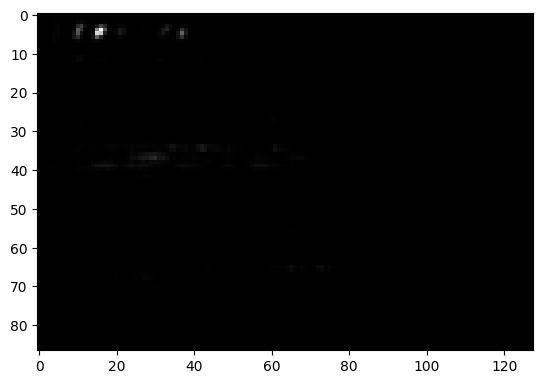

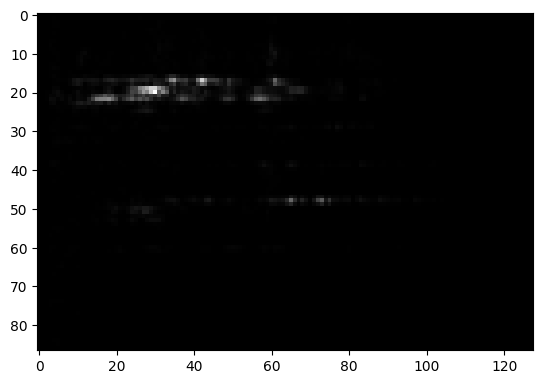

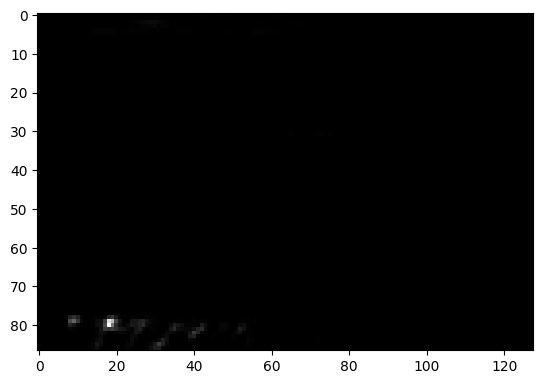

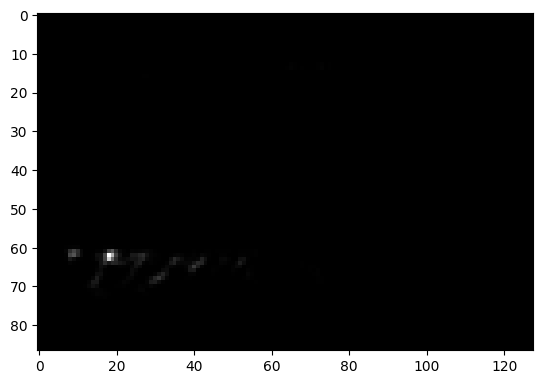

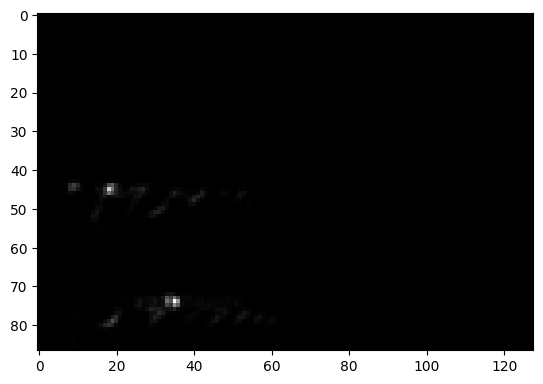

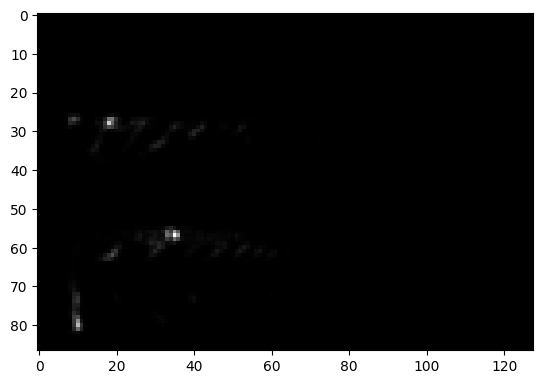

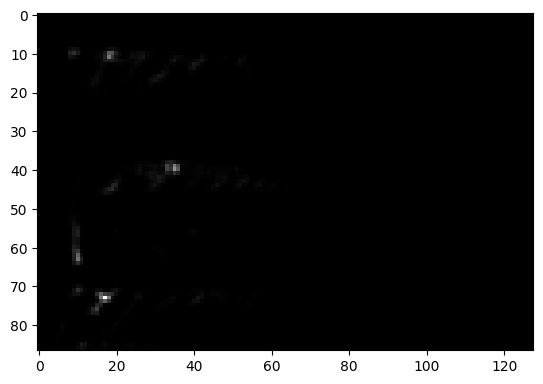

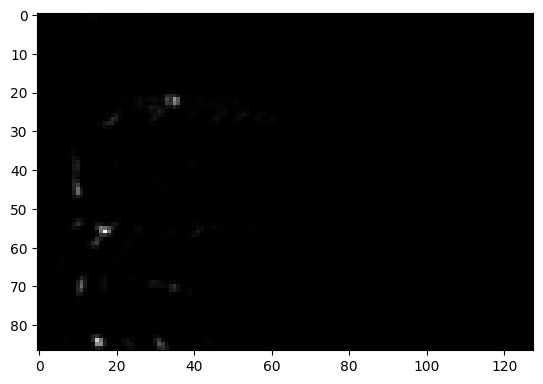

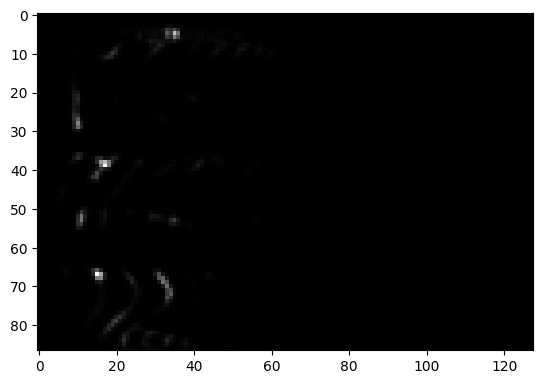

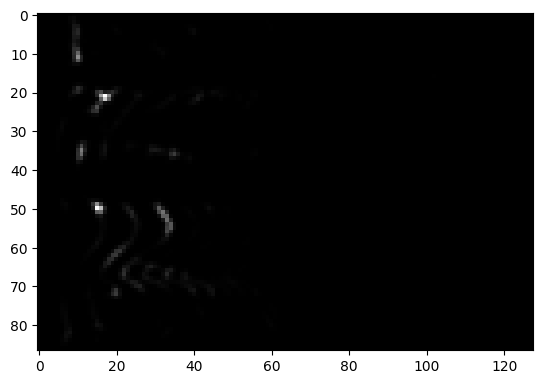

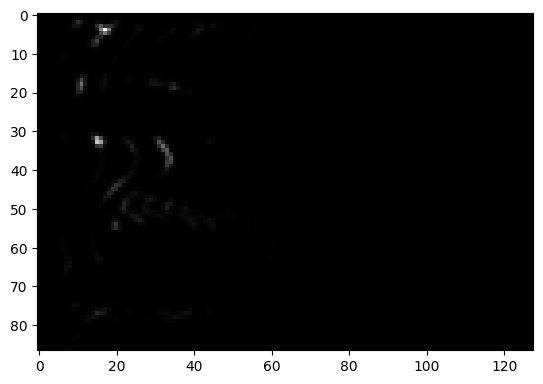

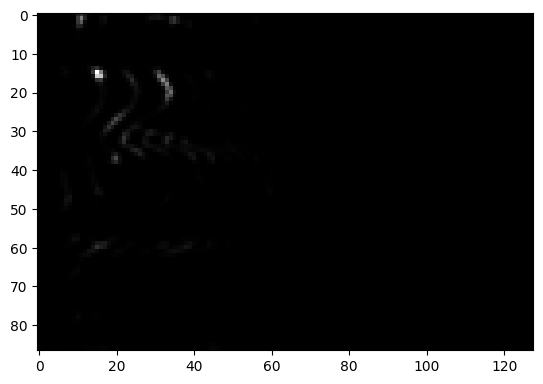

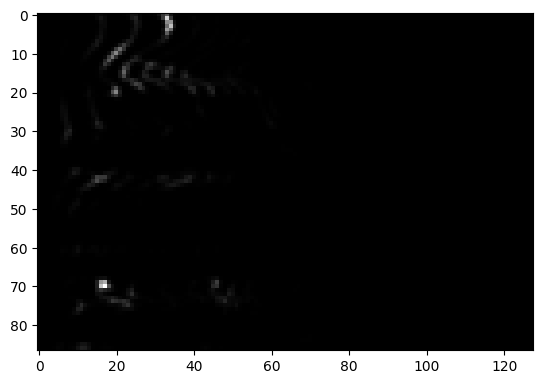

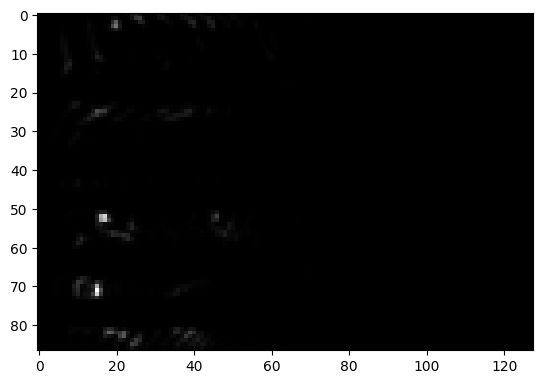

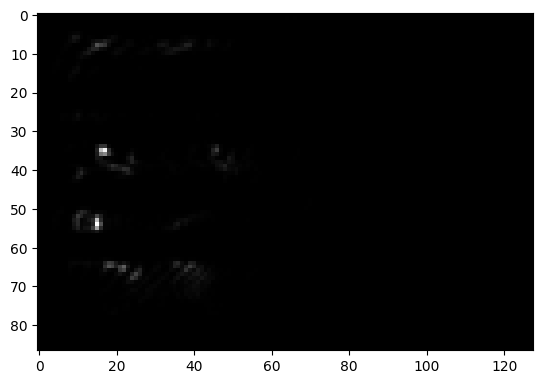

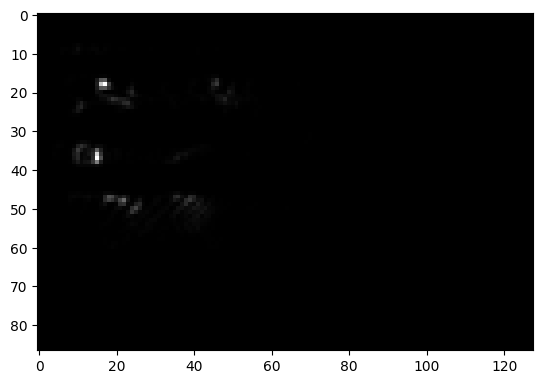

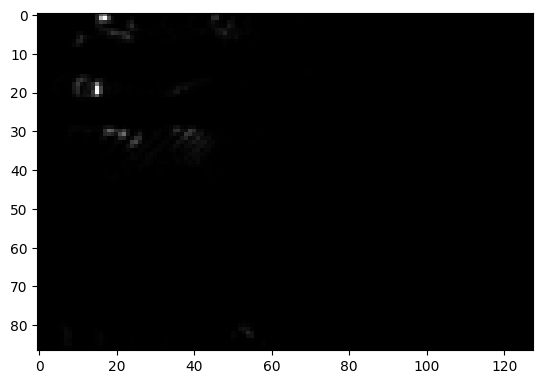

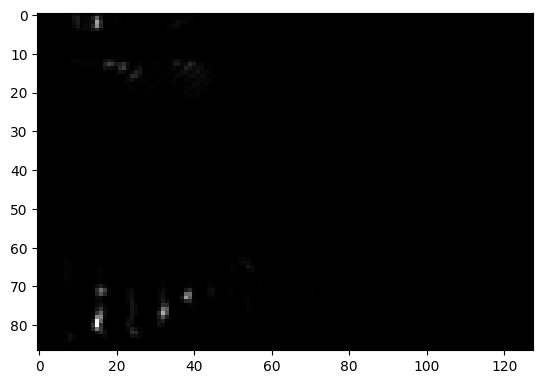

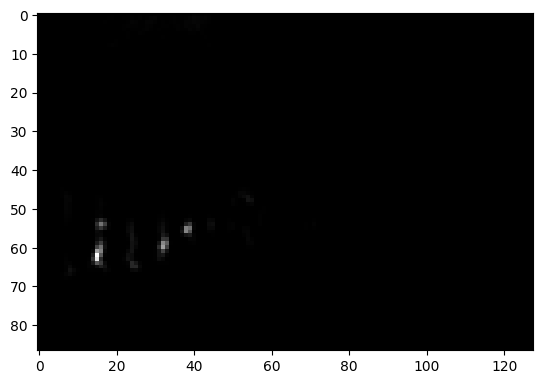

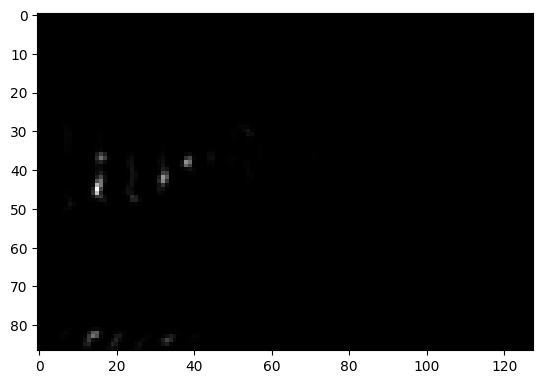

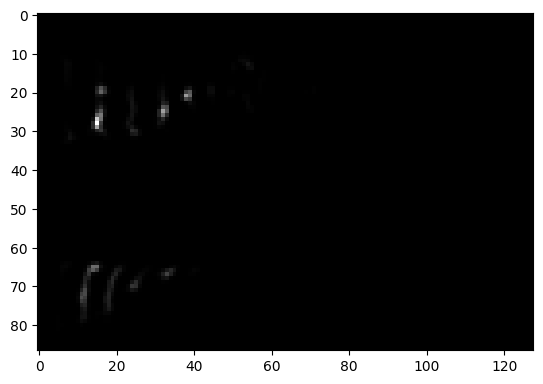

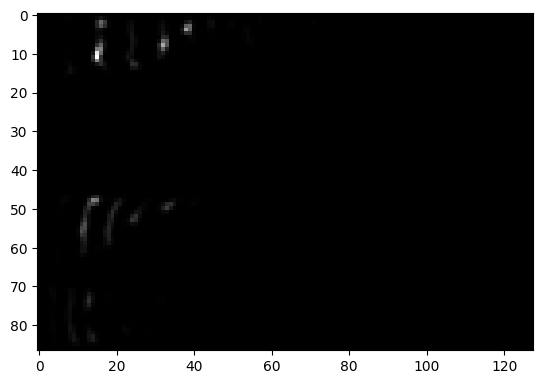

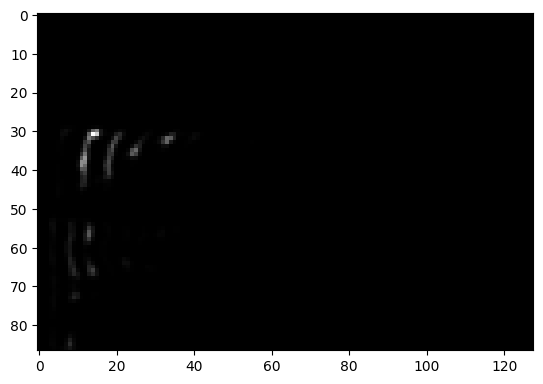

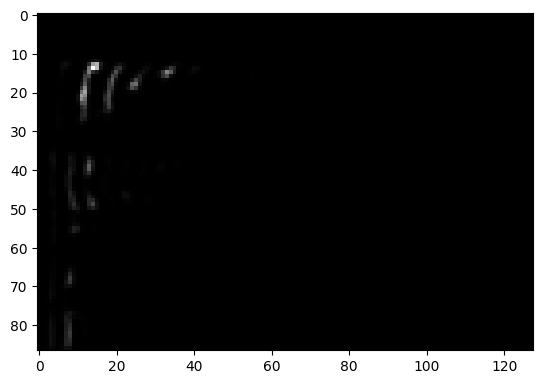

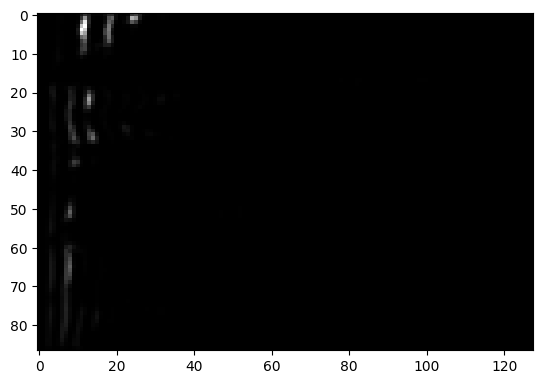

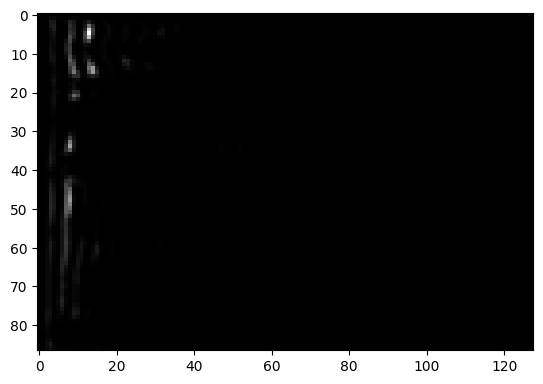

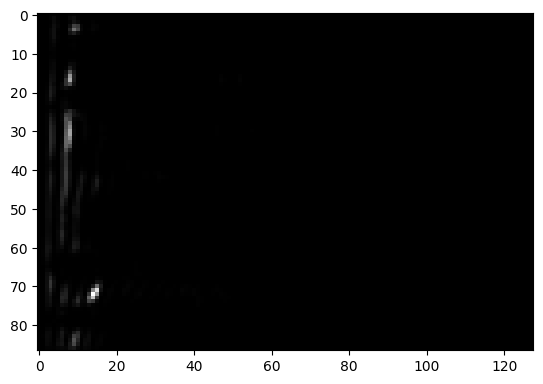

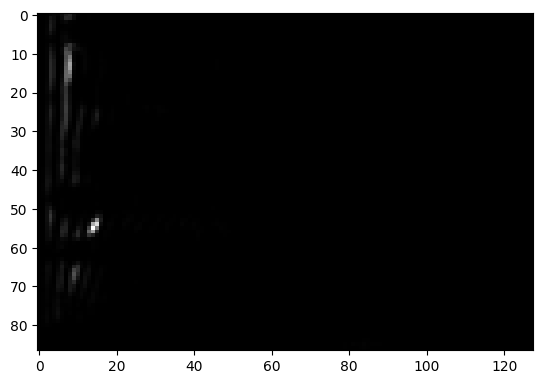

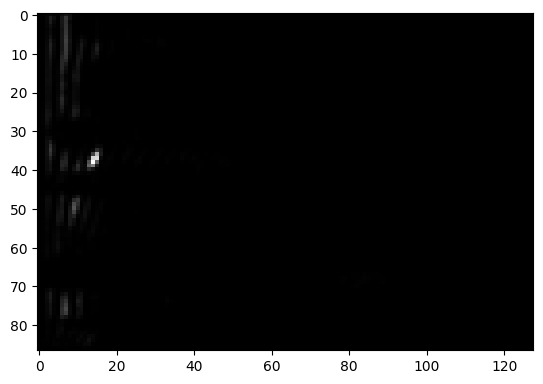

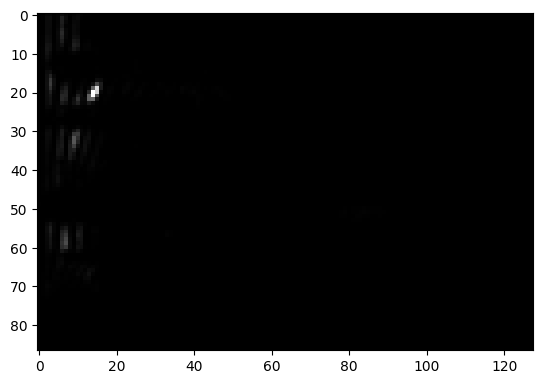

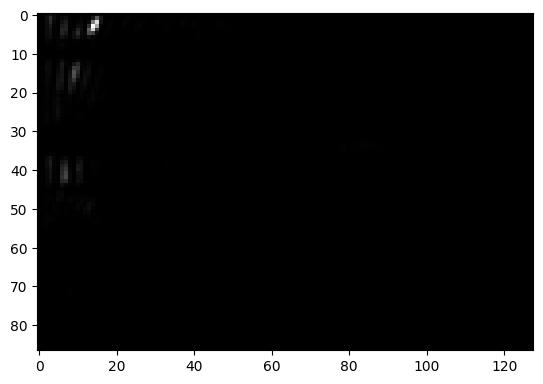

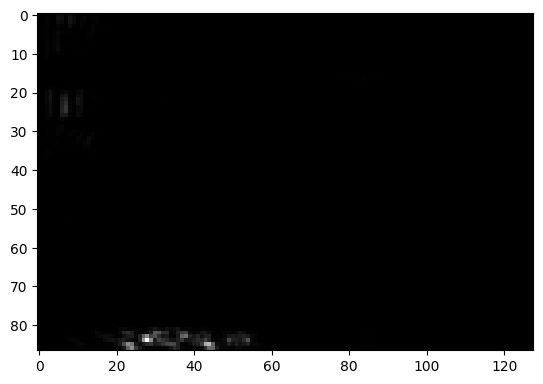

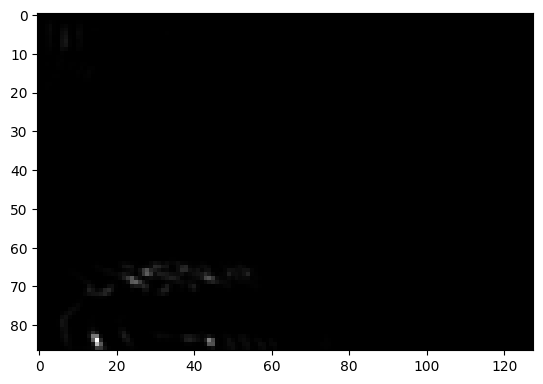

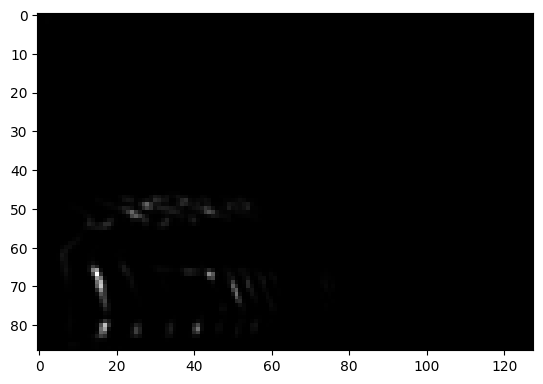

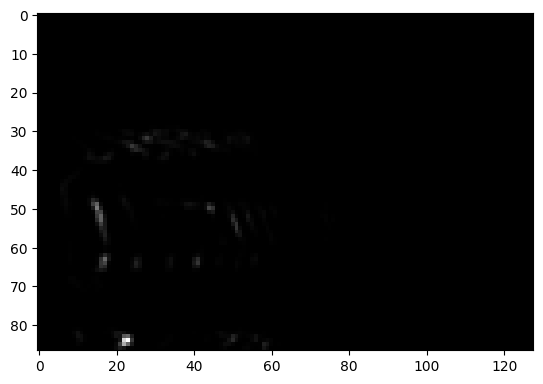

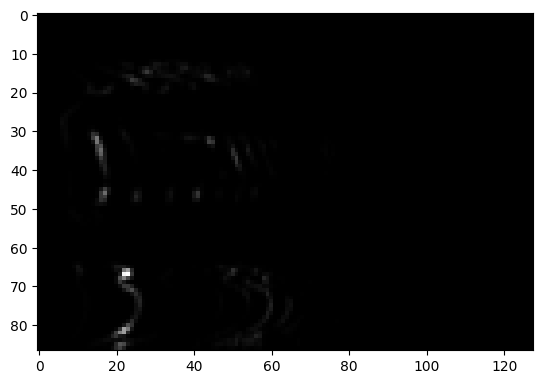

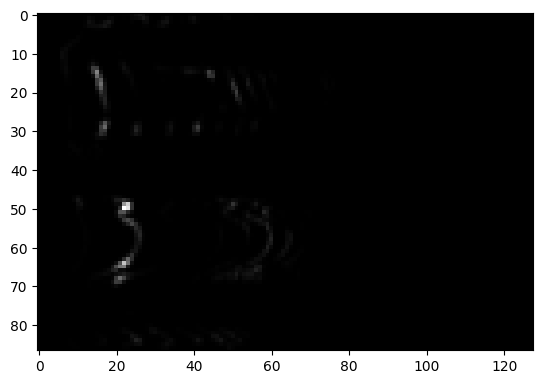

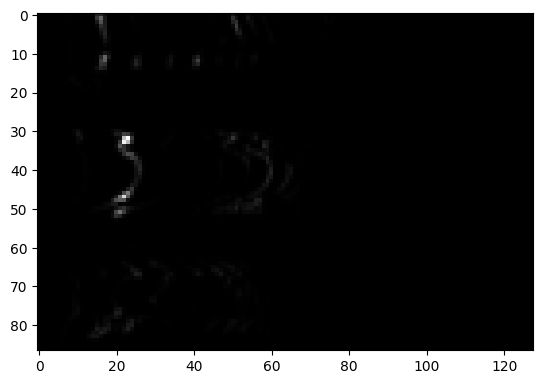

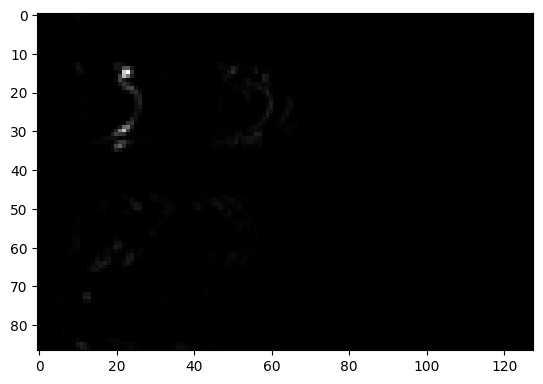

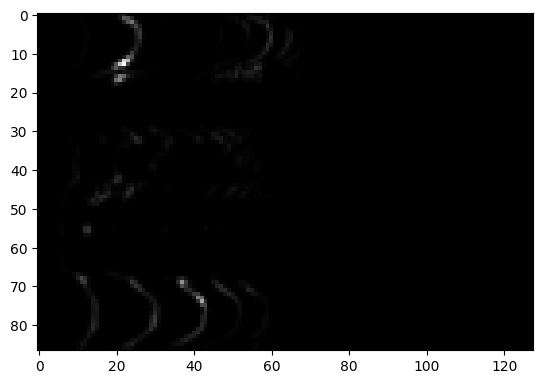

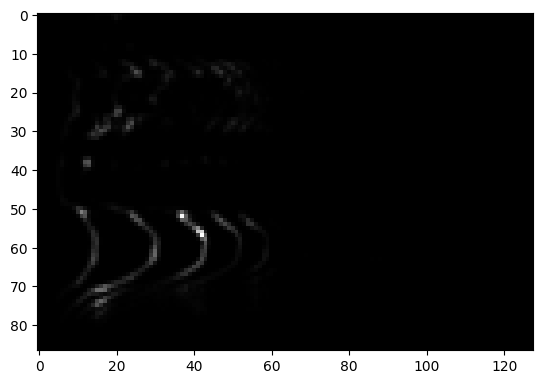

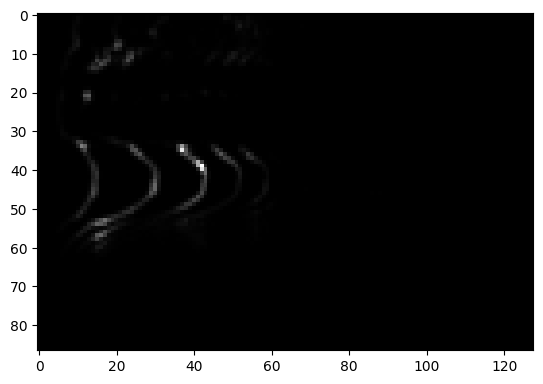

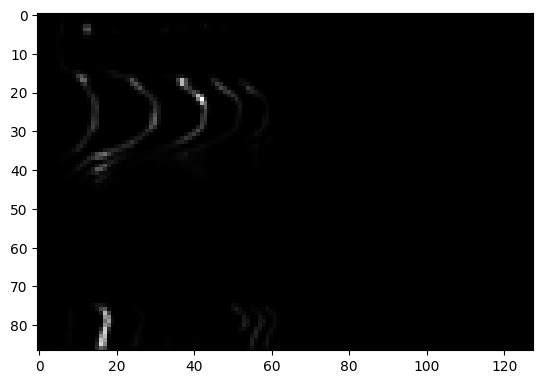

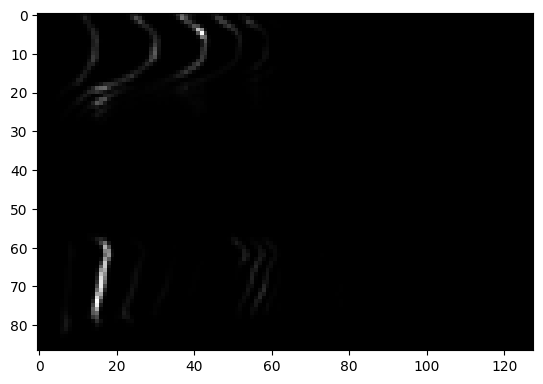

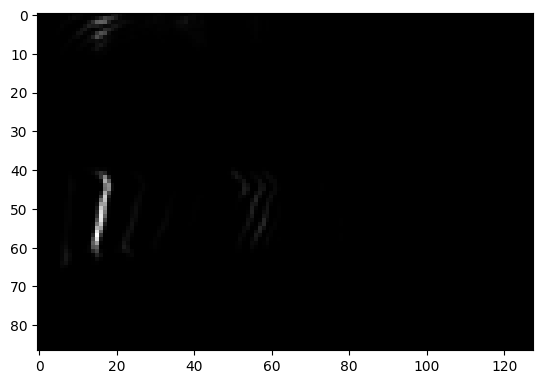

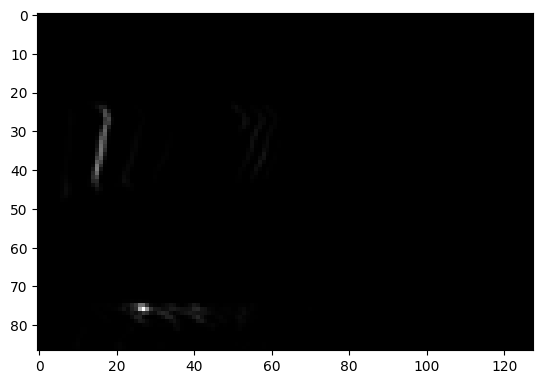

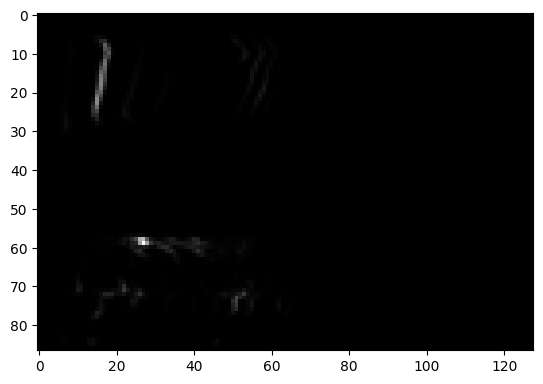

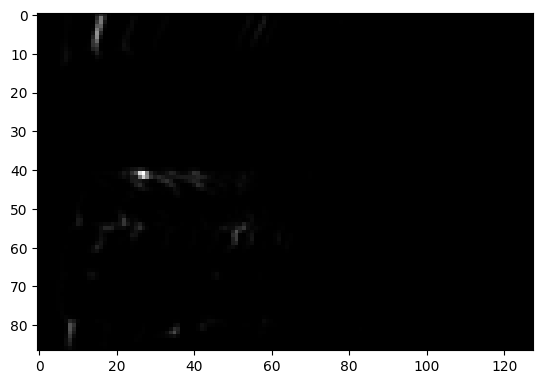

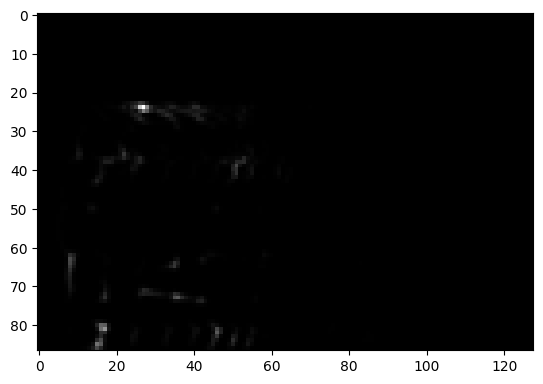

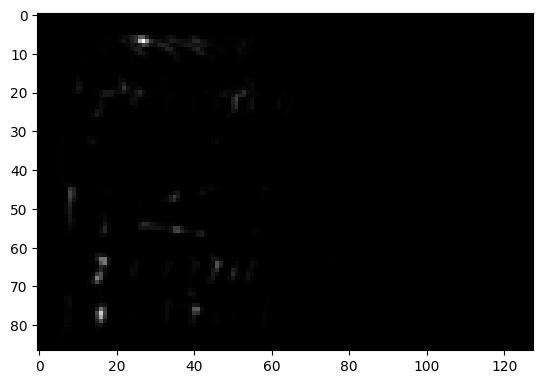

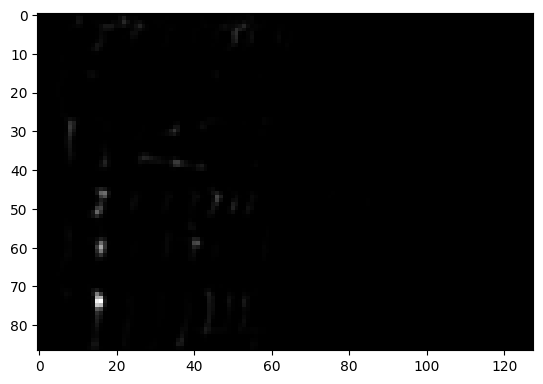

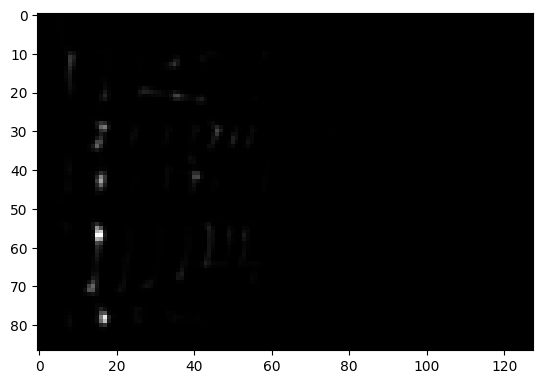

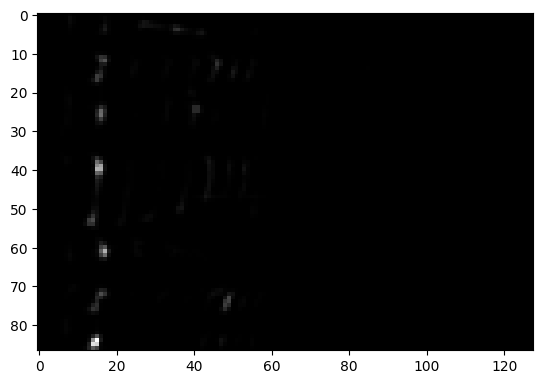

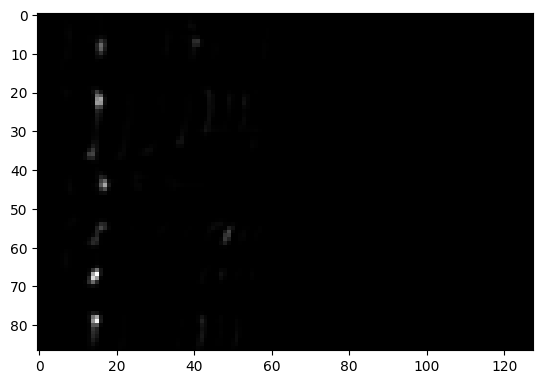

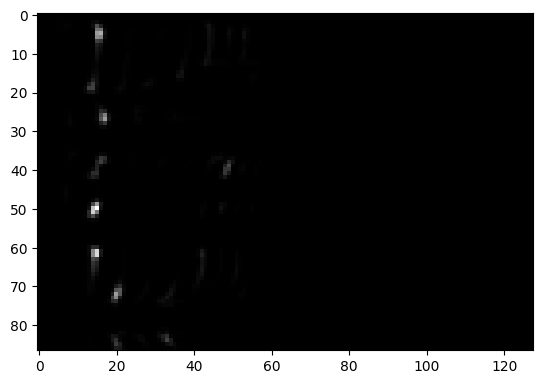

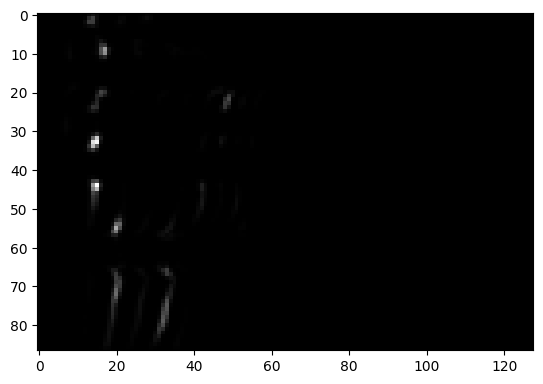

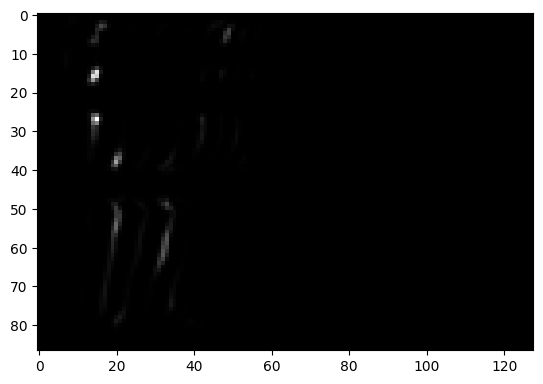

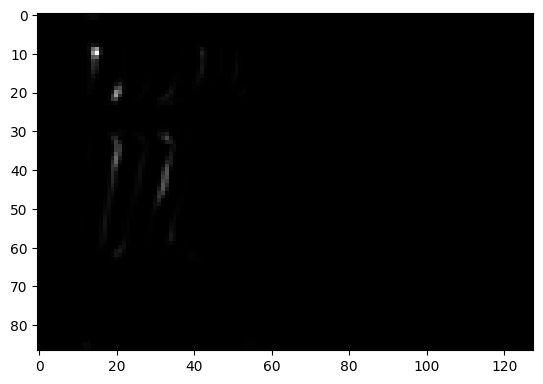

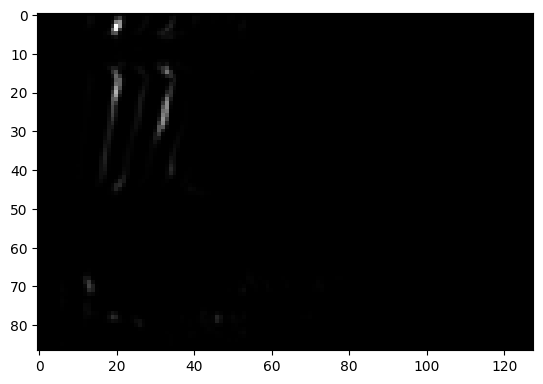

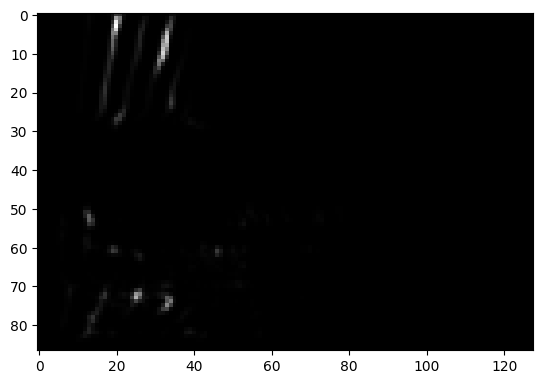

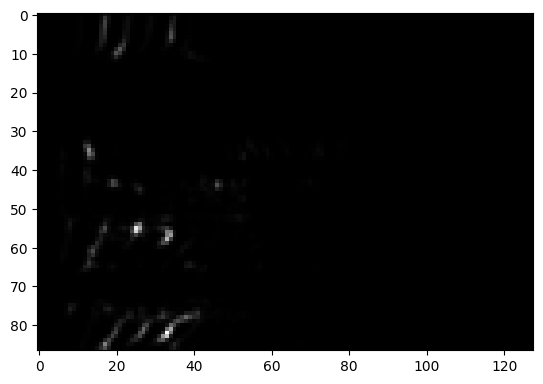

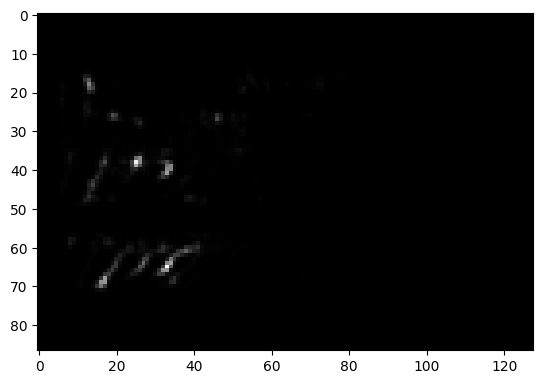

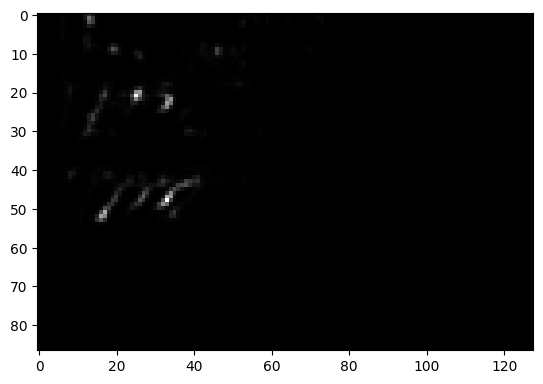

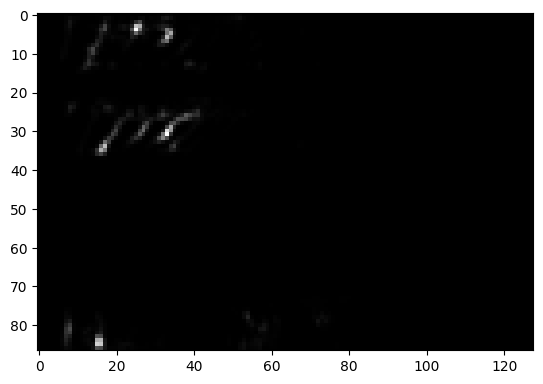

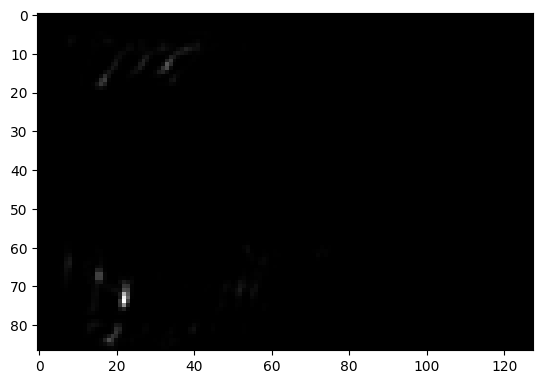

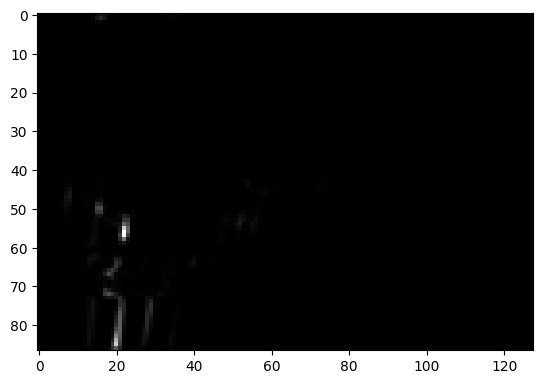

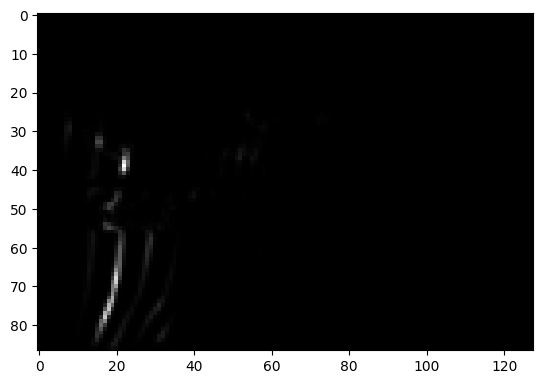

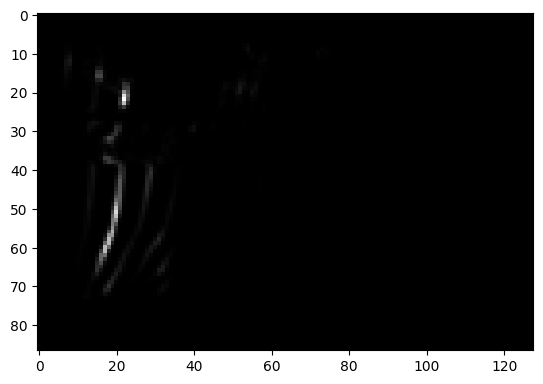

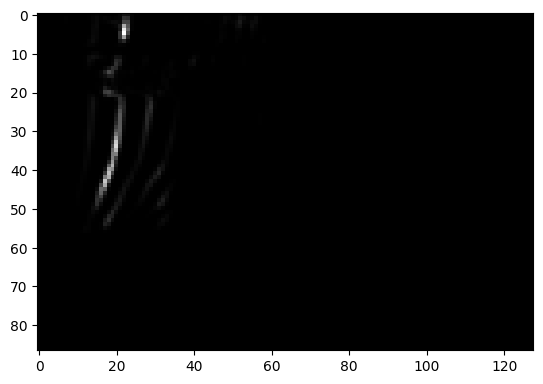

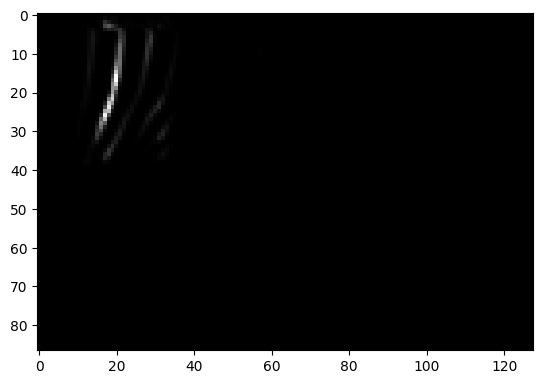

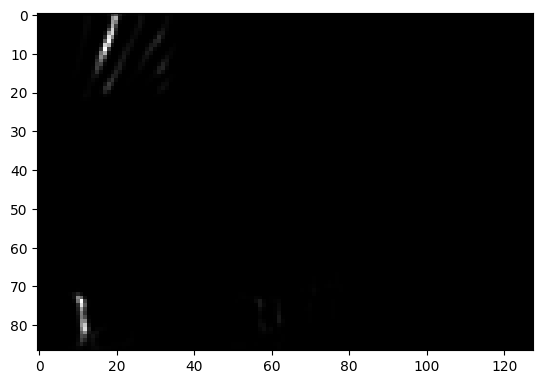

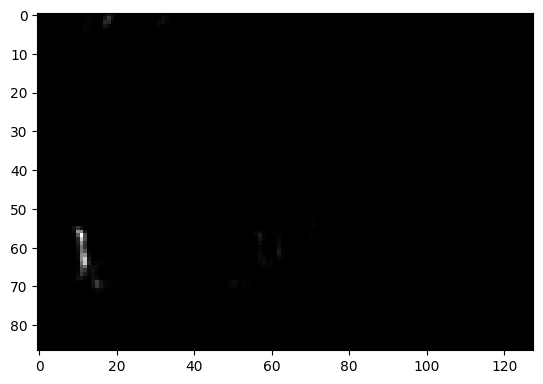

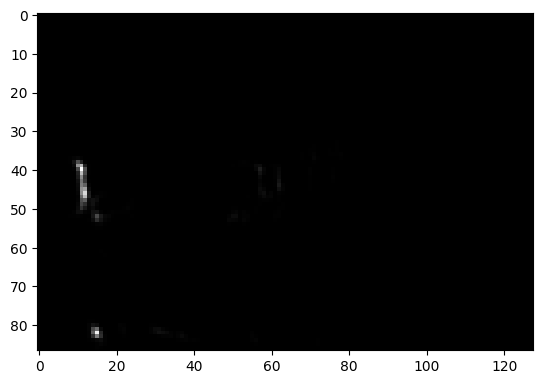

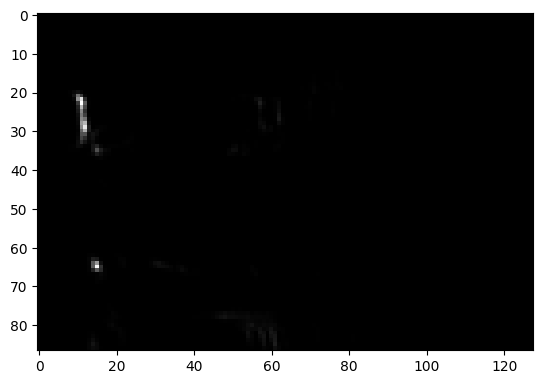

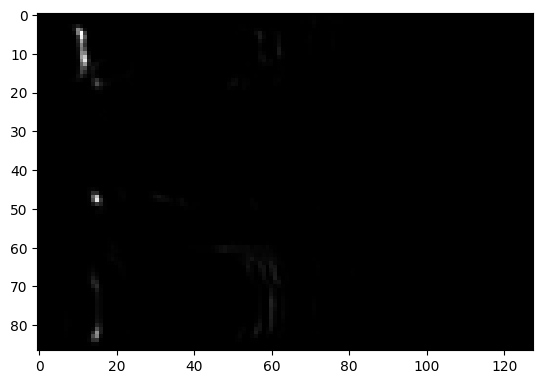

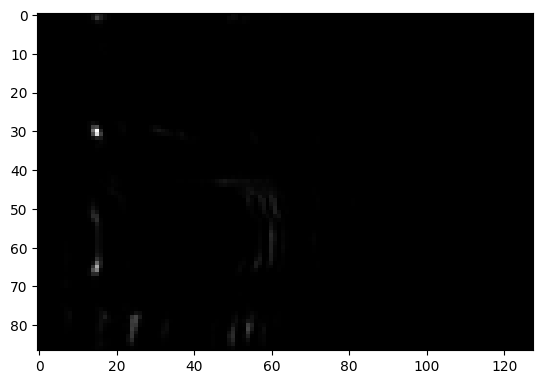

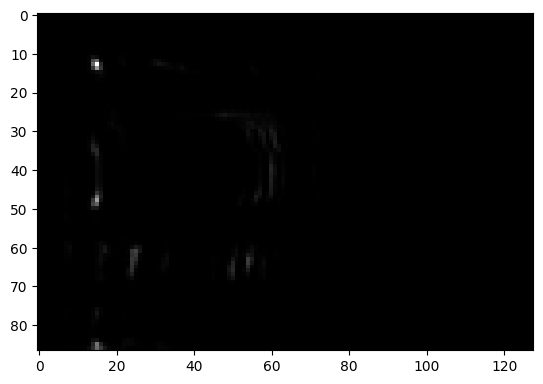

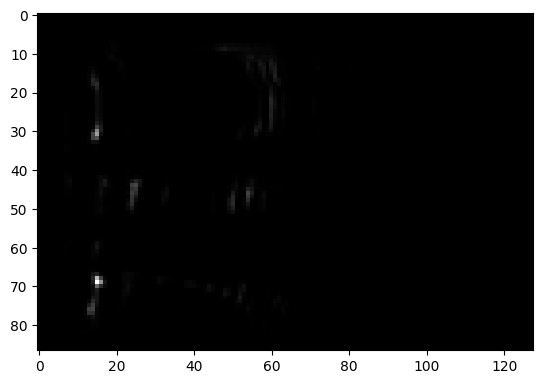

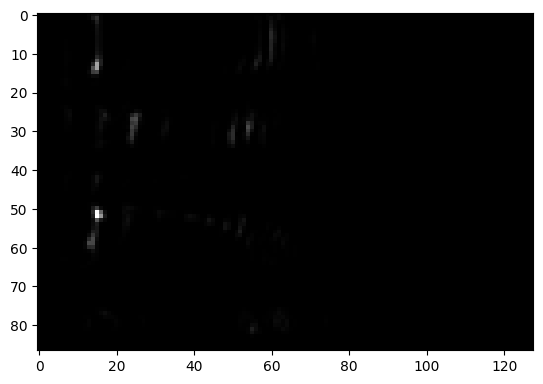

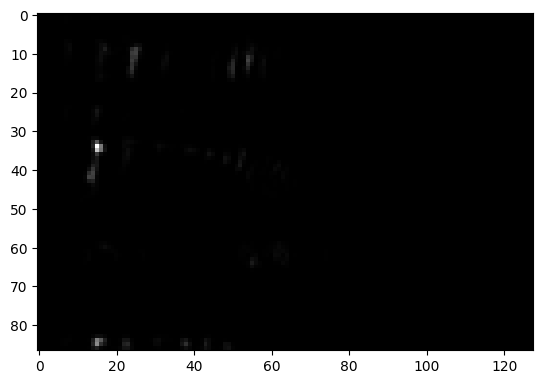

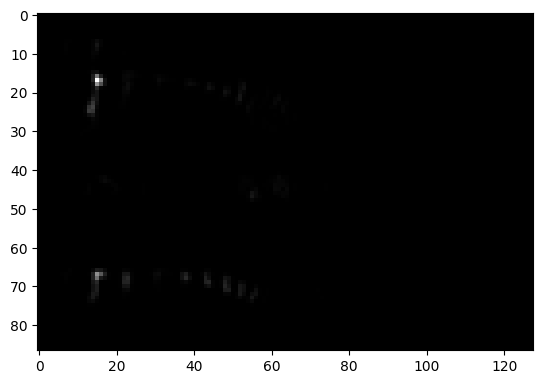

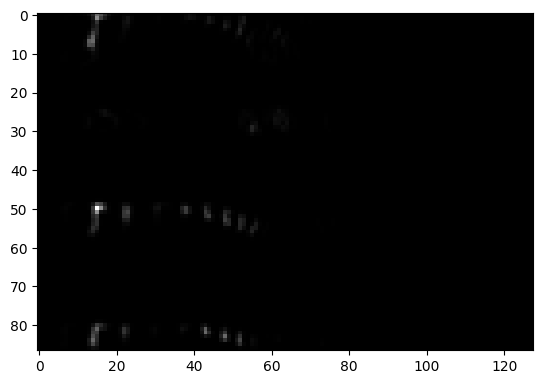

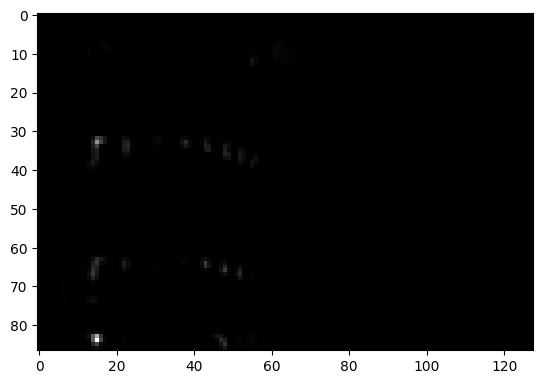

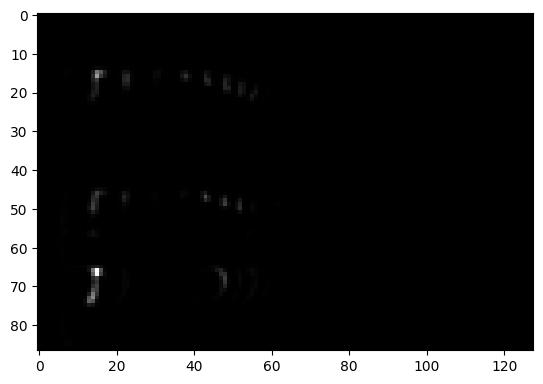

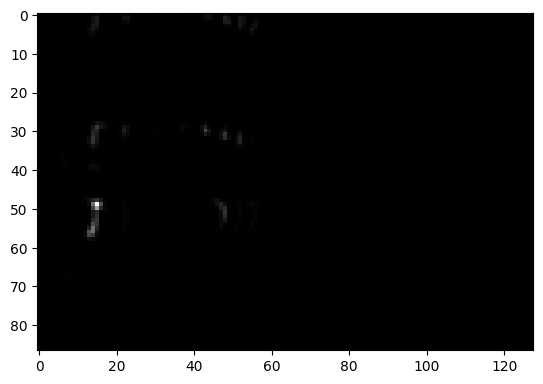

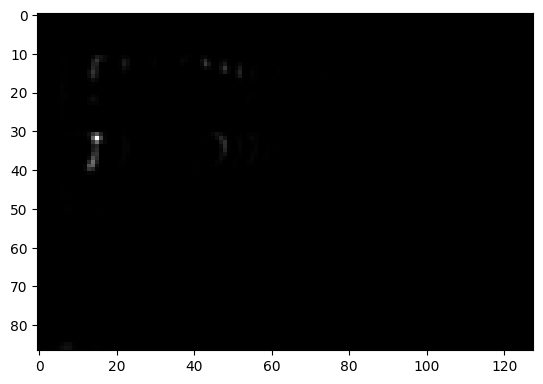

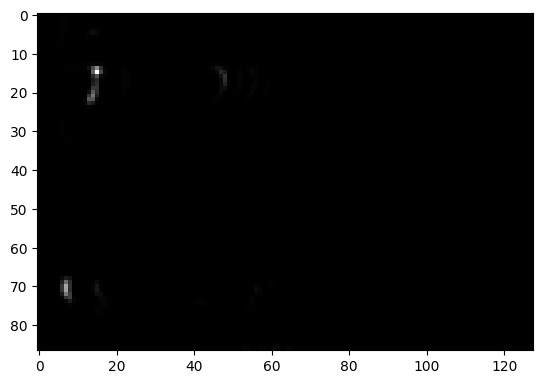

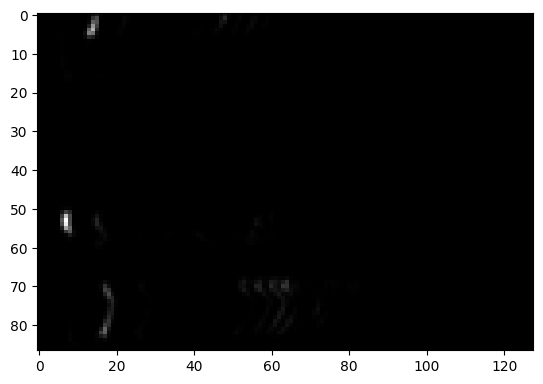

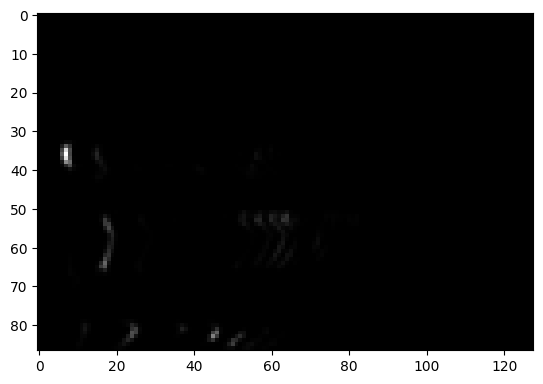

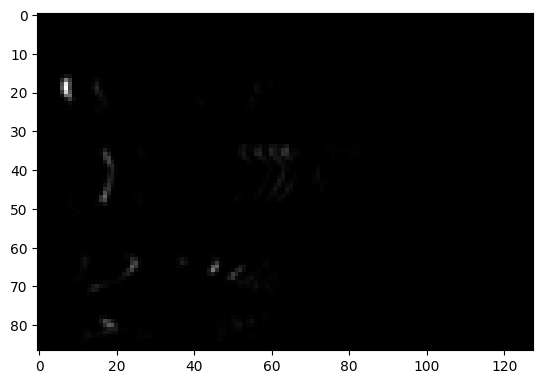

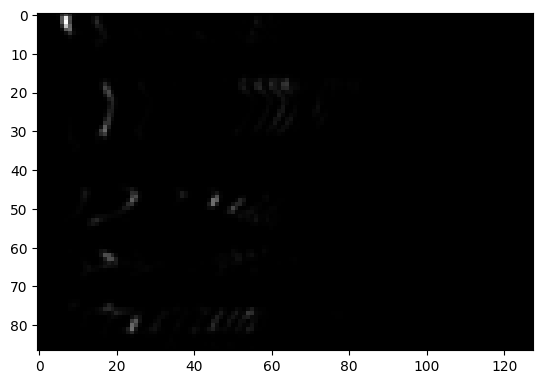

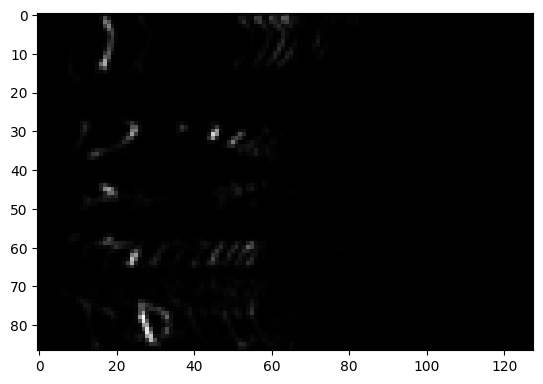

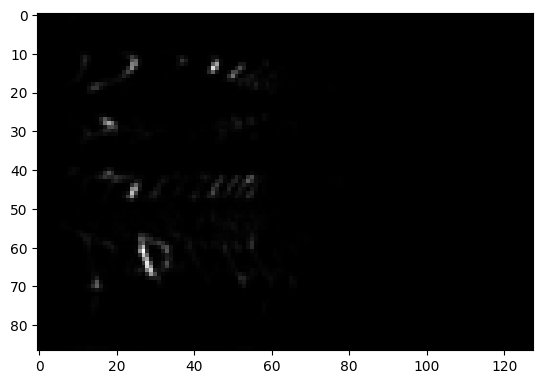

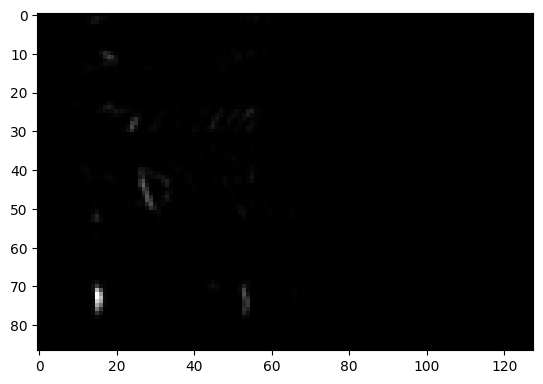

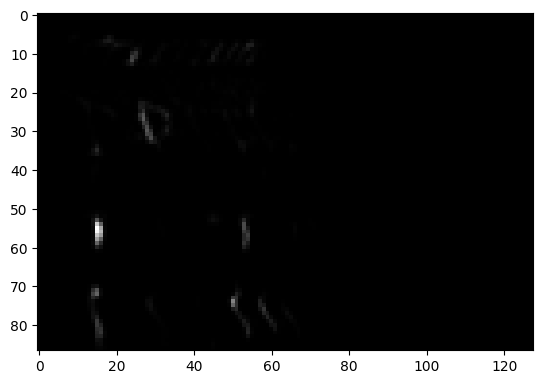

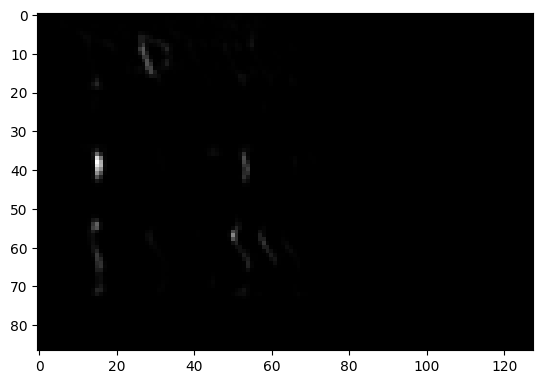

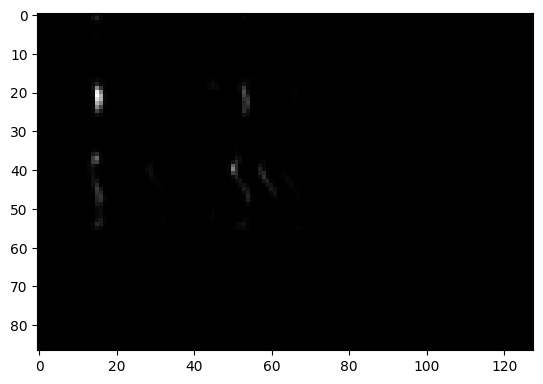

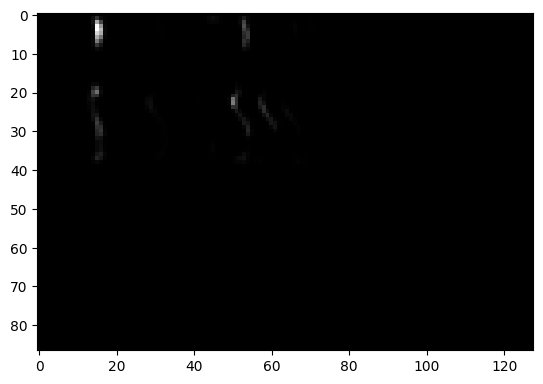

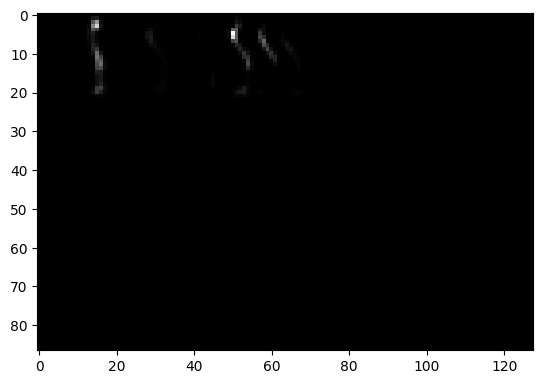

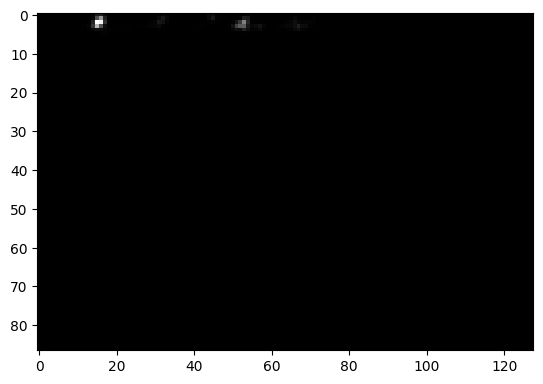

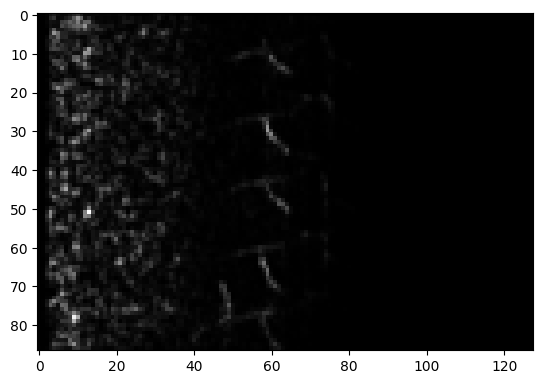

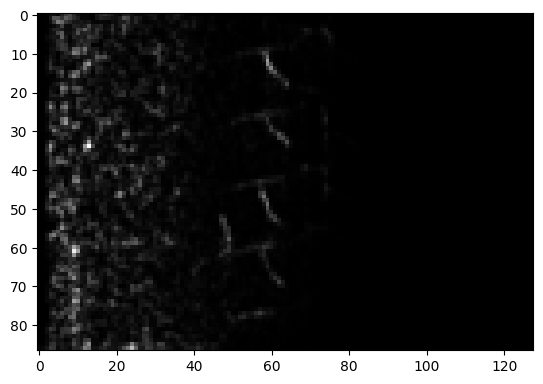

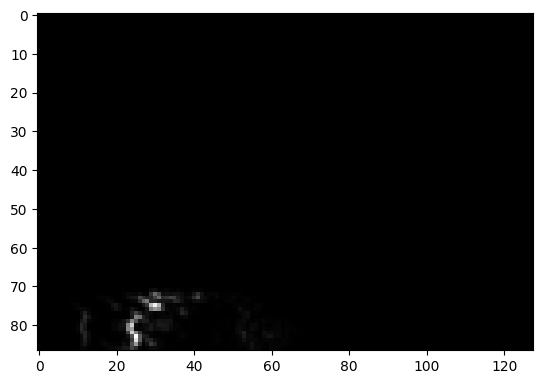

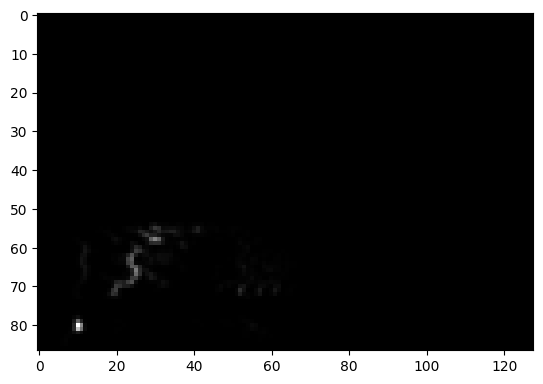

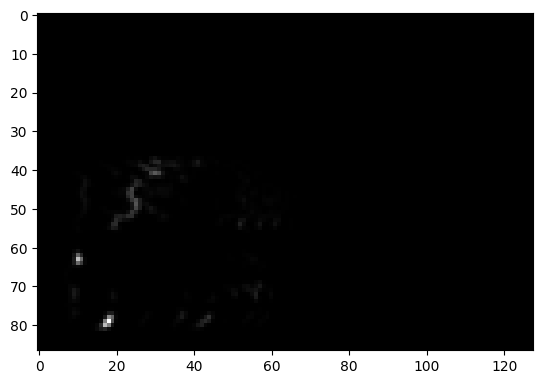

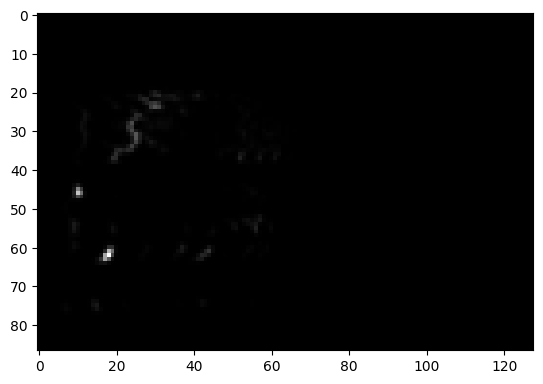

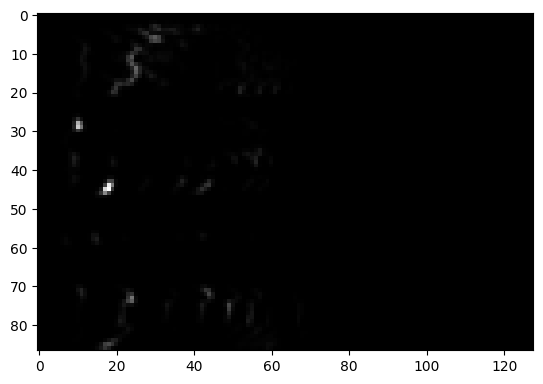

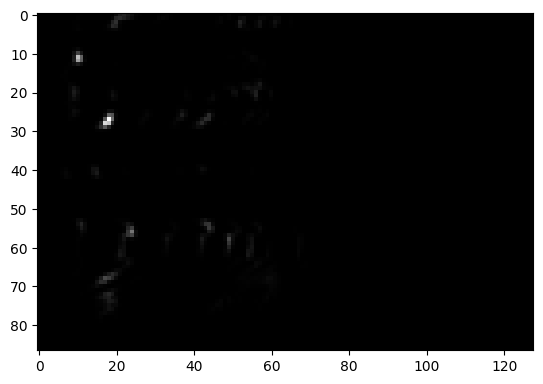

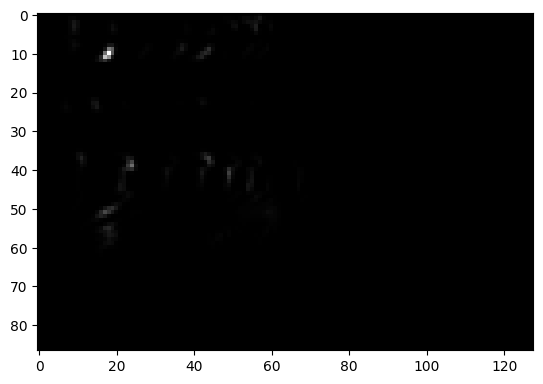

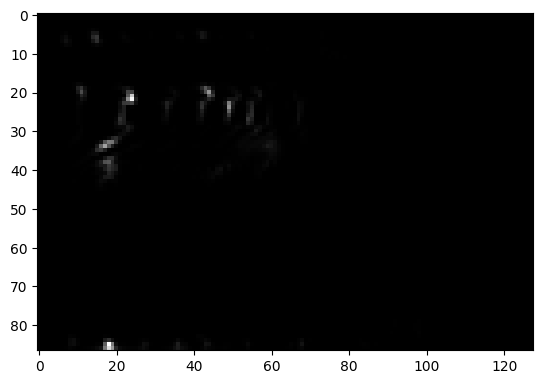

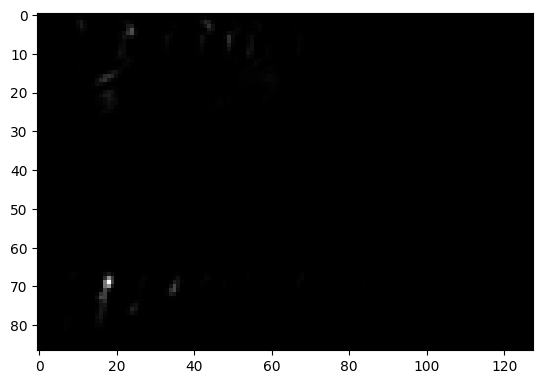

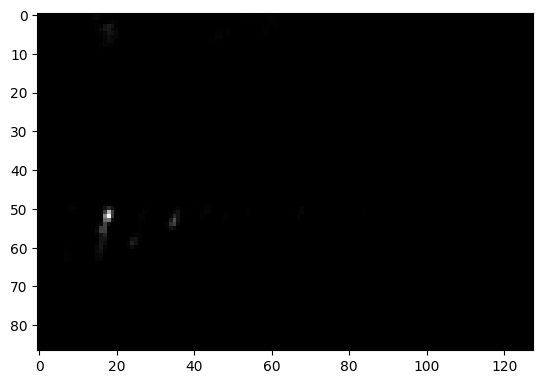

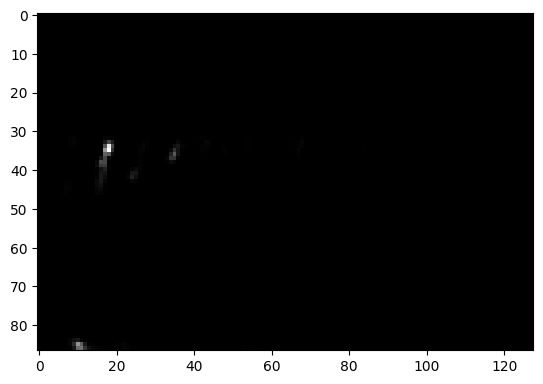

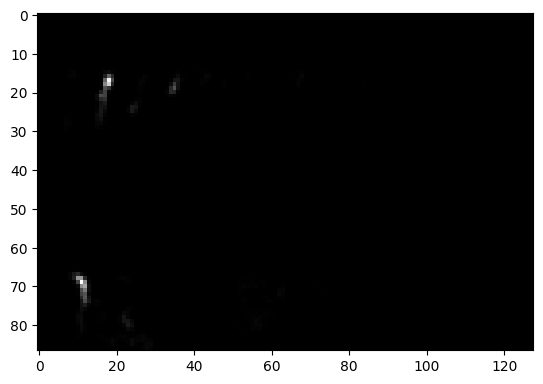

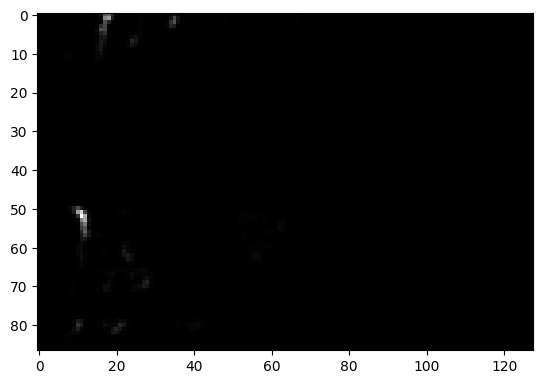

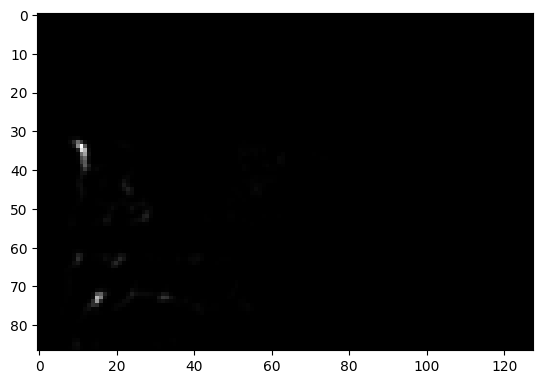

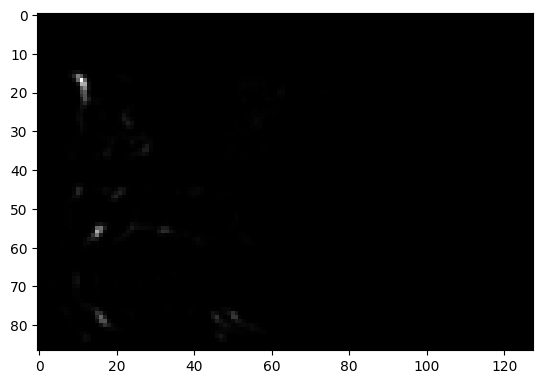

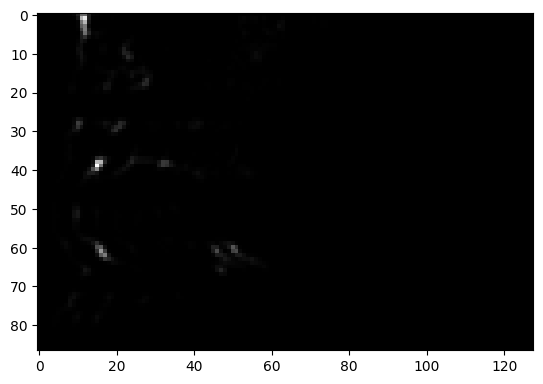

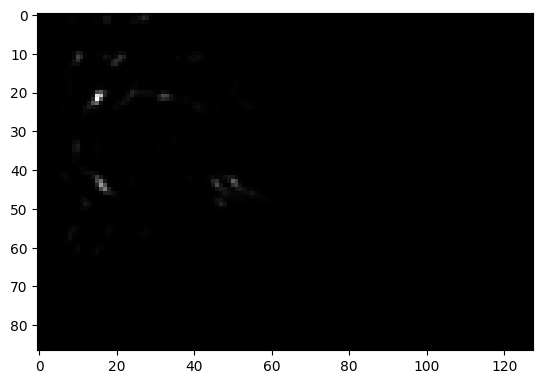

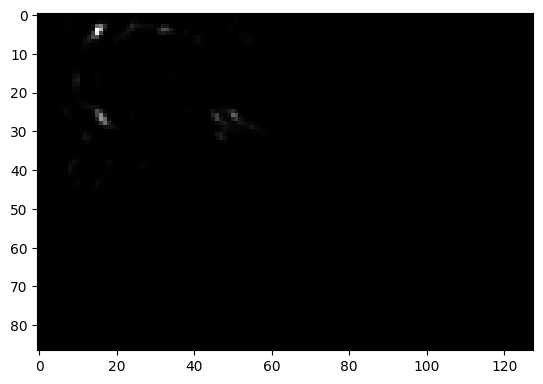

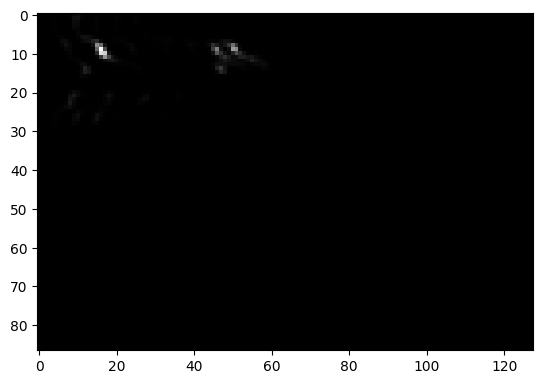

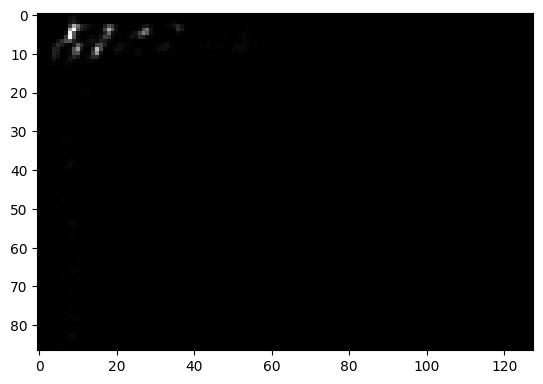

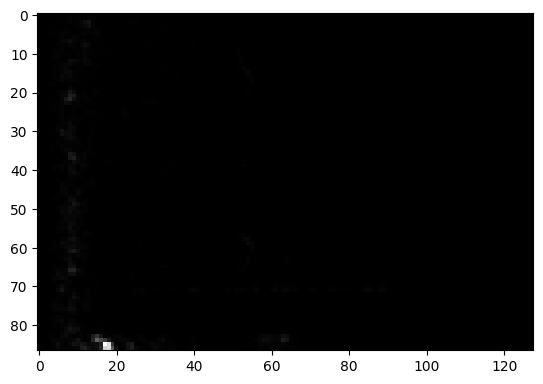

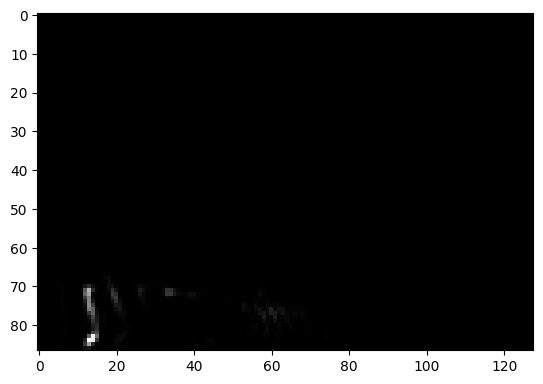

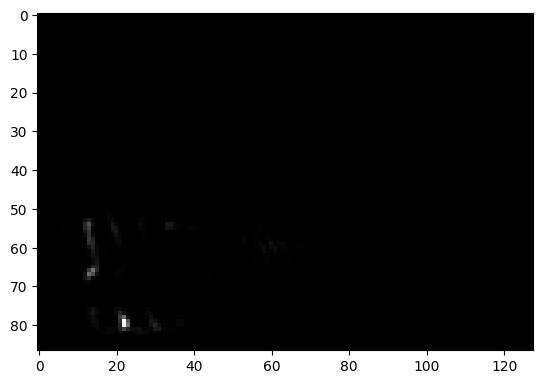

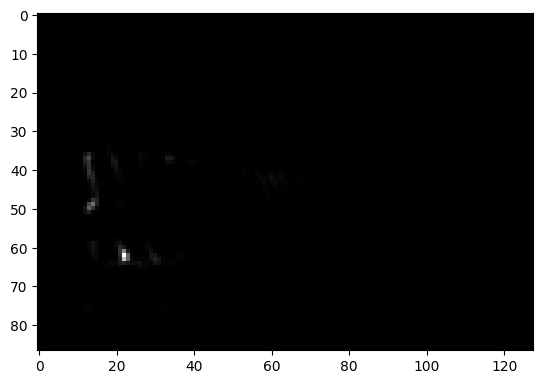

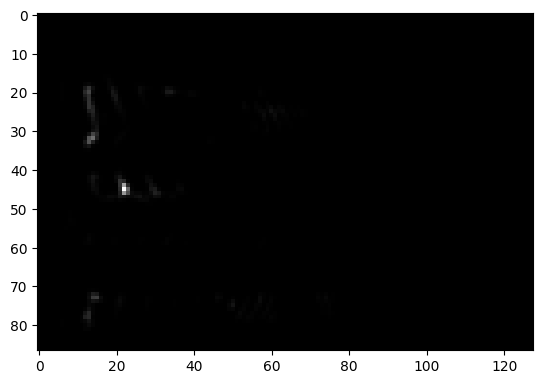

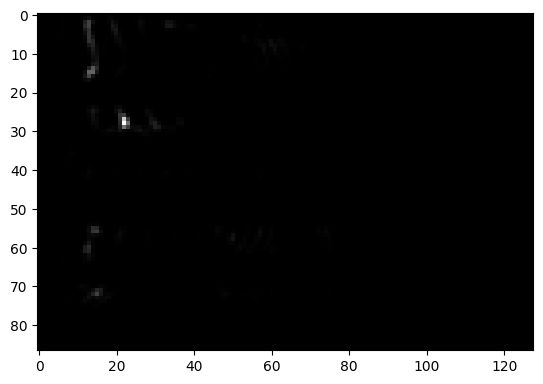

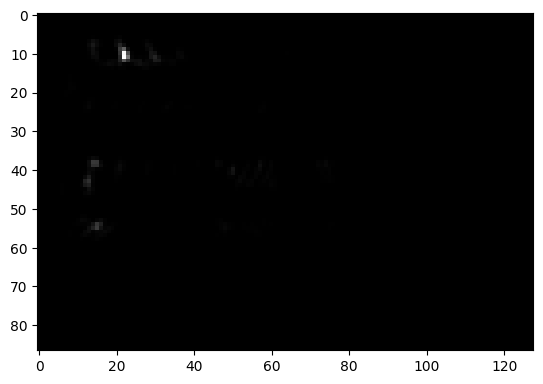

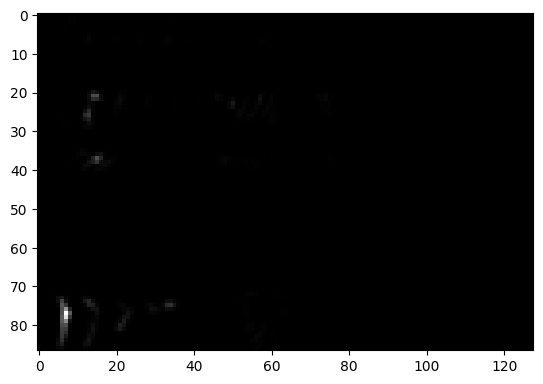

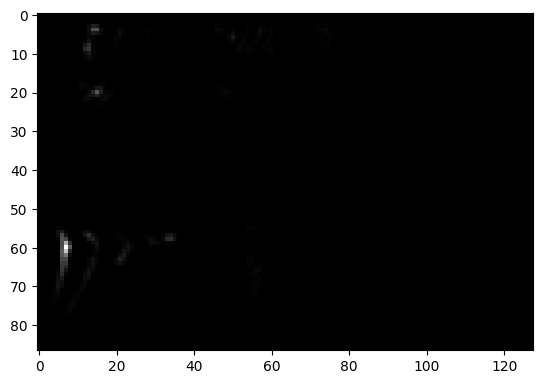

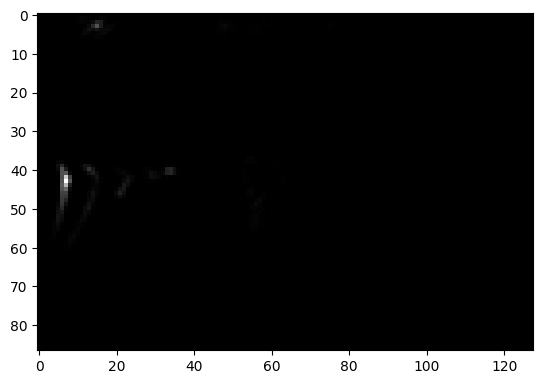

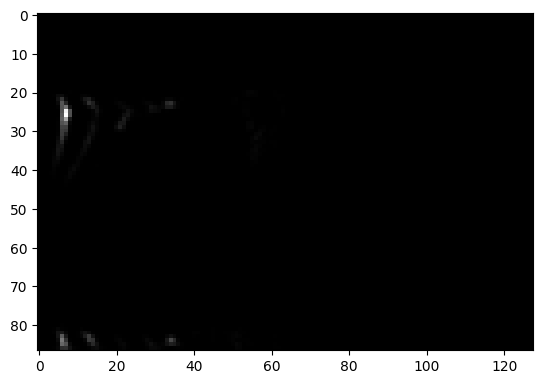

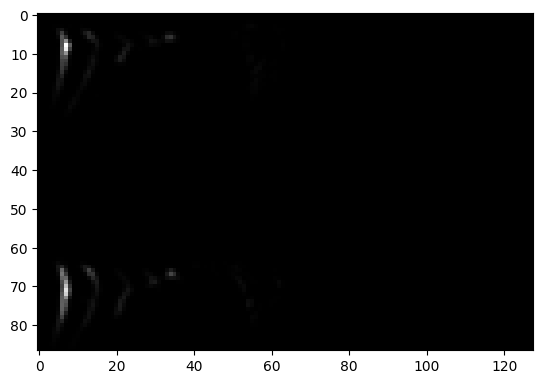

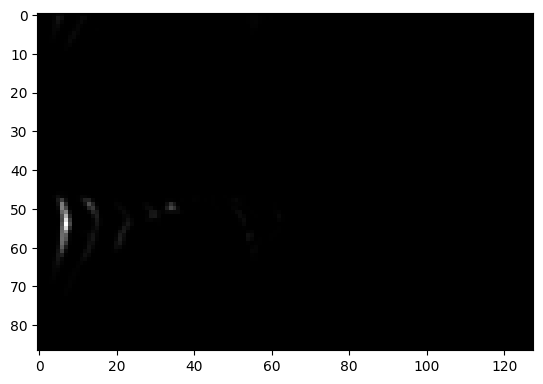

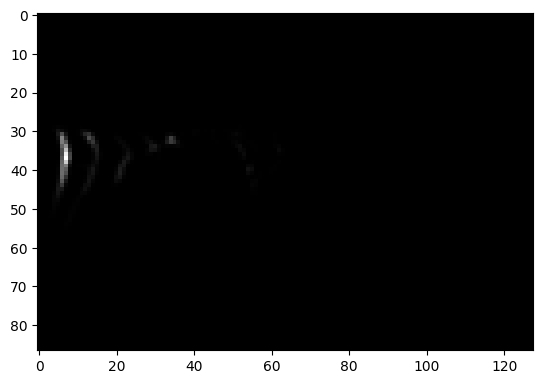

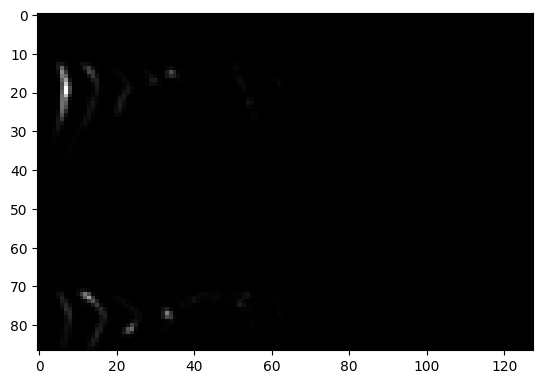

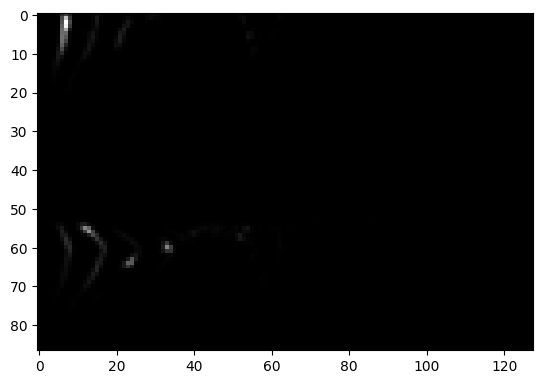

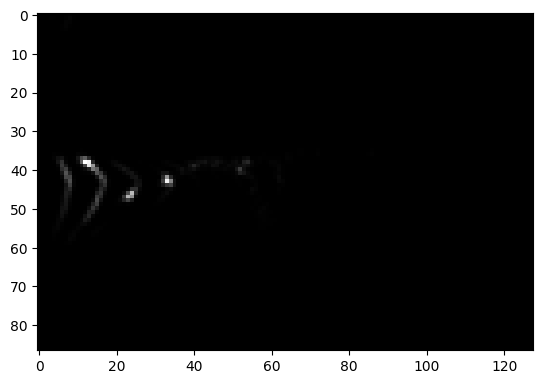

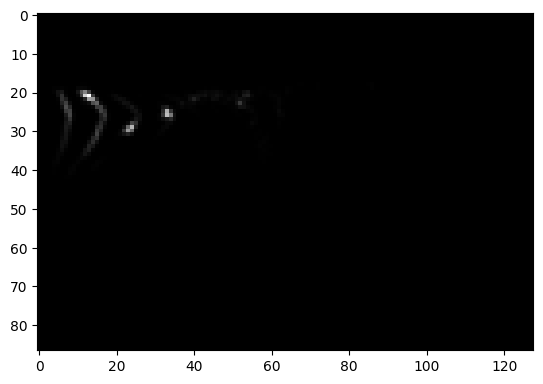

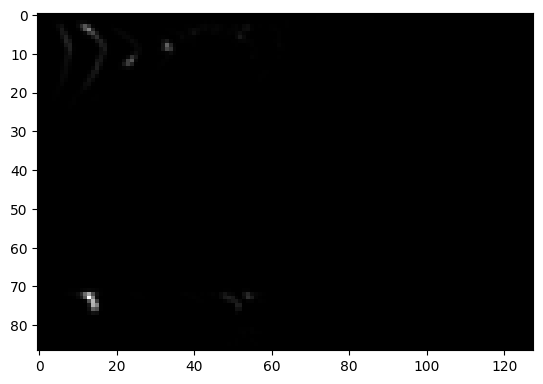

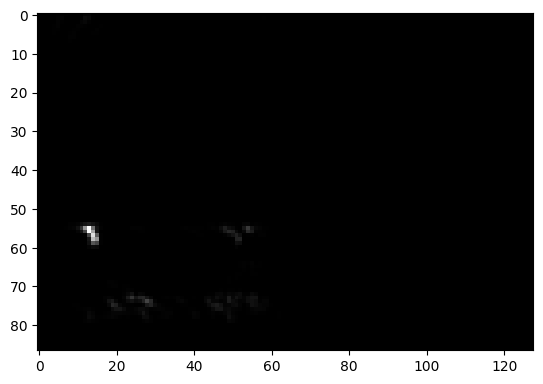

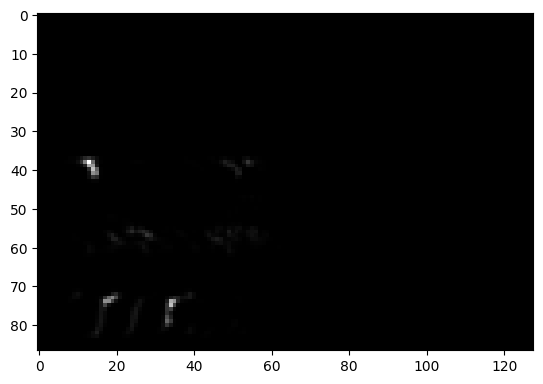

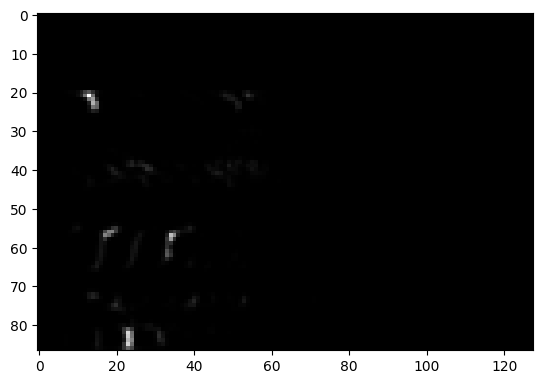

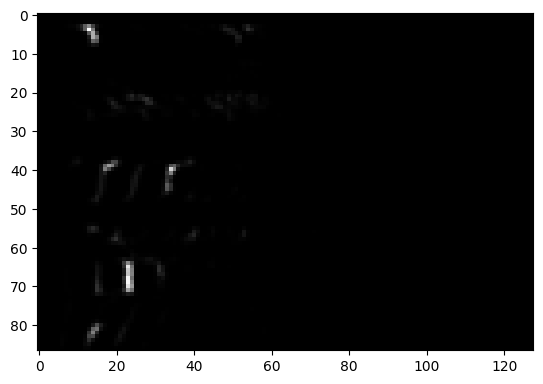

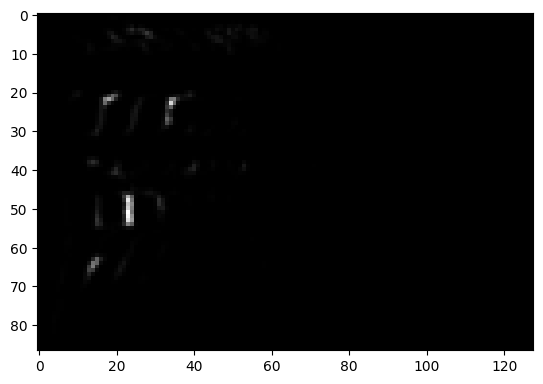

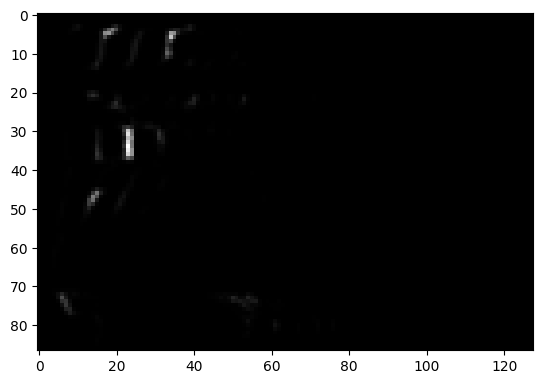

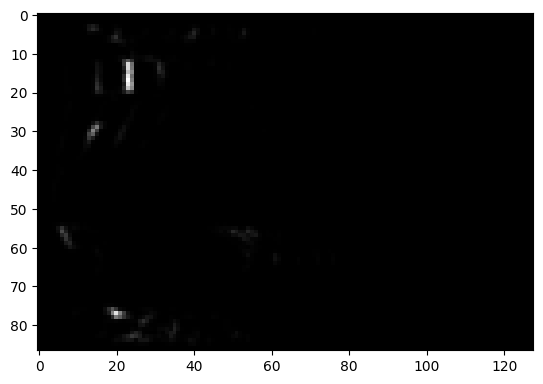

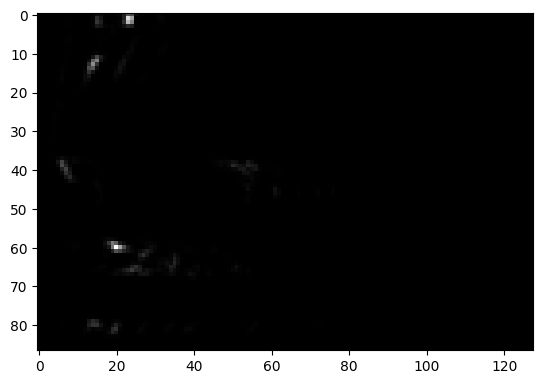

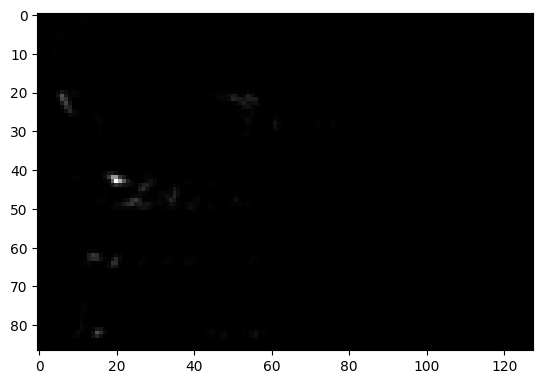

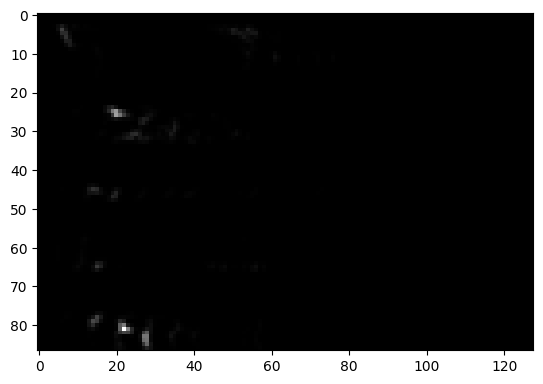

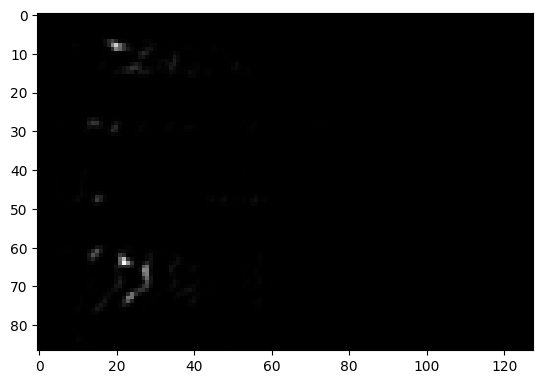

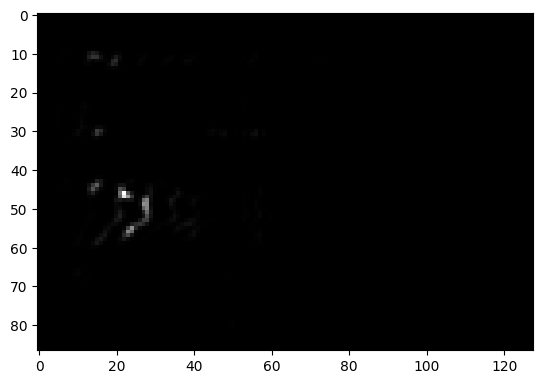

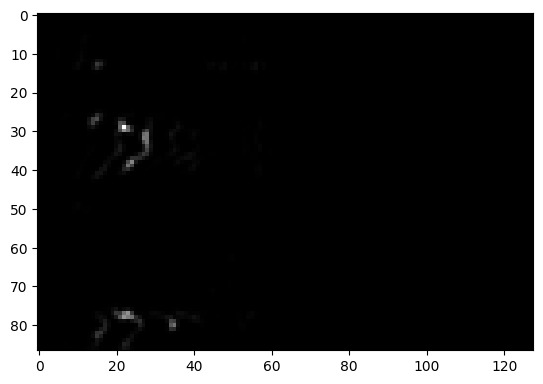

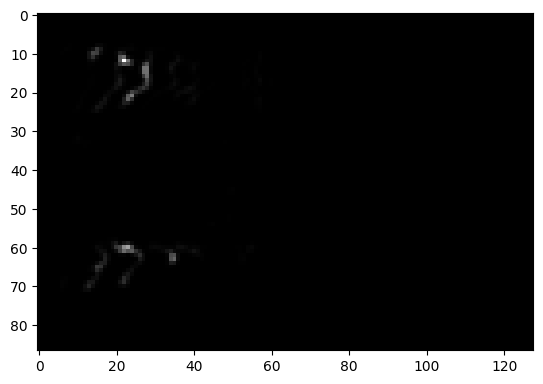

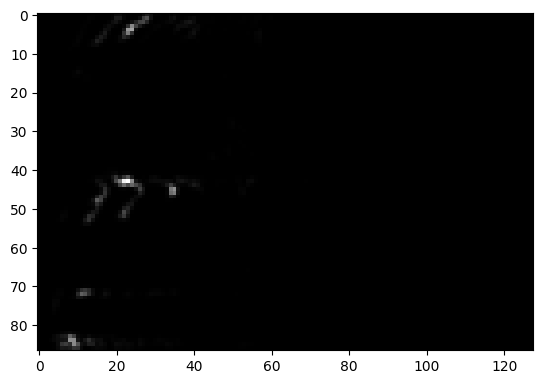

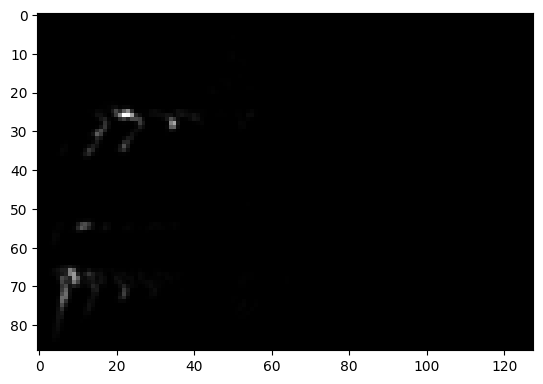

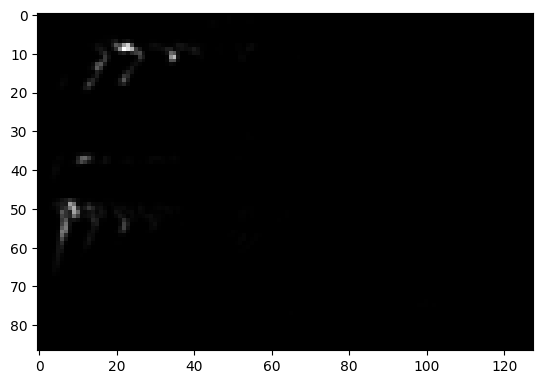

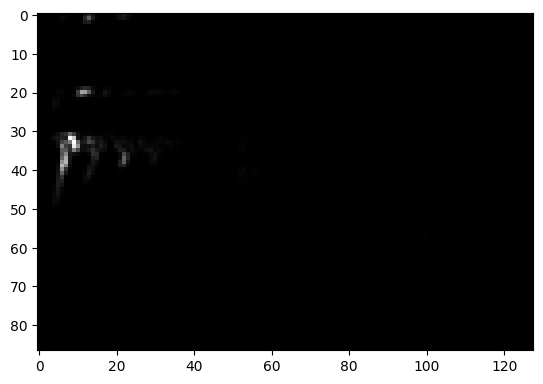

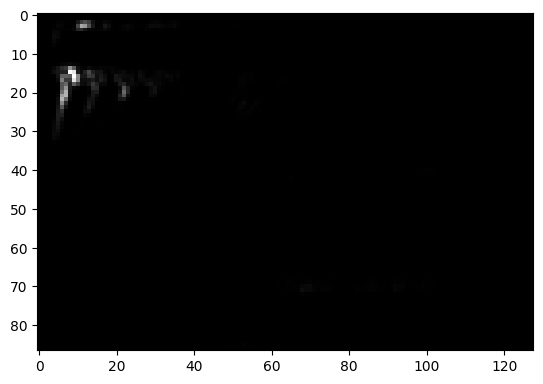

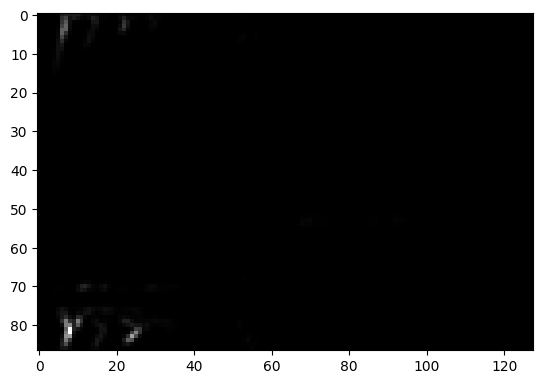

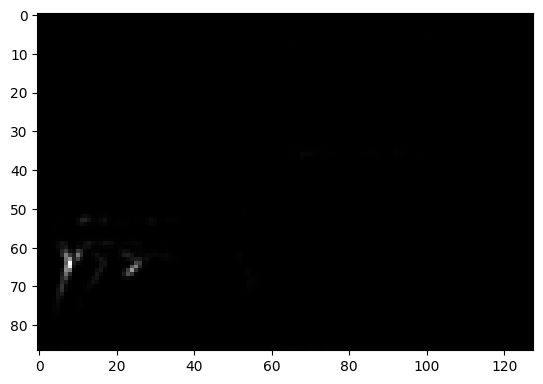

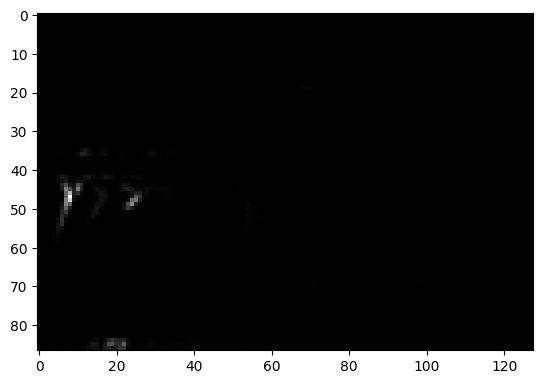

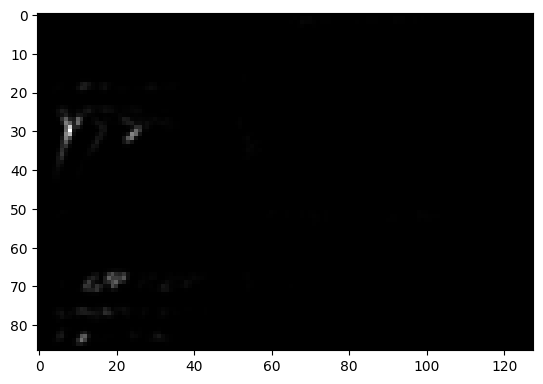

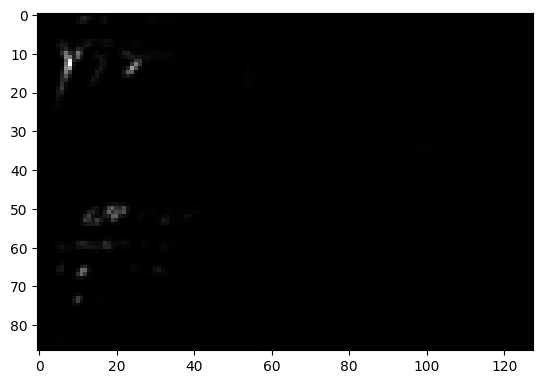

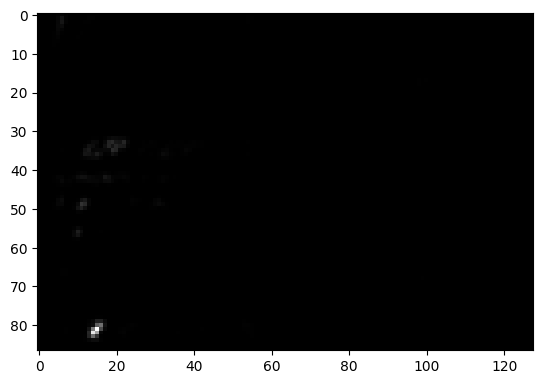

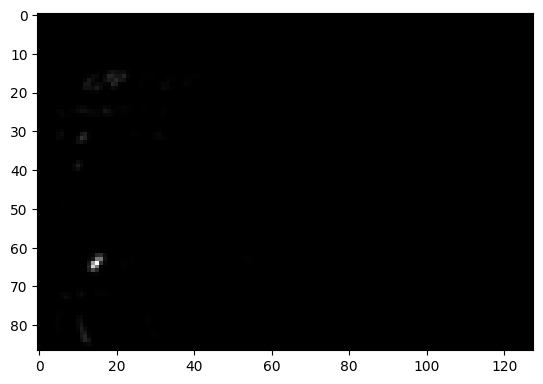

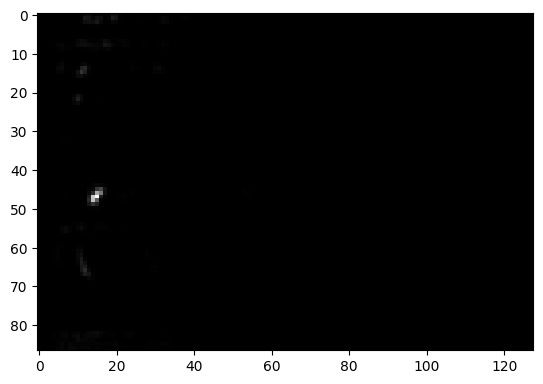

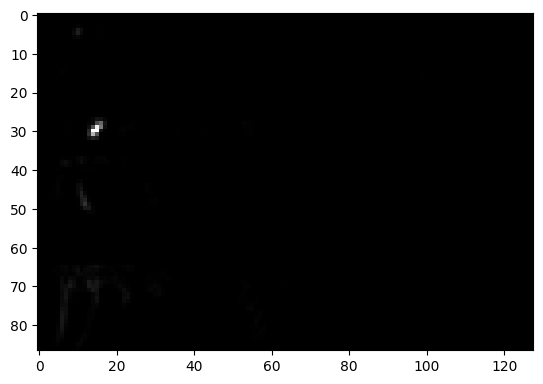

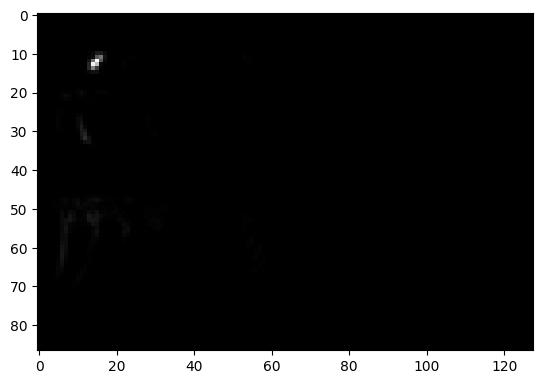

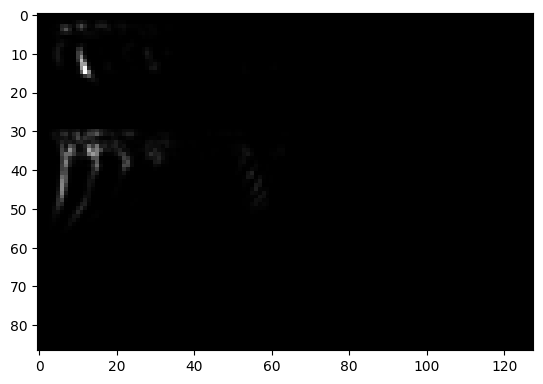

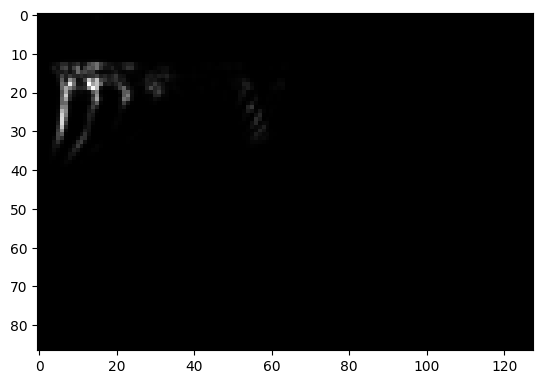

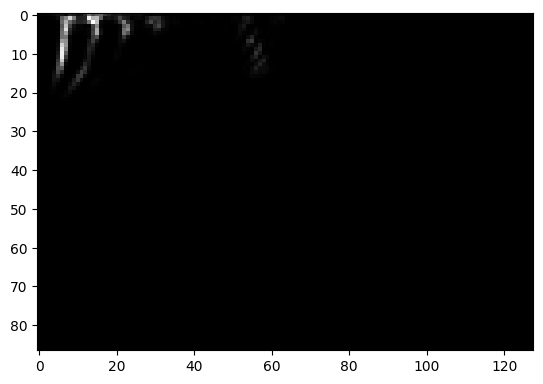

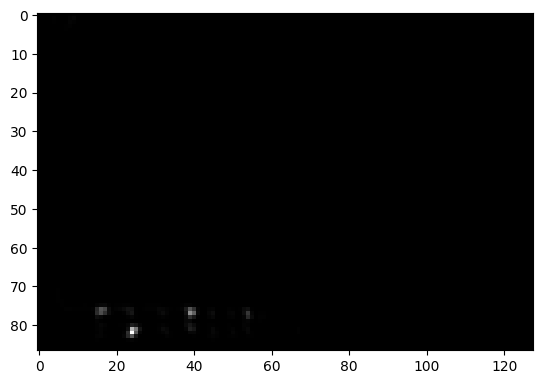

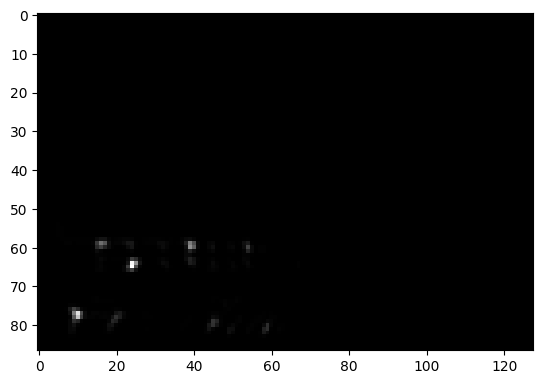

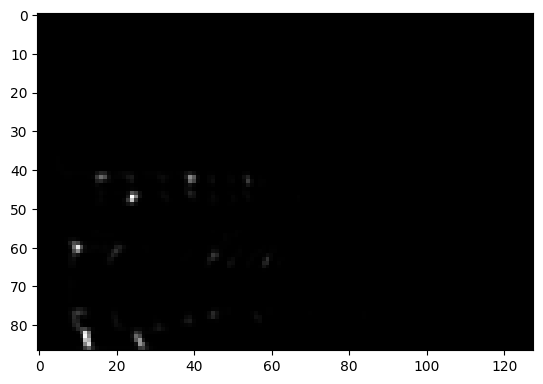

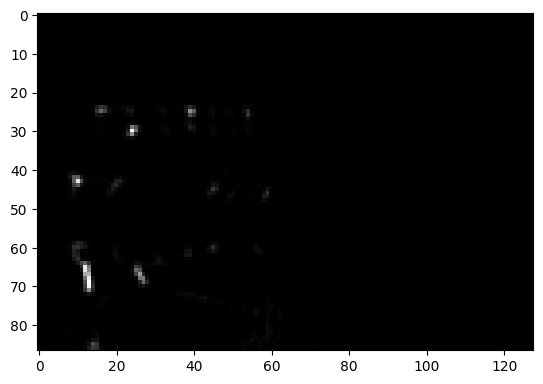

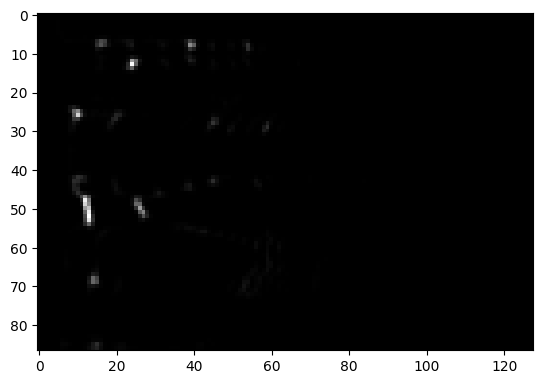

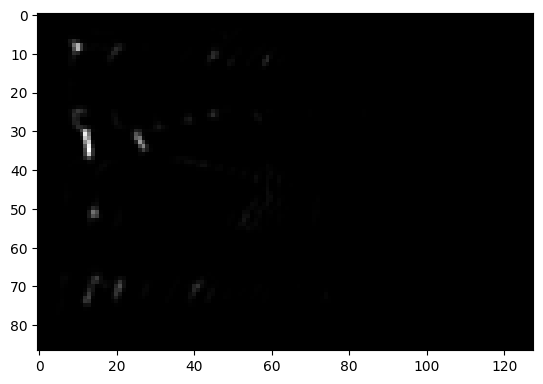

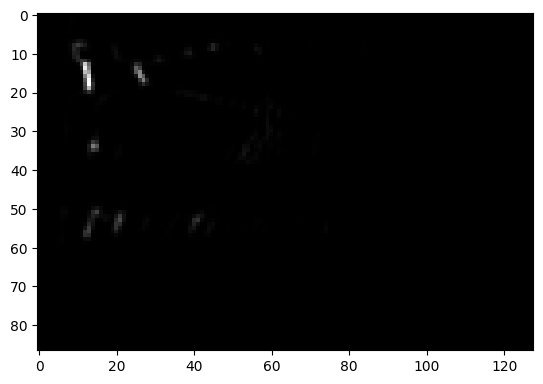

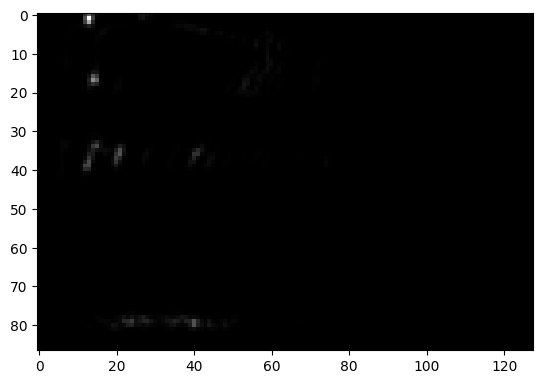

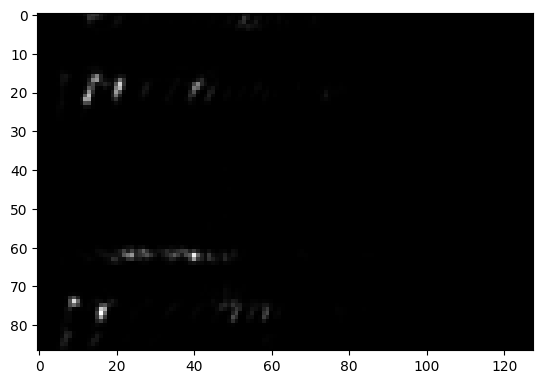

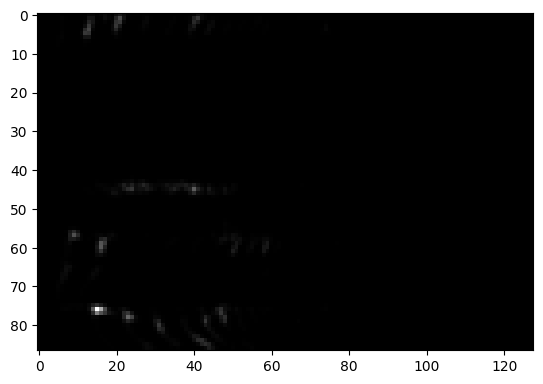

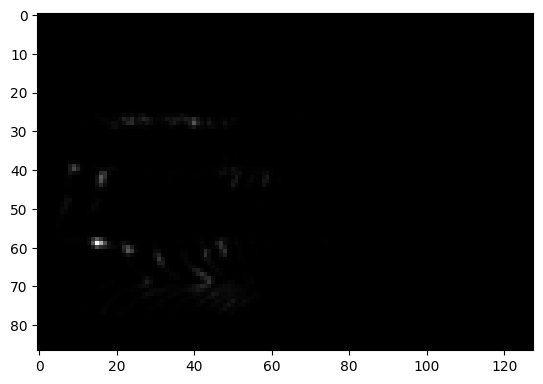

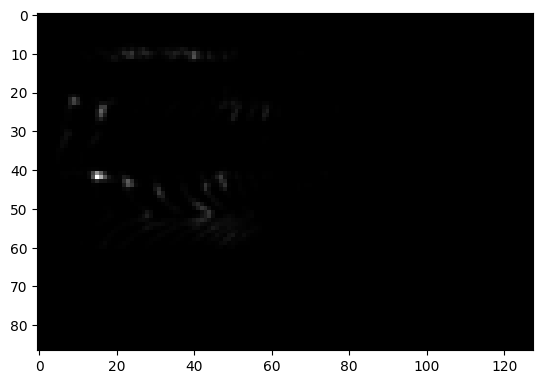

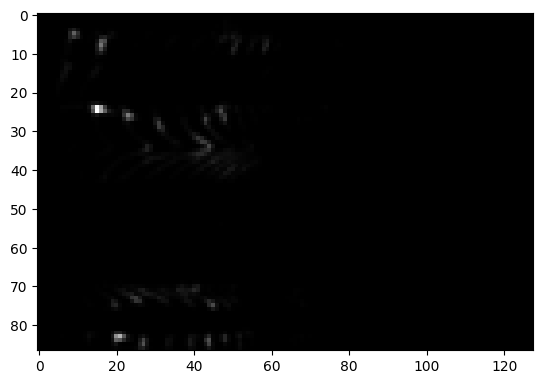

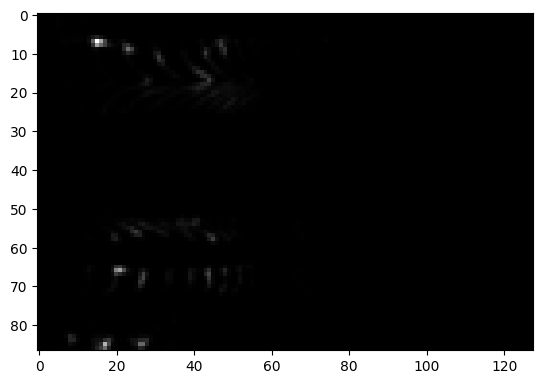

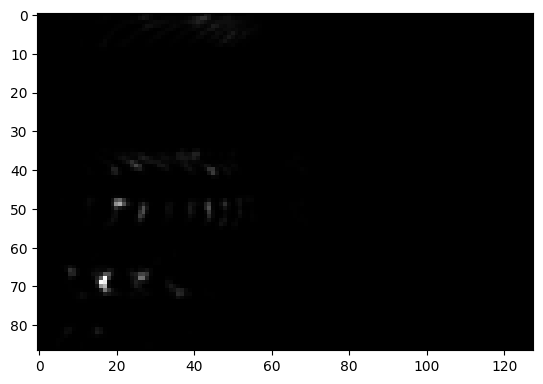

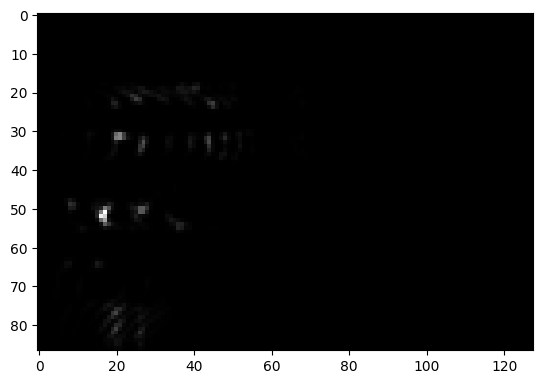

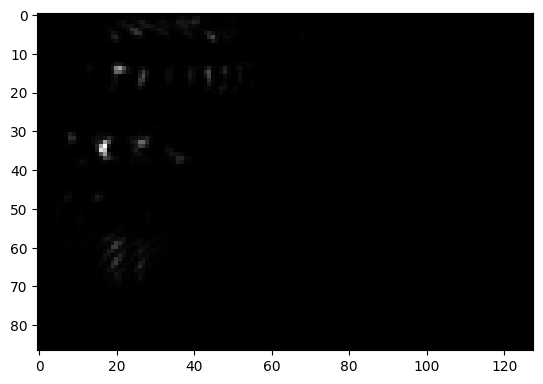

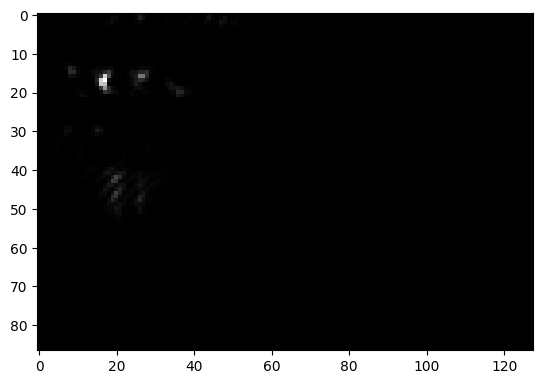

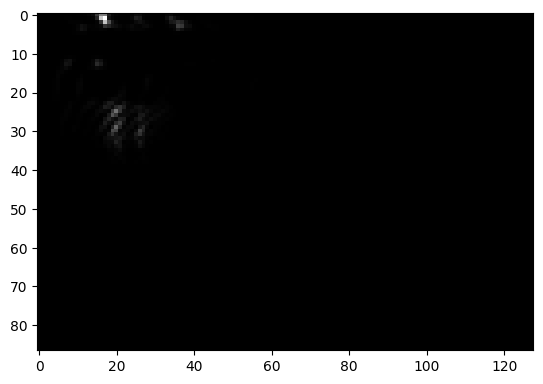

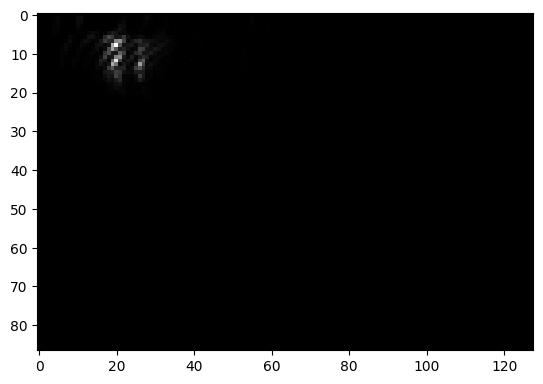

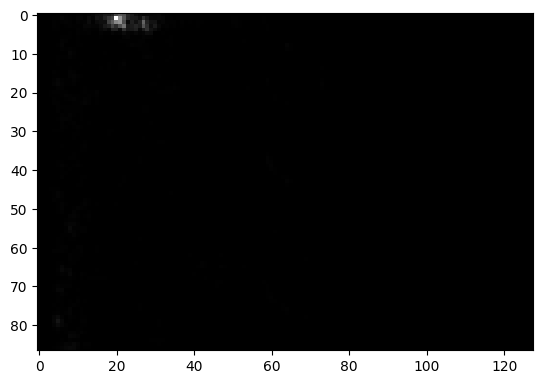

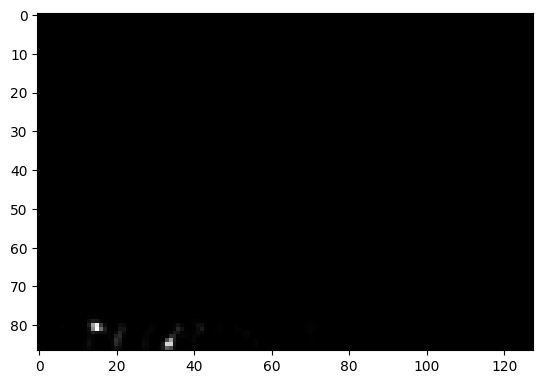

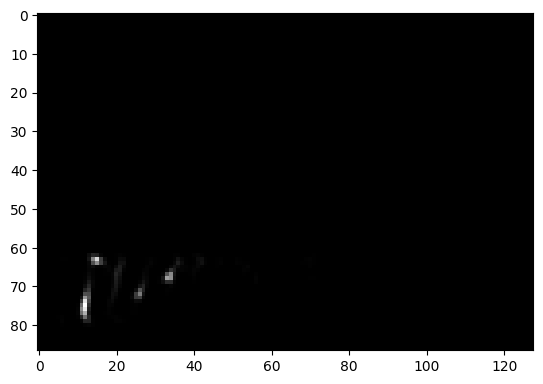

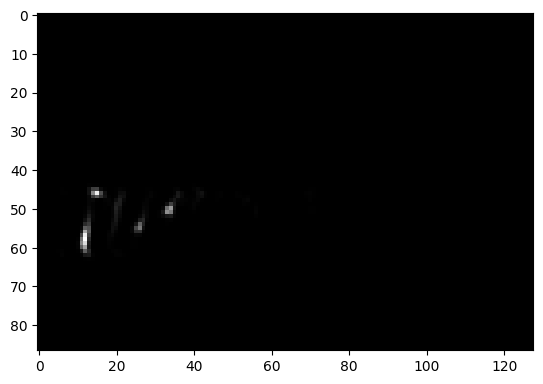

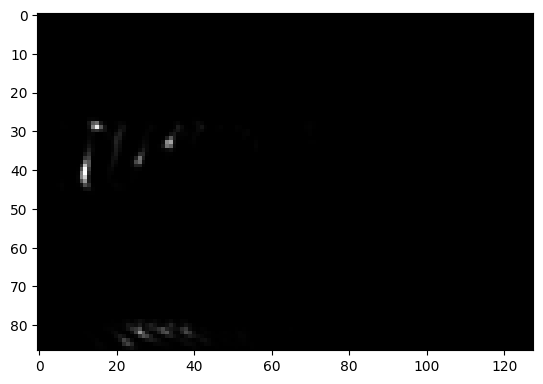

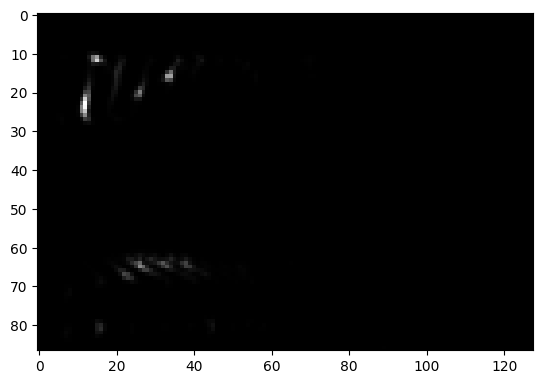

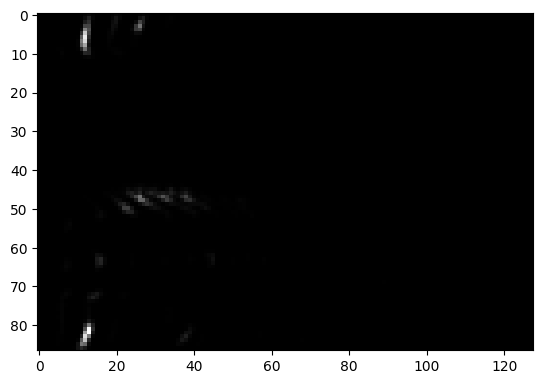

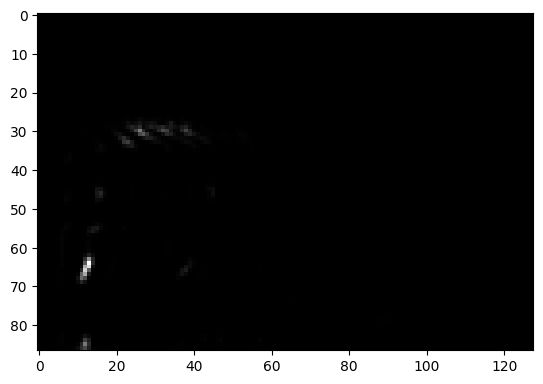

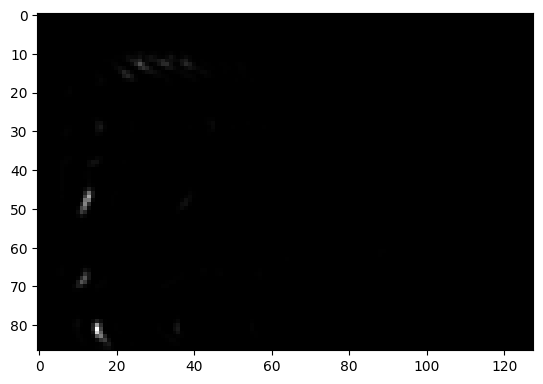

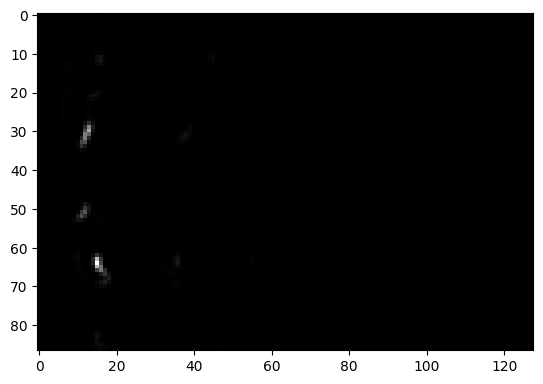

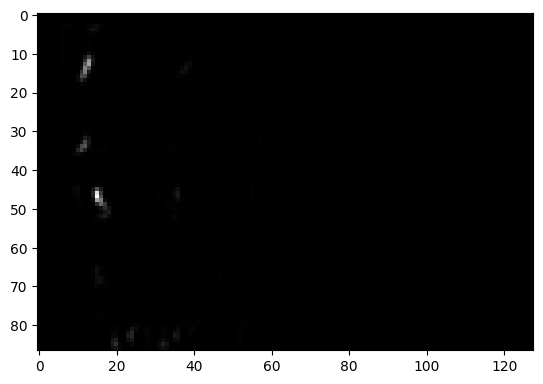

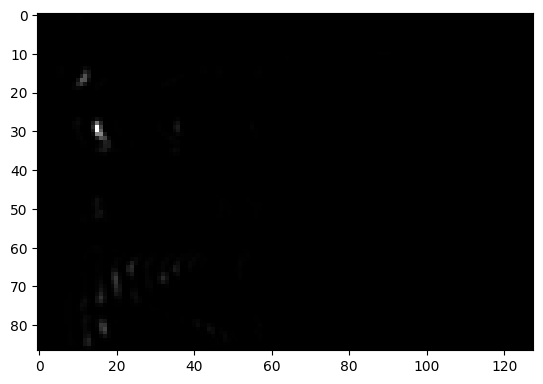

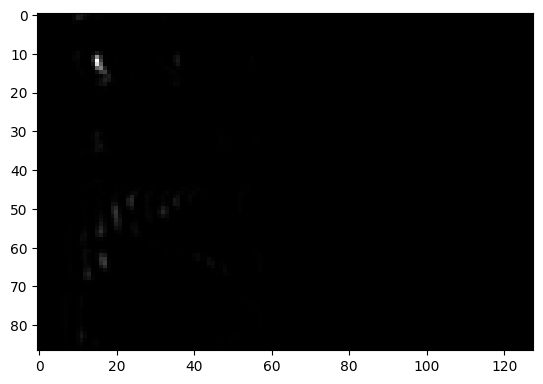

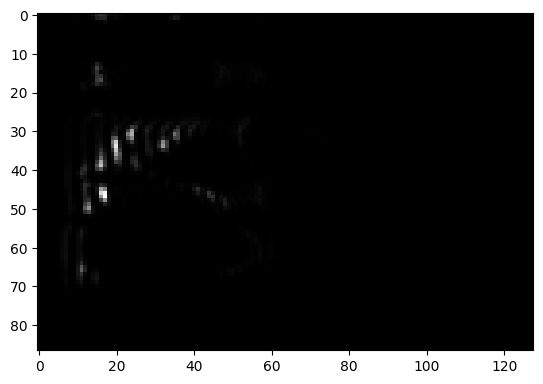

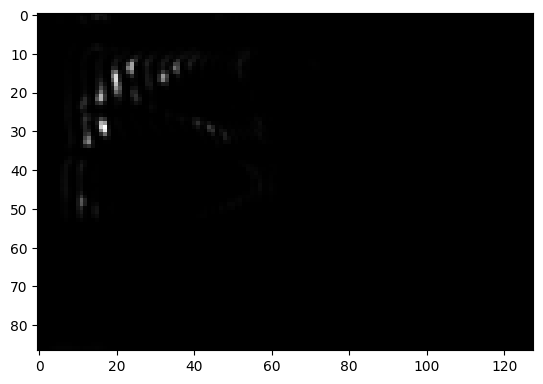

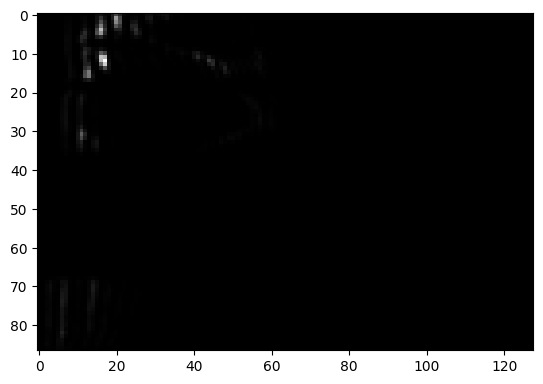

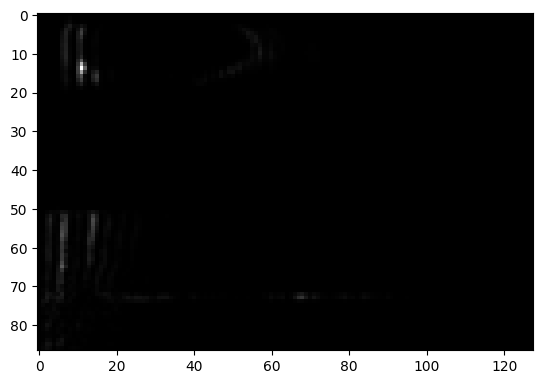

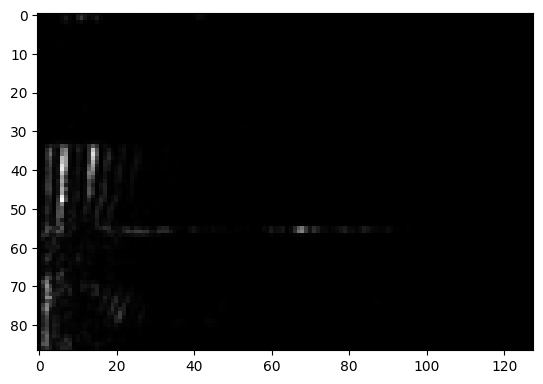

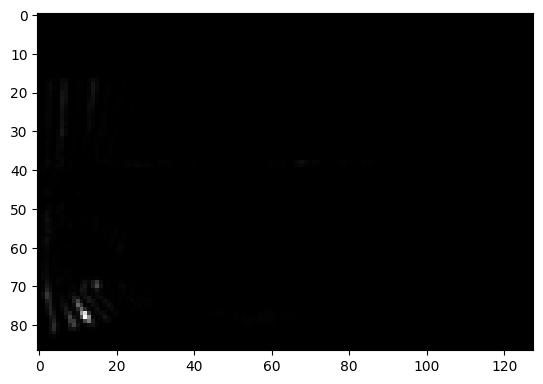

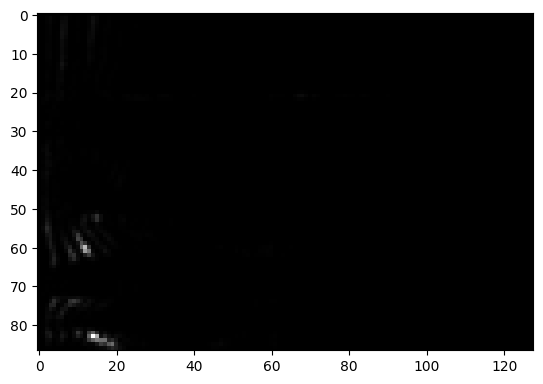

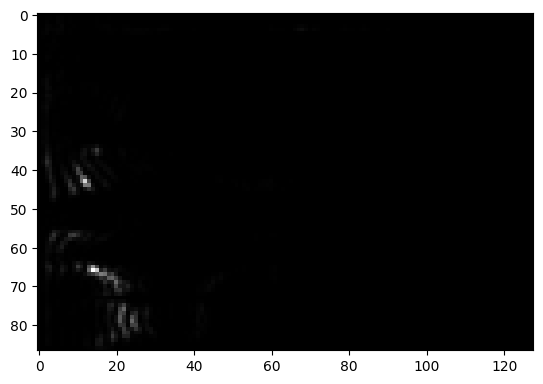

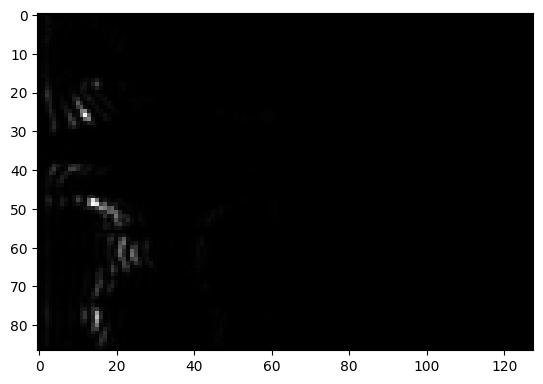

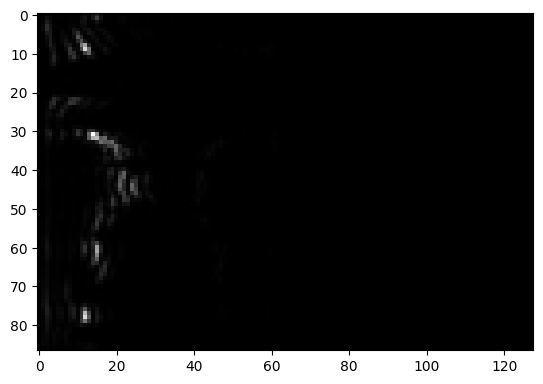

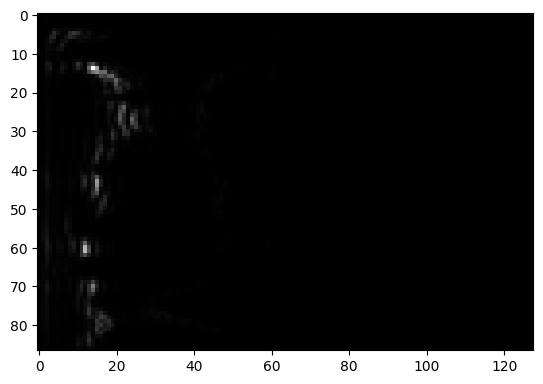

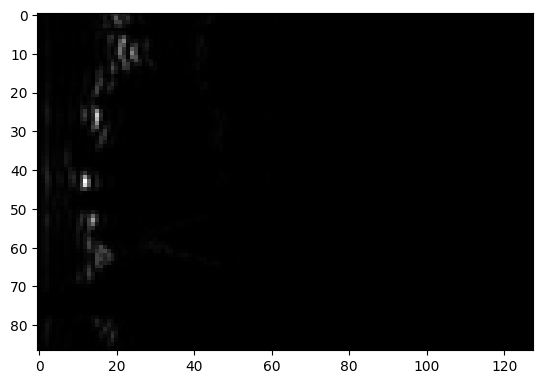

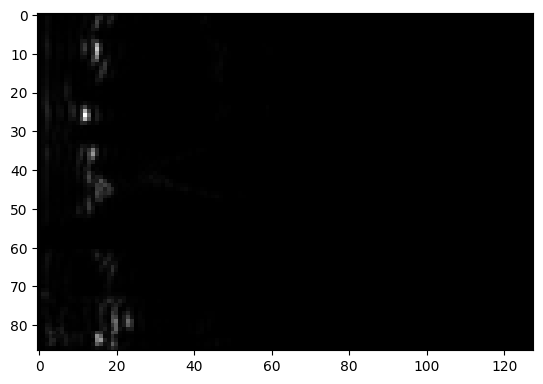

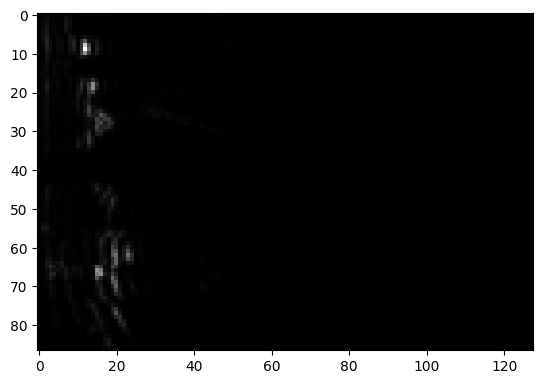

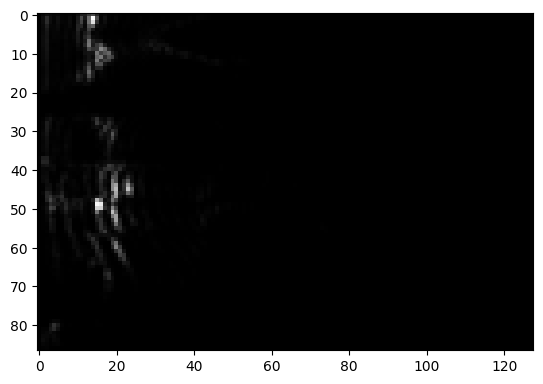

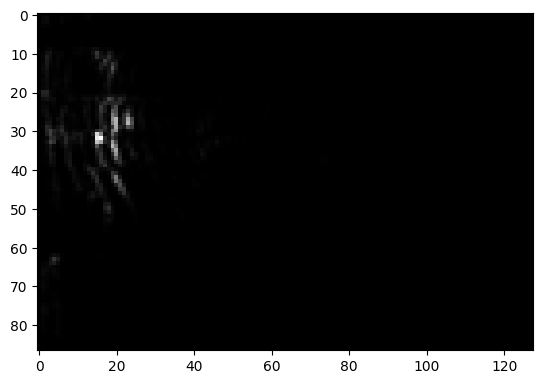

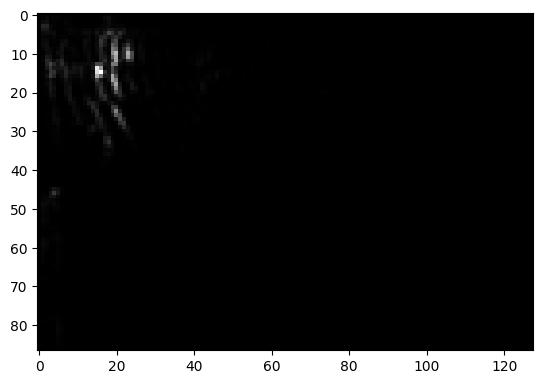

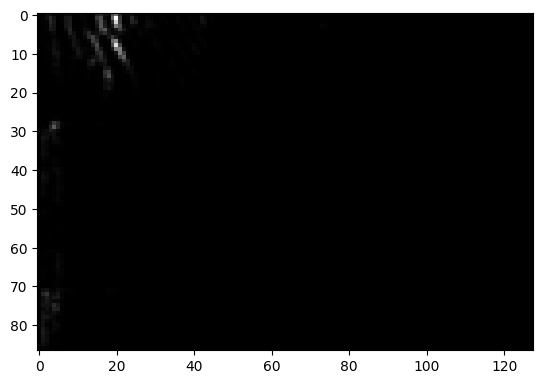

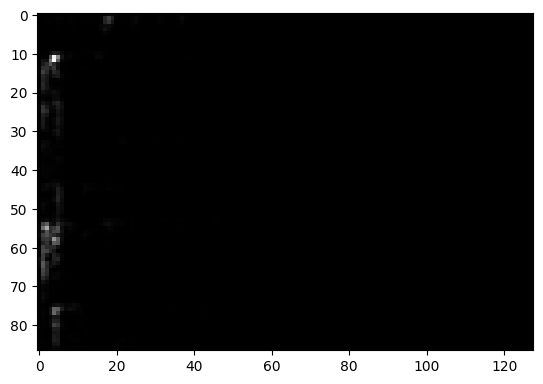

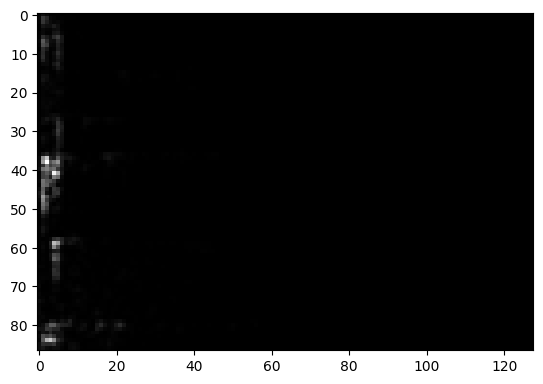

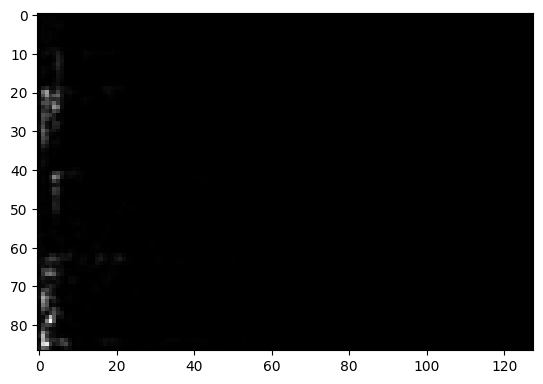

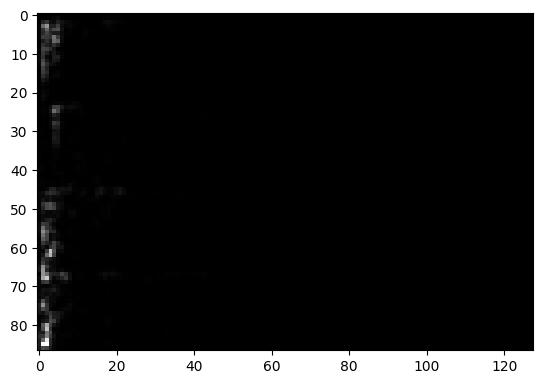

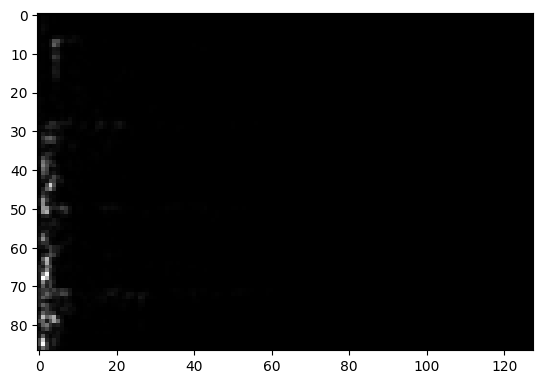

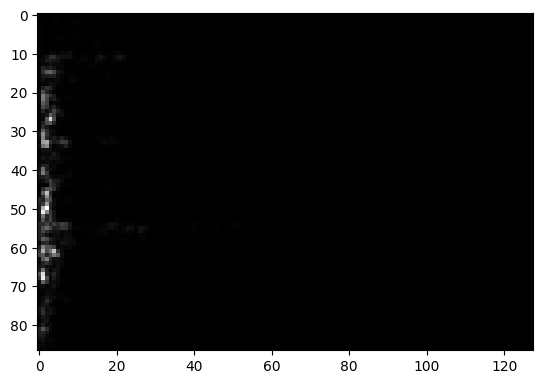

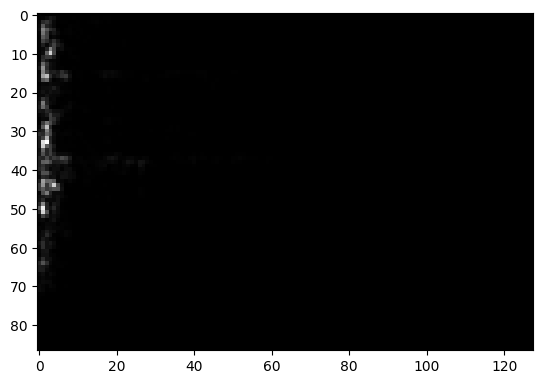

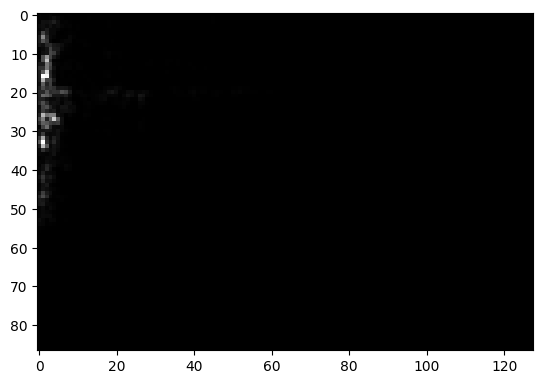

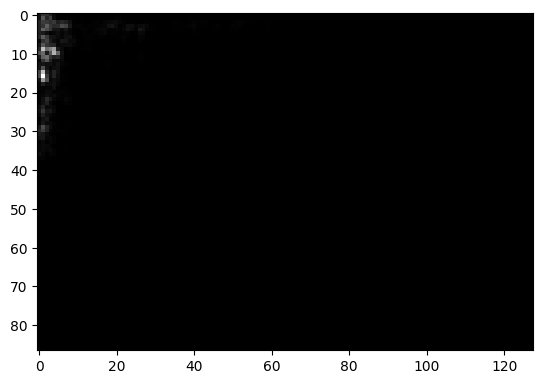

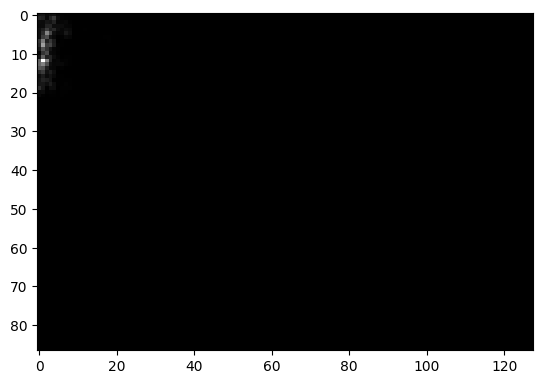

In [11]:
# Display the spectrograms 

for spec in specs:
    plt.imshow(spec, cmap='gray')
    plt.show()
    


In [ ]:
def classify_audio_clips(clips):
    X = []
    for clip in clips:
        # Convert audio to spectrogram
        spectrogram = # Your code to generate spectrogram
        
        # Preprocess spectrogram
        preprocessed_spectrogram = # Your code to preprocess spectrogram
        
        X.append(preprocessed_spectrogram)
    
    X = np.array(X)
    
    # Run predictions
    y_pred = model.predict(X)
    
    # Get predicted classes
    predicted_classes = np.argmax(y_pred, axis=1)
    
    return predicted_classes


In [ ]:
def find_most_likely_clips(clips, predicted_classes, video_path):
    clips_by_category = {}
    for i, clip in enumerate(clips):
        category = predicted_classes[i]
        if category not in clips_by_category:
            clips_by_category[category] = []
        clips_by_category[category].append((clip, i))
    
    video = VideoFileClip(video_path)
    
    clips_with_video_timing = {}
    
    for category, clips in clips_by_category.items():
        clips_with_video_timing[category] = []
        for clip, clip_idx in clips:
            start_time = clip_idx * (clip.duration - overlap) / 1000
            end_time = (clip_idx + 1) * (clip.duration - overlap) / 1000
            video_clip = video.subclip(start_time, end_time)
            clips_with_video_timing[category].append(video_clip)
    
    return clips_with_video_timing

In [ ]:
def classify_video(video_path, clip_length, overlap):
    audio = extract_audio(video_path, 0, None)
    clips = generate_audio_clips(audio, clip_length, overlap)
    predicted_classes = classify_audio_clips(clips)
    most_likely_clips = find_most_likely_clips(clips, predicted_classes)
    return most_likely_clips